In [1]:
%matplotlib inline

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az
print("The current HDDM version is: ", hddm.__version__)
print("The current kabuki version is: ", kabuki.__version__)
print("The current PyMC version is: ", pm.__version__)
print("The current ArviZ version is: ", az.__version__)

The current HDDM version is:  1.0.1RC
The current kabuki version is:  0.6.5RC4
The current PyMC version is:  2.3.8
The current ArviZ version is:  0.15.1


In [2]:
dataset = hddm.load_csv('/home/jovyan/work/Desktop/Coding/HDDM/Python Prep Dataset/merged_pd.csv', skiprows=0,dtype={'age': 'str'})
dataset.head(5)

subj_idx     rt  response BlockType StimType TargetType  Block   
0     11684  1.340       1.0    0-Back  NegFace    nonlure      3  \
1     11684  1.835       1.0    0-Back  NegFace    nonlure      4   
2     11684  1.544       1.0    0-Back  NegFace     target      5   
3     11684  1.167       1.0    0-Back  NegFace       lure      6   
4     11684  0.999       1.0    0-Back  NegFace    nonlure      7   

  Stim_cog_emo  gender age  ...  panic_s  sepanx_s  socphobia_s   
0          Emo       2  18  ...       16         0           11  \
1          Emo       2  18  ...       16         0           11   
2          Emo       2  18  ...       16         0           11   
3          Emo       2  18  ...       16         0           11   
4          Emo       2  18  ...       16         0           11   

   scaared_total  gad_s  panic_c  sepanx_c  socphobia_c  gad_c  anxiety  
0           46.0     21        1         0            1      1        1  
1           46.0     21        1         0            1      1        1  
2           46.0     21        1         0            1      1        1  
3           46.0     21        1         0            1      1        1  
4           46.0     21        1         0            1      1        1  

[5 rows x 22 columns]

# Setting

In [3]:
# **Define Model and Sampling Settings **
model0_settings = {
    "include": ['a','v','t'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {'a': ['anxiety'],
                   'v': ['anxiety'],
                   't': ['anxiety'],
                  },
    "p_outlier": 0.05
}

model1_settings = {
    "include": ['a','v','t'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {'a': ['Stim_cog_emo','anxiety'],
                   'v': ['Stim_cog_emo','anxiety'],
                   't': ['Stim_cog_emo','anxiety'],
                  },
    "p_outlier": 0.05
}

model2_settings = {
    "include": ['a','v','t'],
    "informative": False,
    "is_group_model": True,
    "depends_on": {'a': ['StimType','anxiety'],
                   'v': ['StimType','anxiety'],
                   't': ['StimType','anxiety'],
                  },
    "p_outlier": 0.05
}


# Model Sampling

In [ ]:

models = {
    "model0": model0_settings,
    "model1": model1_settings,
}

for model_name, model_settings in models.items():
    
    print(f"Processing HDDM for {model_name}")
    
    # Define unique names for outputs
    model_var_name = f'{model_name}'
    db_name = f'traces_{model_var_name}.db'
    nc_name = f'{model_var_name}_infdata.nc'

    # Build HDDM model using specific model settings
    model = hddm.HDDM(dataset, **model_settings)

    # Find starting values
    model.find_starting_values()

    # Sample from the posterior using optimized settings
    infdata = model.sample(
        6000,   
        burn=1000, 
        thin=2,  
        chains=4, 
        dbname=db_name, 
        db='pickle',
        return_infdata=True
    )

    # Save model and inference data
    model.save(model_var_name)
    az.to_netcdf(infdata, nc_name)

    print(f"✅ Completed processing for {model_var_name}.")




Processing HDDM for model0
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 0.6 sec
[                  0%                  ] 3 of 6000 complete in 1.3 sec
[                  0%                  ] 4 of 6000 complete in 1.9 sec
[                  0%                  ] 5 of 6000 complete in 2.6 sec
[                  0%                  ] 6 of 6000 complete in 3.3 sec
[                  0%                  ] 7 of 6000 complete in 3.9 sec
[                  0%                  ] 8 of 6000 complete in 4.6 sec
[                  0%                  ] 9 of 6000 complete in 5.3 sec
[                  0%                  ] 10 of 6000 complete in 6.1 sec
[                  0%                  ] 11 of 6000 complete in 6.8 sec
[                  0%                  ] 12 of 6000 complete in 7.6 sec
[                  0%                  ] 13 of 6000 complete in 8.3 sec
[                  0%                  ] 14 of 6000 complete in 9.1 sec
[                  0%                  ] 15 of 6000 complete in 9.8 sec


[                  0%                  ] 2 of 6000 complete in 0.6 sec
[                  0%                  ] 3 of 6000 complete in 1.3 sec
[                  0%                  ] 4 of 6000 complete in 2.0 sec
[                  0%                  ] 5 of 6000 complete in 2.7 sec
[                  0%                  ] 6 of 6000 complete in 3.3 sec
[                  0%                  ] 7 of 6000 complete in 4.0 sec
[                  0%                  ] 8 of 6000 complete in 4.6 sec
[                  0%                  ] 9 of 6000 complete in 5.4 sec
[                  0%                  ] 10 of 6000 complete in 6.2 sec
[                  0%                  ] 11 of 6000 complete in 7.0 sec
[                  0%                  ] 12 of 6000 complete in 7.7 sec
[                  0%                  ] 13 of 6000 complete in 8.5 sec
[                  0%                  ] 14 of 6000 complete in 9.2 sec
[                  0%                  ] 15 of 6000 complete in 9.9 sec


[                  1%                  ] 114 of 6000 complete in 83.4 sec
[                  1%                  ] 115 of 6000 complete in 84.2 sec
[                  1%                  ] 116 of 6000 complete in 85.0 sec
[                  1%                  ] 117 of 6000 complete in 85.7 sec
[                  1%                  ] 118 of 6000 complete in 86.5 sec
[                  1%                  ] 119 of 6000 complete in 87.3 sec
[                  2%                  ] 120 of 6000 complete in 88.2 sec
[                  2%                  ] 121 of 6000 complete in 89.0 sec
[                  2%                  ] 122 of 6000 complete in 89.7 sec
[                  2%                  ] 123 of 6000 complete in 90.4 sec
[                  2%                  ] 124 of 6000 complete in 91.2 sec
[                  2%                  ] 125 of 6000 complete in 92.0 sec
[                  2%                  ] 126 of 6000 complete in 92.6 sec
[                  2%                 

[                  1%                  ] 114 of 6000 complete in 84.2 sec
[                  1%                  ] 115 of 6000 complete in 85.0 sec
[                  1%                  ] 116 of 6000 complete in 85.7 sec
[                  1%                  ] 117 of 6000 complete in 86.5 sec
[                  1%                  ] 118 of 6000 complete in 87.3 sec
[                  1%                  ] 119 of 6000 complete in 88.0 sec
[                  2%                  ] 120 of 6000 complete in 88.7 sec
[                  2%                  ] 121 of 6000 complete in 89.5 sec
[                  2%                  ] 122 of 6000 complete in 90.2 sec
[                  2%                  ] 123 of 6000 complete in 91.0 sec
[                  2%                  ] 124 of 6000 complete in 91.7 sec
[                  2%                  ] 125 of 6000 complete in 92.5 sec
[                  2%                  ] 126 of 6000 complete in 93.3 sec
[                  2%                 

[-                 3%                  ] 223 of 6000 complete in 164.3 sec
[-                 3%                  ] 224 of 6000 complete in 165.0 sec
[-                 3%                  ] 225 of 6000 complete in 165.7 sec
[-                 3%                  ] 226 of 6000 complete in 166.5 sec
[-                 3%                  ] 227 of 6000 complete in 167.2 sec
[-                 3%                  ] 228 of 6000 complete in 168.0 sec
[-                 3%                  ] 229 of 6000 complete in 168.8 sec
[-                 3%                  ] 230 of 6000 complete in 169.5 sec
[-                 3%                  ] 231 of 6000 complete in 170.2 sec
[-                 3%                  ] 232 of 6000 complete in 170.9 sec
[-                 3%                  ] 233 of 6000 complete in 171.6 sec
[-                 3%                  ] 234 of 6000 complete in 172.4 sec
[-                 3%                  ] 235 of 6000 complete in 173.1 sec
[-                 3%    

[-                 3%                  ] 223 of 6000 complete in 167.2 sec
[-                 3%                  ] 224 of 6000 complete in 167.9 sec
[-                 3%                  ] 225 of 6000 complete in 168.8 sec
[-                 3%                  ] 226 of 6000 complete in 169.6 sec
[-                 3%                  ] 227 of 6000 complete in 170.3 sec
[-                 3%                  ] 228 of 6000 complete in 171.1 sec
[-                 3%                  ] 229 of 6000 complete in 171.8 sec
[-                 3%                  ] 230 of 6000 complete in 172.5 sec
[-                 3%                  ] 231 of 6000 complete in 173.2 sec
[-                 3%                  ] 232 of 6000 complete in 174.0 sec
[-                 3%                  ] 233 of 6000 complete in 174.8 sec
[-                 3%                  ] 234 of 6000 complete in 175.5 sec
[-                 3%                  ] 235 of 6000 complete in 176.4 sec
[-                 3%    

[--                5%                  ] 332 of 6000 complete in 246.0 sec
[--                5%                  ] 333 of 6000 complete in 246.8 sec
[--                5%                  ] 334 of 6000 complete in 247.5 sec
[--                5%                  ] 335 of 6000 complete in 248.3 sec
[--                5%                  ] 336 of 6000 complete in 249.0 sec
[--                5%                  ] 337 of 6000 complete in 249.8 sec
[--                5%                  ] 338 of 6000 complete in 250.5 sec
[--                5%                  ] 339 of 6000 complete in 251.3 sec
[--                5%                  ] 340 of 6000 complete in 252.0 sec
[--                5%                  ] 341 of 6000 complete in 252.9 sec
[--                5%                  ] 342 of 6000 complete in 253.6 sec
[--                5%                  ] 343 of 6000 complete in 254.4 sec
[--                5%                  ] 344 of 6000 complete in 255.2 sec
[--                5%    

[--                5%                  ] 332 of 6000 complete in 251.0 sec
[--                5%                  ] 333 of 6000 complete in 251.8 sec
[--                5%                  ] 334 of 6000 complete in 252.6 sec
[--                5%                  ] 335 of 6000 complete in 253.3 sec
[--                5%                  ] 336 of 6000 complete in 254.1 sec
[--                5%                  ] 337 of 6000 complete in 254.8 sec
[--                5%                  ] 338 of 6000 complete in 255.6 sec
[--                5%                  ] 339 of 6000 complete in 256.3 sec
[--                5%                  ] 340 of 6000 complete in 257.1 sec
[--                5%                  ] 341 of 6000 complete in 257.9 sec
[--                5%                  ] 342 of 6000 complete in 258.7 sec
[--                5%                  ] 343 of 6000 complete in 259.5 sec
[--                5%                  ] 344 of 6000 complete in 260.3 sec
[--                5%    

[--                7%                  ] 441 of 6000 complete in 334.0 sec
[--                7%                  ] 442 of 6000 complete in 334.9 sec
[--                7%                  ] 443 of 6000 complete in 335.7 sec
[--                7%                  ] 444 of 6000 complete in 336.4 sec
[--                7%                  ] 445 of 6000 complete in 337.1 sec
[--                7%                  ] 446 of 6000 complete in 338.0 sec
[--                7%                  ] 447 of 6000 complete in 338.8 sec
[--                7%                  ] 448 of 6000 complete in 339.6 sec
[--                7%                  ] 449 of 6000 complete in 340.4 sec
[--                7%                  ] 450 of 6000 complete in 341.1 sec
[--                7%                  ] 451 of 6000 complete in 341.9 sec
[--                7%                  ] 452 of 6000 complete in 342.7 sec
[--                7%                  ] 453 of 6000 complete in 343.4 sec
[--                7%    

[--                7%                  ] 441 of 6000 complete in 336.3 sec
[--                7%                  ] 442 of 6000 complete in 337.2 sec
[--                7%                  ] 443 of 6000 complete in 338.0 sec
[--                7%                  ] 444 of 6000 complete in 338.8 sec
[--                7%                  ] 445 of 6000 complete in 339.5 sec
[--                7%                  ] 446 of 6000 complete in 340.3 sec
[--                7%                  ] 447 of 6000 complete in 341.0 sec
[--                7%                  ] 448 of 6000 complete in 341.7 sec
[--                7%                  ] 449 of 6000 complete in 342.5 sec
[--                7%                  ] 450 of 6000 complete in 343.3 sec
[--                7%                  ] 451 of 6000 complete in 344.0 sec
[--                7%                  ] 452 of 6000 complete in 344.8 sec
[--                7%                  ] 453 of 6000 complete in 345.6 sec
[--                7%    

[---               9%                  ] 550 of 6000 complete in 418.2 sec
[---               9%                  ] 551 of 6000 complete in 418.9 sec
[---               9%                  ] 552 of 6000 complete in 419.7 sec
[---               9%                  ] 553 of 6000 complete in 420.5 sec
[---               9%                  ] 554 of 6000 complete in 421.2 sec
[---               9%                  ] 555 of 6000 complete in 421.9 sec
[---               9%                  ] 556 of 6000 complete in 422.8 sec
[---               9%                  ] 557 of 6000 complete in 423.5 sec
[---               9%                  ] 558 of 6000 complete in 424.3 sec
[---               9%                  ] 559 of 6000 complete in 425.2 sec
[---               9%                  ] 560 of 6000 complete in 426.0 sec
[---               9%                  ] 561 of 6000 complete in 426.8 sec
[---               9%                  ] 562 of 6000 complete in 427.6 sec
[---               9%    

[---               9%                  ] 550 of 6000 complete in 419.7 sec
[---               9%                  ] 551 of 6000 complete in 420.4 sec
[---               9%                  ] 552 of 6000 complete in 421.2 sec
[---               9%                  ] 553 of 6000 complete in 421.9 sec
[---               9%                  ] 554 of 6000 complete in 422.6 sec
[---               9%                  ] 555 of 6000 complete in 423.5 sec
[---               9%                  ] 556 of 6000 complete in 424.4 sec
[---               9%                  ] 557 of 6000 complete in 425.3 sec
[---               9%                  ] 558 of 6000 complete in 426.2 sec
[---               9%                  ] 559 of 6000 complete in 427.0 sec
[---               9%                  ] 560 of 6000 complete in 427.8 sec
[---               9%                  ] 561 of 6000 complete in 428.7 sec
[---               9%                  ] 562 of 6000 complete in 429.5 sec
[---               9%    

[----             10%                  ] 659 of 6000 complete in 502.7 sec
[----             11%                  ] 660 of 6000 complete in 503.6 sec
[----             11%                  ] 661 of 6000 complete in 504.4 sec
[----             11%                  ] 662 of 6000 complete in 505.3 sec
[----             11%                  ] 663 of 6000 complete in 506.1 sec
[----             11%                  ] 664 of 6000 complete in 506.9 sec
[----             11%                  ] 665 of 6000 complete in 507.7 sec
[----             11%                  ] 666 of 6000 complete in 508.5 sec
[----             11%                  ] 667 of 6000 complete in 509.2 sec
[----             11%                  ] 668 of 6000 complete in 509.9 sec
[----             11%                  ] 669 of 6000 complete in 510.6 sec
[----             11%                  ] 670 of 6000 complete in 511.3 sec
[----             11%                  ] 671 of 6000 complete in 512.0 sec
[----             11%    

[----             10%                  ] 659 of 6000 complete in 504.9 sec
[----             11%                  ] 660 of 6000 complete in 505.8 sec
[----             11%                  ] 661 of 6000 complete in 506.6 sec
[----             11%                  ] 662 of 6000 complete in 507.5 sec
[----             11%                  ] 663 of 6000 complete in 508.3 sec
[----             11%                  ] 664 of 6000 complete in 509.1 sec
[----             11%                  ] 665 of 6000 complete in 509.8 sec
[----             11%                  ] 666 of 6000 complete in 510.5 sec
[----             11%                  ] 667 of 6000 complete in 511.3 sec
[----             11%                  ] 668 of 6000 complete in 512.0 sec
[----             11%                  ] 669 of 6000 complete in 512.8 sec
[----             11%                  ] 670 of 6000 complete in 513.7 sec
[----             11%                  ] 671 of 6000 complete in 514.4 sec
[----             11%    

[----             12%                  ] 768 of 6000 complete in 586.9 sec
[----             12%                  ] 769 of 6000 complete in 587.7 sec
[----             12%                  ] 770 of 6000 complete in 588.4 sec
[----             12%                  ] 771 of 6000 complete in 589.3 sec
[----             12%                  ] 772 of 6000 complete in 590.1 sec
[----             12%                  ] 773 of 6000 complete in 590.8 sec
[----             12%                  ] 774 of 6000 complete in 591.7 sec
[----             12%                  ] 775 of 6000 complete in 592.5 sec
[----             12%                  ] 776 of 6000 complete in 593.4 sec
[----             12%                  ] 777 of 6000 complete in 594.2 sec
[----             12%                  ] 778 of 6000 complete in 595.0 sec
[----             12%                  ] 779 of 6000 complete in 595.7 sec
[----             13%                  ] 780 of 6000 complete in 596.5 sec
[----             13%    

[----             12%                  ] 768 of 6000 complete in 590.1 sec
[----             12%                  ] 769 of 6000 complete in 590.9 sec
[----             12%                  ] 770 of 6000 complete in 591.7 sec
[----             12%                  ] 771 of 6000 complete in 592.5 sec
[----             12%                  ] 772 of 6000 complete in 593.2 sec
[----             12%                  ] 773 of 6000 complete in 594.0 sec
[----             12%                  ] 774 of 6000 complete in 594.7 sec
[----             12%                  ] 775 of 6000 complete in 595.5 sec
[----             12%                  ] 776 of 6000 complete in 596.3 sec
[----             12%                  ] 777 of 6000 complete in 596.9 sec
[----             12%                  ] 778 of 6000 complete in 597.7 sec
[----             12%                  ] 779 of 6000 complete in 598.5 sec
[----             13%                  ] 780 of 6000 complete in 599.3 sec
[----             13%    

[-----            14%                  ] 877 of 6000 complete in 671.2 sec
[-----            14%                  ] 878 of 6000 complete in 672.1 sec
[-----            14%                  ] 879 of 6000 complete in 672.8 sec
[-----            14%                  ] 880 of 6000 complete in 673.7 sec
[-----            14%                  ] 881 of 6000 complete in 674.5 sec
[-----            14%                  ] 882 of 6000 complete in 675.3 sec
[-----            14%                  ] 883 of 6000 complete in 676.0 sec
[-----            14%                  ] 884 of 6000 complete in 676.8 sec
[-----            14%                  ] 885 of 6000 complete in 677.7 sec
[-----            14%                  ] 886 of 6000 complete in 678.4 sec
[-----            14%                  ] 887 of 6000 complete in 679.1 sec
[-----            14%                  ] 888 of 6000 complete in 679.9 sec
[-----            14%                  ] 889 of 6000 complete in 680.6 sec
[-----            14%    

[-----            14%                  ] 877 of 6000 complete in 675.5 sec
[-----            14%                  ] 878 of 6000 complete in 676.2 sec
[-----            14%                  ] 879 of 6000 complete in 677.0 sec
[-----            14%                  ] 880 of 6000 complete in 677.8 sec
[-----            14%                  ] 881 of 6000 complete in 678.6 sec
[-----            14%                  ] 882 of 6000 complete in 679.5 sec
[-----            14%                  ] 883 of 6000 complete in 680.3 sec
[-----            14%                  ] 884 of 6000 complete in 681.1 sec
[-----            14%                  ] 885 of 6000 complete in 681.9 sec
[-----            14%                  ] 886 of 6000 complete in 682.7 sec
[-----            14%                  ] 887 of 6000 complete in 683.5 sec
[-----            14%                  ] 888 of 6000 complete in 684.2 sec
[-----            14%                  ] 889 of 6000 complete in 684.9 sec
[-----            14%    

[------           16%                  ] 986 of 6000 complete in 754.8 sec
[------           16%                  ] 987 of 6000 complete in 755.6 sec
[------           16%                  ] 988 of 6000 complete in 756.4 sec
[------           16%                  ] 989 of 6000 complete in 757.1 sec
[------           16%                  ] 990 of 6000 complete in 757.8 sec
[------           16%                  ] 991 of 6000 complete in 758.7 sec
[------           16%                  ] 992 of 6000 complete in 759.4 sec
[------           16%                  ] 993 of 6000 complete in 760.2 sec
[------           16%                  ] 994 of 6000 complete in 760.9 sec
[------           16%                  ] 995 of 6000 complete in 761.7 sec
[------           16%                  ] 996 of 6000 complete in 762.4 sec
[------           16%                  ] 997 of 6000 complete in 763.1 sec
[------           16%                  ] 998 of 6000 complete in 764.0 sec
[------           16%    

[------           16%                  ] 986 of 6000 complete in 759.9 sec
[------           16%                  ] 987 of 6000 complete in 760.6 sec
[------           16%                  ] 988 of 6000 complete in 761.4 sec
[------           16%                  ] 989 of 6000 complete in 762.2 sec
[------           16%                  ] 990 of 6000 complete in 763.0 sec
[------           16%                  ] 991 of 6000 complete in 763.7 sec
[------           16%                  ] 992 of 6000 complete in 764.4 sec
[------           16%                  ] 993 of 6000 complete in 765.1 sec
[------           16%                  ] 994 of 6000 complete in 765.8 sec
[------           16%                  ] 995 of 6000 complete in 766.6 sec
[------           16%                  ] 996 of 6000 complete in 767.5 sec
[------           16%                  ] 997 of 6000 complete in 768.3 sec
[------           16%                  ] 998 of 6000 complete in 769.0 sec
[------           16%    

[------           18%                  ] 1093 of 6000 complete in 838.0 sec
[------           18%                  ] 1094 of 6000 complete in 838.9 sec
[------           18%                  ] 1095 of 6000 complete in 839.6 sec
[------           18%                  ] 1096 of 6000 complete in 840.4 sec
[------           18%                  ] 1097 of 6000 complete in 841.1 sec
[------           18%                  ] 1098 of 6000 complete in 841.8 sec
[------           18%                  ] 1099 of 6000 complete in 842.6 sec
[------           18%                  ] 1100 of 6000 complete in 843.4 sec
[------           18%                  ] 1101 of 6000 complete in 844.2 sec
[------           18%                  ] 1102 of 6000 complete in 844.9 sec
[------           18%                  ] 1103 of 6000 complete in 845.8 sec
[------           18%                  ] 1104 of 6000 complete in 846.5 sec
[------           18%                  ] 1105 of 6000 complete in 847.3 sec
[-------    

[------           18%                  ] 1093 of 6000 complete in 843.4 sec
[------           18%                  ] 1094 of 6000 complete in 844.1 sec
[------           18%                  ] 1095 of 6000 complete in 845.0 sec
[------           18%                  ] 1096 of 6000 complete in 845.7 sec
[------           18%                  ] 1097 of 6000 complete in 846.4 sec
[------           18%                  ] 1098 of 6000 complete in 847.2 sec
[------           18%                  ] 1099 of 6000 complete in 847.9 sec
[------           18%                  ] 1100 of 6000 complete in 848.8 sec
[------           18%                  ] 1101 of 6000 complete in 849.6 sec
[------           18%                  ] 1102 of 6000 complete in 850.4 sec
[------           18%                  ] 1103 of 6000 complete in 851.1 sec
[------           18%                  ] 1104 of 6000 complete in 851.9 sec
[------           18%                  ] 1105 of 6000 complete in 852.7 sec
[-------    

[-------          20%                  ] 1200 of 6000 complete in 920.0 sec
[-------          20%                  ] 1201 of 6000 complete in 920.9 sec
[-------          20%                  ] 1202 of 6000 complete in 921.7 sec
[-------          20%                  ] 1203 of 6000 complete in 922.4 sec
[-------          20%                  ] 1204 of 6000 complete in 923.1 sec
[-------          20%                  ] 1205 of 6000 complete in 924.0 sec
[-------          20%                  ] 1206 of 6000 complete in 924.8 sec
[-------          20%                  ] 1207 of 6000 complete in 925.6 sec
[-------          20%                  ] 1208 of 6000 complete in 926.3 sec
[-------          20%                  ] 1209 of 6000 complete in 927.1 sec
[-------          20%                  ] 1210 of 6000 complete in 927.9 sec
[-------          20%                  ] 1211 of 6000 complete in 928.6 sec
[-------          20%                  ] 1212 of 6000 complete in 929.3 sec
[-------    

[-------          20%                  ] 1200 of 6000 complete in 927.2 sec
[-------          20%                  ] 1201 of 6000 complete in 928.0 sec
[-------          20%                  ] 1202 of 6000 complete in 928.7 sec
[-------          20%                  ] 1203 of 6000 complete in 929.5 sec
[-------          20%                  ] 1204 of 6000 complete in 930.4 sec
[-------          20%                  ] 1205 of 6000 complete in 931.1 sec
[-------          20%                  ] 1206 of 6000 complete in 931.8 sec
[-------          20%                  ] 1207 of 6000 complete in 932.6 sec
[-------          20%                  ] 1208 of 6000 complete in 933.4 sec
[-------          20%                  ] 1209 of 6000 complete in 934.1 sec
[-------          20%                  ] 1210 of 6000 complete in 934.9 sec
[-------          20%                  ] 1211 of 6000 complete in 935.6 sec
[-------          20%                  ] 1212 of 6000 complete in 936.3 sec
[-------    

[--------         21%                  ] 1307 of 6000 complete in 1002.5 sec
[--------         21%                  ] 1308 of 6000 complete in 1003.2 sec
[--------         21%                  ] 1309 of 6000 complete in 1003.9 sec
[--------         21%                  ] 1310 of 6000 complete in 1004.7 sec
[--------         21%                  ] 1311 of 6000 complete in 1005.4 sec
[--------         21%                  ] 1312 of 6000 complete in 1006.3 sec
[--------         21%                  ] 1313 of 6000 complete in 1007.1 sec
[--------         21%                  ] 1314 of 6000 complete in 1007.9 sec
[--------         21%                  ] 1315 of 6000 complete in 1008.7 sec
[--------         21%                  ] 1316 of 6000 complete in 1009.6 sec
[--------         21%                  ] 1317 of 6000 complete in 1010.3 sec
[--------         21%                  ] 1318 of 6000 complete in 1011.1 sec
[--------         21%                  ] 1319 of 6000 complete in 1011.9 sec

[--------         21%                  ] 1307 of 6000 complete in 1010.0 sec
[--------         21%                  ] 1308 of 6000 complete in 1010.7 sec
[--------         21%                  ] 1309 of 6000 complete in 1011.5 sec
[--------         21%                  ] 1310 of 6000 complete in 1012.2 sec
[--------         21%                  ] 1311 of 6000 complete in 1013.1 sec
[--------         21%                  ] 1312 of 6000 complete in 1013.9 sec
[--------         21%                  ] 1313 of 6000 complete in 1014.6 sec
[--------         21%                  ] 1314 of 6000 complete in 1015.4 sec
[--------         21%                  ] 1315 of 6000 complete in 1016.2 sec
[--------         21%                  ] 1316 of 6000 complete in 1017.0 sec
[--------         21%                  ] 1317 of 6000 complete in 1017.8 sec
[--------         21%                  ] 1318 of 6000 complete in 1018.6 sec
[--------         21%                  ] 1319 of 6000 complete in 1019.4 sec

[--------         23%                  ] 1413 of 6000 complete in 1084.7 sec
[--------         23%                  ] 1414 of 6000 complete in 1085.5 sec
[--------         23%                  ] 1415 of 6000 complete in 1086.3 sec
[--------         23%                  ] 1416 of 6000 complete in 1087.0 sec
[--------         23%                  ] 1417 of 6000 complete in 1087.9 sec
[--------         23%                  ] 1418 of 6000 complete in 1088.6 sec
[--------         23%                  ] 1419 of 6000 complete in 1089.3 sec
[--------         23%                  ] 1420 of 6000 complete in 1090.1 sec
[--------         23%                  ] 1421 of 6000 complete in 1090.9 sec
[---------        23%                  ] 1422 of 6000 complete in 1091.7 sec
[---------        23%                  ] 1423 of 6000 complete in 1092.4 sec
[---------        23%                  ] 1424 of 6000 complete in 1093.2 sec
[---------        23%                  ] 1425 of 6000 complete in 1093.9 sec

[--------         23%                  ] 1413 of 6000 complete in 1093.2 sec
[--------         23%                  ] 1414 of 6000 complete in 1094.0 sec
[--------         23%                  ] 1415 of 6000 complete in 1094.9 sec
[--------         23%                  ] 1416 of 6000 complete in 1095.6 sec
[--------         23%                  ] 1417 of 6000 complete in 1096.3 sec
[--------         23%                  ] 1418 of 6000 complete in 1097.0 sec
[--------         23%                  ] 1419 of 6000 complete in 1097.8 sec
[--------         23%                  ] 1420 of 6000 complete in 1098.5 sec
[--------         23%                  ] 1421 of 6000 complete in 1099.4 sec
[---------        23%                  ] 1422 of 6000 complete in 1100.2 sec
[---------        23%                  ] 1423 of 6000 complete in 1101.2 sec
[---------        23%                  ] 1424 of 6000 complete in 1101.9 sec
[---------        23%                  ] 1425 of 6000 complete in 1102.7 sec

[---------        25%                  ] 1519 of 6000 complete in 1166.7 sec
[---------        25%                  ] 1520 of 6000 complete in 1167.4 sec
[---------        25%                  ] 1521 of 6000 complete in 1168.2 sec
[---------        25%                  ] 1522 of 6000 complete in 1168.9 sec
[---------        25%                  ] 1523 of 6000 complete in 1169.7 sec
[---------        25%                  ] 1524 of 6000 complete in 1170.5 sec
[---------        25%                  ] 1525 of 6000 complete in 1171.3 sec
[---------        25%                  ] 1526 of 6000 complete in 1172.1 sec
[---------        25%                  ] 1527 of 6000 complete in 1172.9 sec
[---------        25%                  ] 1528 of 6000 complete in 1173.7 sec
[---------        25%                  ] 1529 of 6000 complete in 1174.5 sec
[---------        25%                  ] 1530 of 6000 complete in 1175.3 sec
[---------        25%                  ] 1531 of 6000 complete in 1176.0 sec

[---------        25%                  ] 1519 of 6000 complete in 1175.2 sec
[---------        25%                  ] 1520 of 6000 complete in 1176.0 sec
[---------        25%                  ] 1521 of 6000 complete in 1176.8 sec
[---------        25%                  ] 1522 of 6000 complete in 1177.5 sec
[---------        25%                  ] 1523 of 6000 complete in 1178.3 sec
[---------        25%                  ] 1524 of 6000 complete in 1179.1 sec
[---------        25%                  ] 1525 of 6000 complete in 1179.9 sec
[---------        25%                  ] 1526 of 6000 complete in 1180.8 sec
[---------        25%                  ] 1527 of 6000 complete in 1181.5 sec
[---------        25%                  ] 1528 of 6000 complete in 1182.2 sec
[---------        25%                  ] 1529 of 6000 complete in 1183.0 sec
[---------        25%                  ] 1530 of 6000 complete in 1183.8 sec
[---------        25%                  ] 1531 of 6000 complete in 1184.6 sec

[----------       27%                  ] 1625 of 6000 complete in 1248.8 sec
[----------       27%                  ] 1626 of 6000 complete in 1249.5 sec
[----------       27%                  ] 1627 of 6000 complete in 1250.2 sec
[----------       27%                  ] 1628 of 6000 complete in 1251.1 sec
[----------       27%                  ] 1629 of 6000 complete in 1251.8 sec
[----------       27%                  ] 1630 of 6000 complete in 1252.6 sec
[----------       27%                  ] 1631 of 6000 complete in 1253.3 sec
[----------       27%                  ] 1632 of 6000 complete in 1254.1 sec
[----------       27%                  ] 1633 of 6000 complete in 1254.9 sec
[----------       27%                  ] 1634 of 6000 complete in 1255.6 sec
[----------       27%                  ] 1635 of 6000 complete in 1256.5 sec
[----------       27%                  ] 1636 of 6000 complete in 1257.3 sec
[----------       27%                  ] 1637 of 6000 complete in 1258.1 sec

[----------       28%                  ] 1731 of 6000 complete in 1315.6 sec
[----------       28%                  ] 1732 of 6000 complete in 1316.3 sec
[----------       28%                  ] 1733 of 6000 complete in 1317.1 sec
[----------       28%                  ] 1734 of 6000 complete in 1317.9 sec
[----------       28%                  ] 1735 of 6000 complete in 1318.7 sec
[----------       28%                  ] 1736 of 6000 complete in 1319.5 sec
[-----------      28%                  ] 1737 of 6000 complete in 1320.3 sec
[-----------      28%                  ] 1738 of 6000 complete in 1321.0 sec
[-----------      28%                  ] 1739 of 6000 complete in 1321.8 sec
[-----------      29%                  ] 1740 of 6000 complete in 1322.6 sec
[-----------      29%                  ] 1741 of 6000 complete in 1323.3 sec
[-----------      29%                  ] 1742 of 6000 complete in 1324.1 sec
[-----------      29%                  ] 1743 of 6000 complete in 1324.9 sec

[----------       28%                  ] 1731 of 6000 complete in 1339.9 sec
[----------       28%                  ] 1732 of 6000 complete in 1340.7 sec
[----------       28%                  ] 1733 of 6000 complete in 1341.7 sec
[----------       28%                  ] 1734 of 6000 complete in 1342.4 sec
[----------       28%                  ] 1735 of 6000 complete in 1343.1 sec
[----------       28%                  ] 1736 of 6000 complete in 1343.8 sec
[-----------      28%                  ] 1737 of 6000 complete in 1344.6 sec
[-----------      28%                  ] 1738 of 6000 complete in 1345.4 sec
[-----------      28%                  ] 1739 of 6000 complete in 1346.2 sec
[-----------      29%                  ] 1740 of 6000 complete in 1347.0 sec
[-----------      29%                  ] 1741 of 6000 complete in 1347.7 sec
[-----------      29%                  ] 1742 of 6000 complete in 1348.5 sec
[-----------      29%                  ] 1743 of 6000 complete in 1349.3 sec

[-----------      30%                  ] 1837 of 6000 complete in 1396.5 sec
[-----------      30%                  ] 1838 of 6000 complete in 1397.4 sec
[-----------      30%                  ] 1839 of 6000 complete in 1398.2 sec
[-----------      30%                  ] 1840 of 6000 complete in 1399.0 sec
[-----------      30%                  ] 1841 of 6000 complete in 1399.7 sec
[-----------      30%                  ] 1842 of 6000 complete in 1400.5 sec
[-----------      30%                  ] 1843 of 6000 complete in 1401.3 sec
[-----------      30%                  ] 1844 of 6000 complete in 1402.0 sec
[-----------      30%                  ] 1845 of 6000 complete in 1402.8 sec
[-----------      30%                  ] 1846 of 6000 complete in 1403.7 sec
[-----------      30%                  ] 1847 of 6000 complete in 1404.4 sec
[-----------      30%                  ] 1848 of 6000 complete in 1405.1 sec
[-----------      30%                  ] 1849 of 6000 complete in 1405.9 sec

[-----------      30%                  ] 1837 of 6000 complete in 1421.4 sec
[-----------      30%                  ] 1838 of 6000 complete in 1422.2 sec
[-----------      30%                  ] 1839 of 6000 complete in 1423.0 sec
[-----------      30%                  ] 1840 of 6000 complete in 1423.8 sec
[-----------      30%                  ] 1841 of 6000 complete in 1424.6 sec
[-----------      30%                  ] 1842 of 6000 complete in 1425.3 sec
[-----------      30%                  ] 1843 of 6000 complete in 1426.2 sec
[-----------      30%                  ] 1844 of 6000 complete in 1427.0 sec
[-----------      30%                  ] 1845 of 6000 complete in 1427.8 sec
[-----------      30%                  ] 1846 of 6000 complete in 1428.5 sec
[-----------      30%                  ] 1847 of 6000 complete in 1429.3 sec
[-----------      30%                  ] 1848 of 6000 complete in 1430.0 sec
[-----------      30%                  ] 1849 of 6000 complete in 1430.8 sec

[------------     32%                  ] 1943 of 6000 complete in 1478.6 sec
[------------     32%                  ] 1944 of 6000 complete in 1479.4 sec
[------------     32%                  ] 1945 of 6000 complete in 1480.1 sec
[------------     32%                  ] 1946 of 6000 complete in 1480.8 sec
[------------     32%                  ] 1947 of 6000 complete in 1481.6 sec
[------------     32%                  ] 1948 of 6000 complete in 1482.3 sec
[------------     32%                  ] 1949 of 6000 complete in 1483.0 sec
[------------     32%                  ] 1950 of 6000 complete in 1483.7 sec
[------------     32%                  ] 1951 of 6000 complete in 1484.4 sec
[------------     32%                  ] 1952 of 6000 complete in 1485.2 sec
[------------     32%                  ] 1953 of 6000 complete in 1485.9 sec
[------------     32%                  ] 1954 of 6000 complete in 1486.7 sec
[------------     32%                  ] 1955 of 6000 complete in 1487.3 sec

[------------     32%                  ] 1943 of 6000 complete in 1504.3 sec
[------------     32%                  ] 1944 of 6000 complete in 1505.1 sec
[------------     32%                  ] 1945 of 6000 complete in 1506.0 sec
[------------     32%                  ] 1946 of 6000 complete in 1506.7 sec
[------------     32%                  ] 1947 of 6000 complete in 1507.5 sec
[------------     32%                  ] 1948 of 6000 complete in 1508.3 sec
[------------     32%                  ] 1949 of 6000 complete in 1509.1 sec
[------------     32%                  ] 1950 of 6000 complete in 1509.8 sec
[------------     32%                  ] 1951 of 6000 complete in 1510.6 sec
[------------     32%                  ] 1952 of 6000 complete in 1511.3 sec
[------------     32%                  ] 1953 of 6000 complete in 1512.0 sec
[------------     32%                  ] 1954 of 6000 complete in 1512.8 sec
[------------     32%                  ] 1955 of 6000 complete in 1513.6 sec

[------------     34%                  ] 2049 of 6000 complete in 1558.8 sec
[------------     34%                  ] 2050 of 6000 complete in 1559.6 sec
[------------     34%                  ] 2051 of 6000 complete in 1560.4 sec
[------------     34%                  ] 2052 of 6000 complete in 1561.1 sec
[-------------    34%                  ] 2053 of 6000 complete in 1561.9 sec
[-------------    34%                  ] 2054 of 6000 complete in 1562.6 sec
[-------------    34%                  ] 2055 of 6000 complete in 1563.4 sec
[-------------    34%                  ] 2056 of 6000 complete in 1564.1 sec
[-------------    34%                  ] 2057 of 6000 complete in 1564.8 sec
[-------------    34%                  ] 2058 of 6000 complete in 1565.6 sec
[-------------    34%                  ] 2059 of 6000 complete in 1566.5 sec
[-------------    34%                  ] 2060 of 6000 complete in 1567.5 sec
[-------------    34%                  ] 2061 of 6000 complete in 1568.3 sec

[------------     34%                  ] 2049 of 6000 complete in 1586.9 sec
[------------     34%                  ] 2050 of 6000 complete in 1587.6 sec
[------------     34%                  ] 2051 of 6000 complete in 1588.4 sec
[------------     34%                  ] 2052 of 6000 complete in 1589.2 sec
[-------------    34%                  ] 2053 of 6000 complete in 1590.0 sec
[-------------    34%                  ] 2054 of 6000 complete in 1590.7 sec
[-------------    34%                  ] 2055 of 6000 complete in 1591.5 sec
[-------------    34%                  ] 2056 of 6000 complete in 1592.3 sec
[-------------    34%                  ] 2057 of 6000 complete in 1593.0 sec
[-------------    34%                  ] 2058 of 6000 complete in 1593.7 sec
[-------------    34%                  ] 2059 of 6000 complete in 1594.5 sec
[-------------    34%                  ] 2060 of 6000 complete in 1595.2 sec
[-------------    34%                  ] 2061 of 6000 complete in 1596.0 sec

[-------------    35%                  ] 2155 of 6000 complete in 1642.8 sec
[-------------    35%                  ] 2156 of 6000 complete in 1643.6 sec
[-------------    35%                  ] 2157 of 6000 complete in 1644.3 sec
[-------------    35%                  ] 2158 of 6000 complete in 1645.1 sec
[-------------    35%                  ] 2159 of 6000 complete in 1645.8 sec
[-------------    36%                  ] 2160 of 6000 complete in 1646.6 sec
[-------------    36%                  ] 2161 of 6000 complete in 1647.3 sec
[-------------    36%                  ] 2162 of 6000 complete in 1648.2 sec
[-------------    36%                  ] 2163 of 6000 complete in 1649.0 sec
[-------------    36%                  ] 2164 of 6000 complete in 1649.8 sec
[-------------    36%                  ] 2165 of 6000 complete in 1650.6 sec
[-------------    36%                  ] 2166 of 6000 complete in 1651.5 sec
[-------------    36%                  ] 2167 of 6000 complete in 1652.4 sec

[-------------    35%                  ] 2155 of 6000 complete in 1669.6 sec
[-------------    35%                  ] 2156 of 6000 complete in 1670.4 sec
[-------------    35%                  ] 2157 of 6000 complete in 1671.2 sec
[-------------    35%                  ] 2158 of 6000 complete in 1671.9 sec
[-------------    35%                  ] 2159 of 6000 complete in 1672.6 sec
[-------------    36%                  ] 2160 of 6000 complete in 1673.4 sec
[-------------    36%                  ] 2161 of 6000 complete in 1674.3 sec
[-------------    36%                  ] 2162 of 6000 complete in 1675.1 sec
[-------------    36%                  ] 2163 of 6000 complete in 1675.8 sec
[-------------    36%                  ] 2164 of 6000 complete in 1676.7 sec
[-------------    36%                  ] 2165 of 6000 complete in 1677.4 sec
[-------------    36%                  ] 2166 of 6000 complete in 1678.2 sec
[-------------    36%                  ] 2167 of 6000 complete in 1678.9 sec

[--------------   37%                  ] 2261 of 6000 complete in 1724.8 sec
[--------------   37%                  ] 2262 of 6000 complete in 1725.6 sec
[--------------   37%                  ] 2263 of 6000 complete in 1726.4 sec
[--------------   37%                  ] 2264 of 6000 complete in 1727.2 sec
[--------------   37%                  ] 2265 of 6000 complete in 1727.9 sec
[--------------   37%                  ] 2266 of 6000 complete in 1728.7 sec
[--------------   37%                  ] 2267 of 6000 complete in 1729.5 sec
[--------------   37%                  ] 2268 of 6000 complete in 1730.2 sec
[--------------   37%                  ] 2269 of 6000 complete in 1731.0 sec
[--------------   37%                  ] 2270 of 6000 complete in 1731.9 sec
[--------------   37%                  ] 2271 of 6000 complete in 1732.6 sec
[--------------   37%                  ] 2272 of 6000 complete in 1734.0 sec
[--------------   37%                  ] 2273 of 6000 complete in 1734.8 sec

[--------------   37%                  ] 2261 of 6000 complete in 1752.8 sec
[--------------   37%                  ] 2262 of 6000 complete in 1753.6 sec
[--------------   37%                  ] 2263 of 6000 complete in 1754.4 sec
[--------------   37%                  ] 2264 of 6000 complete in 1755.2 sec
[--------------   37%                  ] 2265 of 6000 complete in 1755.9 sec
[--------------   37%                  ] 2266 of 6000 complete in 1756.5 sec
[--------------   37%                  ] 2267 of 6000 complete in 1757.2 sec
[--------------   37%                  ] 2268 of 6000 complete in 1758.0 sec
[--------------   37%                  ] 2269 of 6000 complete in 1758.8 sec
[--------------   37%                  ] 2270 of 6000 complete in 1759.6 sec
[--------------   37%                  ] 2271 of 6000 complete in 1760.4 sec
[--------------   37%                  ] 2272 of 6000 complete in 1761.3 sec
[--------------   37%                  ] 2273 of 6000 complete in 1762.2 sec

[--------------   39%                  ] 2367 of 6000 complete in 1807.2 sec
[--------------   39%                  ] 2368 of 6000 complete in 1807.9 sec
[---------------  39%                  ] 2369 of 6000 complete in 1808.7 sec
[---------------  39%                  ] 2370 of 6000 complete in 1809.5 sec
[---------------  39%                  ] 2371 of 6000 complete in 1810.3 sec
[---------------  39%                  ] 2372 of 6000 complete in 1811.1 sec
[---------------  39%                  ] 2373 of 6000 complete in 1812.0 sec
[---------------  39%                  ] 2374 of 6000 complete in 1812.8 sec
[---------------  39%                  ] 2375 of 6000 complete in 1813.5 sec
[---------------  39%                  ] 2376 of 6000 complete in 1814.3 sec
[---------------  39%                  ] 2377 of 6000 complete in 1815.0 sec
[---------------  39%                  ] 2378 of 6000 complete in 1815.8 sec
[---------------  39%                  ] 2379 of 6000 complete in 1816.6 sec

[--------------   39%                  ] 2367 of 6000 complete in 1835.2 sec
[--------------   39%                  ] 2368 of 6000 complete in 1836.0 sec
[---------------  39%                  ] 2369 of 6000 complete in 1836.8 sec
[---------------  39%                  ] 2370 of 6000 complete in 1837.5 sec
[---------------  39%                  ] 2371 of 6000 complete in 1838.3 sec
[---------------  39%                  ] 2372 of 6000 complete in 1839.1 sec
[---------------  39%                  ] 2373 of 6000 complete in 1839.8 sec
[---------------  39%                  ] 2374 of 6000 complete in 1840.6 sec
[---------------  39%                  ] 2375 of 6000 complete in 1841.3 sec
[---------------  39%                  ] 2376 of 6000 complete in 1842.1 sec
[---------------  39%                  ] 2377 of 6000 complete in 1842.8 sec
[---------------  39%                  ] 2378 of 6000 complete in 1843.6 sec
[---------------  39%                  ] 2379 of 6000 complete in 1844.3 sec

[---------------  41%                  ] 2473 of 6000 complete in 1887.8 sec
[---------------  41%                  ] 2474 of 6000 complete in 1888.5 sec
[---------------  41%                  ] 2475 of 6000 complete in 1889.3 sec
[---------------  41%                  ] 2476 of 6000 complete in 1890.0 sec
[---------------  41%                  ] 2477 of 6000 complete in 1890.8 sec
[---------------  41%                  ] 2478 of 6000 complete in 1891.5 sec
[---------------  41%                  ] 2479 of 6000 complete in 1892.3 sec
[---------------  41%                  ] 2480 of 6000 complete in 1893.1 sec
[---------------  41%                  ] 2481 of 6000 complete in 1893.8 sec
[---------------  41%                  ] 2482 of 6000 complete in 1894.5 sec
[---------------  41%                  ] 2483 of 6000 complete in 1895.2 sec
[---------------  41%                  ] 2484 of 6000 complete in 1896.0 sec
[---------------  41%                  ] 2485 of 6000 complete in 1896.7 sec

[---------------  41%                  ] 2473 of 6000 complete in 1916.3 sec
[---------------  41%                  ] 2474 of 6000 complete in 1917.1 sec
[---------------  41%                  ] 2475 of 6000 complete in 1918.0 sec
[---------------  41%                  ] 2476 of 6000 complete in 1918.9 sec
[---------------  41%                  ] 2477 of 6000 complete in 1919.7 sec
[---------------  41%                  ] 2478 of 6000 complete in 1920.4 sec
[---------------  41%                  ] 2479 of 6000 complete in 1921.1 sec
[---------------  41%                  ] 2480 of 6000 complete in 1921.8 sec
[---------------  41%                  ] 2481 of 6000 complete in 1922.6 sec
[---------------  41%                  ] 2482 of 6000 complete in 1923.3 sec
[---------------  41%                  ] 2483 of 6000 complete in 1924.1 sec
[---------------  41%                  ] 2484 of 6000 complete in 1924.8 sec
[---------------  41%                  ] 2485 of 6000 complete in 1925.5 sec

[---------------- 42%                  ] 2579 of 6000 complete in 1968.2 sec
[---------------- 43%                  ] 2580 of 6000 complete in 1968.9 sec
[---------------- 43%                  ] 2581 of 6000 complete in 1969.6 sec
[---------------- 43%                  ] 2582 of 6000 complete in 1970.4 sec
[---------------- 43%                  ] 2583 of 6000 complete in 1971.2 sec
[---------------- 43%                  ] 2584 of 6000 complete in 1972.0 sec
[---------------- 43%                  ] 2585 of 6000 complete in 1972.8 sec
[---------------- 43%                  ] 2586 of 6000 complete in 1973.5 sec
[---------------- 43%                  ] 2587 of 6000 complete in 1974.1 sec
[---------------- 43%                  ] 2588 of 6000 complete in 1974.9 sec
[---------------- 43%                  ] 2589 of 6000 complete in 1975.7 sec
[---------------- 43%                  ] 2590 of 6000 complete in 1976.5 sec
[---------------- 43%                  ] 2591 of 6000 complete in 1977.2 sec

[---------------- 42%                  ] 2579 of 6000 complete in 1997.7 sec
[---------------- 43%                  ] 2580 of 6000 complete in 1998.5 sec
[---------------- 43%                  ] 2581 of 6000 complete in 1999.2 sec
[---------------- 43%                  ] 2582 of 6000 complete in 2000.0 sec
[---------------- 43%                  ] 2583 of 6000 complete in 2000.8 sec
[---------------- 43%                  ] 2584 of 6000 complete in 2001.6 sec
[---------------- 43%                  ] 2585 of 6000 complete in 2002.3 sec
[---------------- 43%                  ] 2586 of 6000 complete in 2003.1 sec
[---------------- 43%                  ] 2587 of 6000 complete in 2003.9 sec
[---------------- 43%                  ] 2588 of 6000 complete in 2004.7 sec
[---------------- 43%                  ] 2589 of 6000 complete in 2005.4 sec
[---------------- 43%                  ] 2590 of 6000 complete in 2006.2 sec
[---------------- 43%                  ] 2591 of 6000 complete in 2006.9 sec

[-----------------44%                  ] 2685 of 6000 complete in 2048.5 sec
[-----------------44%                  ] 2686 of 6000 complete in 2049.2 sec
[-----------------44%                  ] 2687 of 6000 complete in 2050.0 sec
[-----------------44%                  ] 2688 of 6000 complete in 2050.8 sec
[-----------------44%                  ] 2689 of 6000 complete in 2051.5 sec
[-----------------44%                  ] 2690 of 6000 complete in 2052.2 sec
[-----------------44%                  ] 2691 of 6000 complete in 2053.0 sec
[-----------------44%                  ] 2692 of 6000 complete in 2053.7 sec
[-----------------44%                  ] 2693 of 6000 complete in 2054.5 sec
[-----------------44%                  ] 2694 of 6000 complete in 2055.2 sec
[-----------------44%                  ] 2695 of 6000 complete in 2055.9 sec
[-----------------44%                  ] 2696 of 6000 complete in 2056.6 sec
[-----------------44%                  ] 2697 of 6000 complete in 2057.4 sec

[-----------------44%                  ] 2685 of 6000 complete in 2078.8 sec
[-----------------44%                  ] 2686 of 6000 complete in 2079.5 sec
[-----------------44%                  ] 2687 of 6000 complete in 2080.4 sec
[-----------------44%                  ] 2688 of 6000 complete in 2081.1 sec
[-----------------44%                  ] 2689 of 6000 complete in 2081.8 sec
[-----------------44%                  ] 2690 of 6000 complete in 2082.6 sec
[-----------------44%                  ] 2691 of 6000 complete in 2083.3 sec
[-----------------44%                  ] 2692 of 6000 complete in 2084.0 sec
[-----------------44%                  ] 2693 of 6000 complete in 2084.7 sec
[-----------------44%                  ] 2694 of 6000 complete in 2085.5 sec
[-----------------44%                  ] 2695 of 6000 complete in 2086.3 sec
[-----------------44%                  ] 2696 of 6000 complete in 2087.1 sec
[-----------------44%                  ] 2697 of 6000 complete in 2087.9 sec

[-----------------46%                  ] 2791 of 6000 complete in 2128.9 sec
[-----------------46%                  ] 2792 of 6000 complete in 2129.7 sec
[-----------------46%                  ] 2793 of 6000 complete in 2130.5 sec
[-----------------46%                  ] 2794 of 6000 complete in 2131.2 sec
[-----------------46%                  ] 2795 of 6000 complete in 2132.0 sec
[-----------------46%                  ] 2796 of 6000 complete in 2132.7 sec
[-----------------46%                  ] 2797 of 6000 complete in 2133.4 sec
[-----------------46%                  ] 2798 of 6000 complete in 2134.2 sec
[-----------------46%                  ] 2799 of 6000 complete in 2135.1 sec
[-----------------46%                  ] 2800 of 6000 complete in 2135.8 sec
[-----------------46%                  ] 2801 of 6000 complete in 2136.5 sec
[-----------------46%                  ] 2802 of 6000 complete in 2137.2 sec
[-----------------46%                  ] 2803 of 6000 complete in 2138.0 sec

[-----------------46%                  ] 2791 of 6000 complete in 2159.1 sec
[-----------------46%                  ] 2792 of 6000 complete in 2159.9 sec
[-----------------46%                  ] 2793 of 6000 complete in 2160.8 sec
[-----------------46%                  ] 2794 of 6000 complete in 2161.6 sec
[-----------------46%                  ] 2795 of 6000 complete in 2162.2 sec
[-----------------46%                  ] 2796 of 6000 complete in 2163.0 sec
[-----------------46%                  ] 2797 of 6000 complete in 2163.8 sec
[-----------------46%                  ] 2798 of 6000 complete in 2164.5 sec
[-----------------46%                  ] 2799 of 6000 complete in 2165.7 sec
[-----------------46%                  ] 2800 of 6000 complete in 2166.4 sec
[-----------------46%                  ] 2801 of 6000 complete in 2167.2 sec
[-----------------46%                  ] 2802 of 6000 complete in 2168.1 sec
[-----------------46%                  ] 2803 of 6000 complete in 2168.9 sec

[-----------------48%                  ] 2897 of 6000 complete in 2209.0 sec
[-----------------48%                  ] 2898 of 6000 complete in 2209.8 sec
[-----------------48%                  ] 2899 of 6000 complete in 2210.6 sec
[-----------------48%                  ] 2900 of 6000 complete in 2211.4 sec
[-----------------48%                  ] 2901 of 6000 complete in 2212.2 sec
[-----------------48%                  ] 2902 of 6000 complete in 2212.9 sec
[-----------------48%                  ] 2903 of 6000 complete in 2213.7 sec
[-----------------48%                  ] 2904 of 6000 complete in 2214.5 sec
[-----------------48%                  ] 2905 of 6000 complete in 2215.2 sec
[-----------------48%                  ] 2906 of 6000 complete in 2215.9 sec
[-----------------48%                  ] 2907 of 6000 complete in 2216.7 sec
[-----------------48%                  ] 2908 of 6000 complete in 2217.4 sec
[-----------------48%                  ] 2909 of 6000 complete in 2218.1 sec

[-----------------48%                  ] 2897 of 6000 complete in 2241.0 sec
[-----------------48%                  ] 2898 of 6000 complete in 2241.8 sec
[-----------------48%                  ] 2899 of 6000 complete in 2242.6 sec
[-----------------48%                  ] 2900 of 6000 complete in 2243.4 sec
[-----------------48%                  ] 2901 of 6000 complete in 2244.2 sec
[-----------------48%                  ] 2902 of 6000 complete in 2245.0 sec
[-----------------48%                  ] 2903 of 6000 complete in 2245.8 sec
[-----------------48%                  ] 2904 of 6000 complete in 2246.6 sec
[-----------------48%                  ] 2905 of 6000 complete in 2247.3 sec
[-----------------48%                  ] 2906 of 6000 complete in 2248.1 sec
[-----------------48%                  ] 2907 of 6000 complete in 2248.8 sec
[-----------------48%                  ] 2908 of 6000 complete in 2249.7 sec
[-----------------48%                  ] 2909 of 6000 complete in 2250.4 sec

[-----------------50%                  ] 3003 of 6000 complete in 2288.6 sec
[-----------------50%                  ] 3004 of 6000 complete in 2289.3 sec
[-----------------50%                  ] 3005 of 6000 complete in 2290.1 sec
[-----------------50%                  ] 3006 of 6000 complete in 2290.9 sec
[-----------------50%                  ] 3007 of 6000 complete in 2291.6 sec
[-----------------50%                  ] 3008 of 6000 complete in 2292.4 sec
[-----------------50%                  ] 3009 of 6000 complete in 2293.1 sec
[-----------------50%                  ] 3010 of 6000 complete in 2293.8 sec
[-----------------50%                  ] 3011 of 6000 complete in 2294.5 sec
[-----------------50%                  ] 3012 of 6000 complete in 2295.3 sec
[-----------------50%                  ] 3013 of 6000 complete in 2296.0 sec
[-----------------50%                  ] 3014 of 6000 complete in 2296.7 sec
[-----------------50%                  ] 3015 of 6000 complete in 2297.5 sec

[-----------------50%                  ] 3003 of 6000 complete in 2323.3 sec
[-----------------50%                  ] 3004 of 6000 complete in 2324.1 sec
[-----------------50%                  ] 3005 of 6000 complete in 2324.9 sec
[-----------------50%                  ] 3006 of 6000 complete in 2325.6 sec
[-----------------50%                  ] 3007 of 6000 complete in 2326.4 sec
[-----------------50%                  ] 3008 of 6000 complete in 2327.1 sec
[-----------------50%                  ] 3009 of 6000 complete in 2328.0 sec
[-----------------50%                  ] 3010 of 6000 complete in 2328.7 sec
[-----------------50%                  ] 3011 of 6000 complete in 2329.5 sec
[-----------------50%                  ] 3012 of 6000 complete in 2330.3 sec
[-----------------50%                  ] 3013 of 6000 complete in 2331.0 sec
[-----------------50%                  ] 3014 of 6000 complete in 2331.7 sec
[-----------------50%                  ] 3015 of 6000 complete in 2332.4 sec

[-----------------51%                  ] 3109 of 6000 complete in 2368.8 sec
[-----------------51%                  ] 3110 of 6000 complete in 2369.5 sec
[-----------------51%                  ] 3111 of 6000 complete in 2370.3 sec
[-----------------51%                  ] 3112 of 6000 complete in 2371.1 sec
[-----------------51%                  ] 3113 of 6000 complete in 2372.0 sec
[-----------------51%                  ] 3114 of 6000 complete in 2372.8 sec
[-----------------51%                  ] 3115 of 6000 complete in 2373.5 sec
[-----------------51%                  ] 3116 of 6000 complete in 2374.2 sec
[-----------------51%                  ] 3117 of 6000 complete in 2375.0 sec
[-----------------51%                  ] 3118 of 6000 complete in 2375.8 sec
[-----------------51%                  ] 3119 of 6000 complete in 2376.6 sec
[-----------------52%                  ] 3120 of 6000 complete in 2377.4 sec
[-----------------52%                  ] 3121 of 6000 complete in 2378.0 sec

[-----------------51%                  ] 3109 of 6000 complete in 2405.3 sec
[-----------------51%                  ] 3110 of 6000 complete in 2406.0 sec
[-----------------51%                  ] 3111 of 6000 complete in 2406.8 sec
[-----------------51%                  ] 3112 of 6000 complete in 2407.5 sec
[-----------------51%                  ] 3113 of 6000 complete in 2408.2 sec
[-----------------51%                  ] 3114 of 6000 complete in 2409.1 sec
[-----------------51%                  ] 3115 of 6000 complete in 2409.9 sec
[-----------------51%                  ] 3116 of 6000 complete in 2410.7 sec
[-----------------51%                  ] 3117 of 6000 complete in 2411.5 sec
[-----------------51%                  ] 3118 of 6000 complete in 2412.2 sec
[-----------------51%                  ] 3119 of 6000 complete in 2413.0 sec
[-----------------52%                  ] 3120 of 6000 complete in 2413.8 sec
[-----------------52%                  ] 3121 of 6000 complete in 2414.6 sec

[-----------------53%                  ] 3215 of 6000 complete in 2448.6 sec
[-----------------53%                  ] 3216 of 6000 complete in 2449.4 sec
[-----------------53%                  ] 3217 of 6000 complete in 2450.2 sec
[-----------------53%                  ] 3218 of 6000 complete in 2451.1 sec
[-----------------53%                  ] 3219 of 6000 complete in 2451.9 sec
[-----------------53%                  ] 3220 of 6000 complete in 2452.6 sec
[-----------------53%                  ] 3221 of 6000 complete in 2453.3 sec
[-----------------53%                  ] 3222 of 6000 complete in 2454.0 sec
[-----------------53%                  ] 3223 of 6000 complete in 2454.7 sec
[-----------------53%                  ] 3224 of 6000 complete in 2455.4 sec
[-----------------53%                  ] 3225 of 6000 complete in 2456.1 sec
[-----------------53%                  ] 3226 of 6000 complete in 2456.9 sec
[-----------------53%                  ] 3227 of 6000 complete in 2457.5 sec

[-----------------53%                  ] 3215 of 6000 complete in 2487.4 sec
[-----------------53%                  ] 3216 of 6000 complete in 2488.1 sec
[-----------------53%                  ] 3217 of 6000 complete in 2488.9 sec
[-----------------53%                  ] 3218 of 6000 complete in 2489.7 sec
[-----------------53%                  ] 3219 of 6000 complete in 2490.5 sec
[-----------------53%                  ] 3220 of 6000 complete in 2491.2 sec
[-----------------53%                  ] 3221 of 6000 complete in 2491.9 sec
[-----------------53%                  ] 3222 of 6000 complete in 2492.6 sec
[-----------------53%                  ] 3223 of 6000 complete in 2493.4 sec
[-----------------53%                  ] 3224 of 6000 complete in 2494.1 sec
[-----------------53%                  ] 3225 of 6000 complete in 2494.8 sec
[-----------------53%                  ] 3226 of 6000 complete in 2495.6 sec
[-----------------53%                  ] 3227 of 6000 complete in 2496.3 sec

[-----------------55%-                 ] 3321 of 6000 complete in 2529.5 sec
[-----------------55%-                 ] 3322 of 6000 complete in 2530.3 sec
[-----------------55%-                 ] 3323 of 6000 complete in 2531.1 sec
[-----------------55%-                 ] 3324 of 6000 complete in 2531.9 sec
[-----------------55%-                 ] 3325 of 6000 complete in 2532.7 sec
[-----------------55%-                 ] 3326 of 6000 complete in 2533.5 sec
[-----------------55%-                 ] 3327 of 6000 complete in 2534.2 sec
[-----------------55%-                 ] 3328 of 6000 complete in 2534.9 sec
[-----------------55%-                 ] 3329 of 6000 complete in 2535.7 sec
[-----------------55%-                 ] 3330 of 6000 complete in 2536.4 sec
[-----------------55%-                 ] 3331 of 6000 complete in 2537.1 sec
[-----------------55%-                 ] 3332 of 6000 complete in 2537.9 sec
[-----------------55%-                 ] 3333 of 6000 complete in 2538.6 sec

[-----------------55%-                 ] 3321 of 6000 complete in 2568.7 sec
[-----------------55%-                 ] 3322 of 6000 complete in 2569.4 sec
[-----------------55%-                 ] 3323 of 6000 complete in 2570.3 sec
[-----------------55%-                 ] 3324 of 6000 complete in 2571.0 sec
[-----------------55%-                 ] 3325 of 6000 complete in 2571.8 sec
[-----------------55%-                 ] 3326 of 6000 complete in 2572.5 sec
[-----------------55%-                 ] 3327 of 6000 complete in 2573.4 sec
[-----------------55%-                 ] 3328 of 6000 complete in 2574.1 sec
[-----------------55%-                 ] 3329 of 6000 complete in 2574.8 sec
[-----------------55%-                 ] 3330 of 6000 complete in 2575.6 sec
[-----------------55%-                 ] 3331 of 6000 complete in 2576.5 sec
[-----------------55%-                 ] 3332 of 6000 complete in 2577.3 sec
[-----------------55%-                 ] 3333 of 6000 complete in 2578.2 sec

[-----------------57%-                 ] 3427 of 6000 complete in 2609.6 sec
[-----------------57%-                 ] 3428 of 6000 complete in 2610.4 sec
[-----------------57%-                 ] 3429 of 6000 complete in 2611.1 sec
[-----------------57%-                 ] 3430 of 6000 complete in 2611.9 sec
[-----------------57%-                 ] 3431 of 6000 complete in 2612.6 sec
[-----------------57%-                 ] 3432 of 6000 complete in 2613.4 sec
[-----------------57%-                 ] 3433 of 6000 complete in 2614.3 sec
[-----------------57%-                 ] 3434 of 6000 complete in 2615.0 sec
[-----------------57%-                 ] 3435 of 6000 complete in 2615.7 sec
[-----------------57%-                 ] 3436 of 6000 complete in 2616.4 sec
[-----------------57%-                 ] 3437 of 6000 complete in 2617.0 sec
[-----------------57%-                 ] 3438 of 6000 complete in 2617.8 sec
[-----------------57%-                 ] 3439 of 6000 complete in 2618.6 sec

[-----------------57%-                 ] 3427 of 6000 complete in 2649.4 sec
[-----------------57%-                 ] 3428 of 6000 complete in 2650.2 sec
[-----------------57%-                 ] 3429 of 6000 complete in 2651.0 sec
[-----------------57%-                 ] 3430 of 6000 complete in 2651.8 sec
[-----------------57%-                 ] 3431 of 6000 complete in 2652.5 sec
[-----------------57%-                 ] 3432 of 6000 complete in 2653.3 sec
[-----------------57%-                 ] 3433 of 6000 complete in 2654.1 sec
[-----------------57%-                 ] 3434 of 6000 complete in 2654.8 sec
[-----------------57%-                 ] 3435 of 6000 complete in 2655.5 sec
[-----------------57%-                 ] 3436 of 6000 complete in 2656.3 sec
[-----------------57%-                 ] 3437 of 6000 complete in 2657.0 sec
[-----------------57%-                 ] 3438 of 6000 complete in 2657.8 sec
[-----------------57%-                 ] 3439 of 6000 complete in 2658.6 sec

[-----------------58%--                ] 3533 of 6000 complete in 2689.0 sec
[-----------------58%--                ] 3534 of 6000 complete in 2689.8 sec
[-----------------58%--                ] 3535 of 6000 complete in 2690.5 sec
[-----------------58%--                ] 3536 of 6000 complete in 2691.4 sec
[-----------------58%--                ] 3537 of 6000 complete in 2692.1 sec
[-----------------58%--                ] 3538 of 6000 complete in 2692.9 sec
[-----------------58%--                ] 3539 of 6000 complete in 2693.7 sec
[-----------------59%--                ] 3540 of 6000 complete in 2694.4 sec
[-----------------59%--                ] 3541 of 6000 complete in 2695.1 sec
[-----------------59%--                ] 3542 of 6000 complete in 2695.9 sec
[-----------------59%--                ] 3543 of 6000 complete in 2696.7 sec
[-----------------59%--                ] 3544 of 6000 complete in 2697.3 sec
[-----------------59%--                ] 3545 of 6000 complete in 2698.1 sec

[-----------------58%--                ] 3533 of 6000 complete in 2730.4 sec
[-----------------58%--                ] 3534 of 6000 complete in 2731.1 sec
[-----------------58%--                ] 3535 of 6000 complete in 2731.8 sec
[-----------------58%--                ] 3536 of 6000 complete in 2732.6 sec
[-----------------58%--                ] 3537 of 6000 complete in 2733.4 sec
[-----------------58%--                ] 3538 of 6000 complete in 2734.2 sec
[-----------------58%--                ] 3539 of 6000 complete in 2735.0 sec
[-----------------59%--                ] 3540 of 6000 complete in 2735.8 sec
[-----------------59%--                ] 3541 of 6000 complete in 2736.6 sec
[-----------------59%--                ] 3542 of 6000 complete in 2737.3 sec
[-----------------59%--                ] 3543 of 6000 complete in 2738.0 sec
[-----------------59%--                ] 3544 of 6000 complete in 2738.7 sec
[-----------------59%--                ] 3545 of 6000 complete in 2739.4 sec

[-----------------60%---               ] 3639 of 6000 complete in 2767.8 sec
[-----------------60%---               ] 3640 of 6000 complete in 2768.6 sec
[-----------------60%---               ] 3641 of 6000 complete in 2769.3 sec
[-----------------60%---               ] 3642 of 6000 complete in 2770.0 sec
[-----------------60%---               ] 3643 of 6000 complete in 2770.7 sec
[-----------------60%---               ] 3644 of 6000 complete in 2771.4 sec
[-----------------60%---               ] 3645 of 6000 complete in 2772.1 sec
[-----------------60%---               ] 3646 of 6000 complete in 2772.8 sec
[-----------------60%---               ] 3647 of 6000 complete in 2773.7 sec
[-----------------60%---               ] 3648 of 6000 complete in 2774.4 sec
[-----------------60%---               ] 3649 of 6000 complete in 2775.1 sec
[-----------------60%---               ] 3650 of 6000 complete in 2775.9 sec
[-----------------60%---               ] 3651 of 6000 complete in 2776.7 sec

[-----------------60%---               ] 3639 of 6000 complete in 2810.8 sec
[-----------------60%---               ] 3640 of 6000 complete in 2811.6 sec
[-----------------60%---               ] 3641 of 6000 complete in 2812.3 sec
[-----------------60%---               ] 3642 of 6000 complete in 2813.2 sec
[-----------------60%---               ] 3643 of 6000 complete in 2814.1 sec
[-----------------60%---               ] 3644 of 6000 complete in 2814.8 sec
[-----------------60%---               ] 3645 of 6000 complete in 2815.5 sec
[-----------------60%---               ] 3646 of 6000 complete in 2816.4 sec
[-----------------60%---               ] 3647 of 6000 complete in 2817.1 sec
[-----------------60%---               ] 3648 of 6000 complete in 2817.8 sec
[-----------------60%---               ] 3649 of 6000 complete in 2818.6 sec
[-----------------60%---               ] 3650 of 6000 complete in 2819.4 sec
[-----------------60%---               ] 3651 of 6000 complete in 2820.2 sec

[-----------------62%---               ] 3745 of 6000 complete in 2847.9 sec
[-----------------62%---               ] 3746 of 6000 complete in 2848.6 sec
[-----------------62%---               ] 3747 of 6000 complete in 2849.3 sec
[-----------------62%---               ] 3748 of 6000 complete in 2850.1 sec
[-----------------62%---               ] 3749 of 6000 complete in 2850.9 sec
[-----------------62%---               ] 3750 of 6000 complete in 2851.6 sec
[-----------------62%---               ] 3751 of 6000 complete in 2852.3 sec
[-----------------62%---               ] 3752 of 6000 complete in 2853.0 sec
[-----------------62%---               ] 3753 of 6000 complete in 2853.8 sec
[-----------------62%---               ] 3754 of 6000 complete in 2854.5 sec
[-----------------62%---               ] 3755 of 6000 complete in 2855.2 sec
[-----------------62%---               ] 3756 of 6000 complete in 2856.0 sec
[-----------------62%---               ] 3757 of 6000 complete in 2856.8 sec

[-----------------62%---               ] 3745 of 6000 complete in 2892.1 sec
[-----------------62%---               ] 3746 of 6000 complete in 2892.9 sec
[-----------------62%---               ] 3747 of 6000 complete in 2893.6 sec
[-----------------62%---               ] 3748 of 6000 complete in 2894.4 sec
[-----------------62%---               ] 3749 of 6000 complete in 2895.2 sec
[-----------------62%---               ] 3750 of 6000 complete in 2896.0 sec
[-----------------62%---               ] 3751 of 6000 complete in 2896.8 sec
[-----------------62%---               ] 3752 of 6000 complete in 2897.6 sec
[-----------------62%---               ] 3753 of 6000 complete in 2898.4 sec
[-----------------62%---               ] 3754 of 6000 complete in 2899.1 sec
[-----------------62%---               ] 3755 of 6000 complete in 2899.9 sec
[-----------------62%---               ] 3756 of 6000 complete in 2900.6 sec
[-----------------62%---               ] 3757 of 6000 complete in 2901.4 sec

[-----------------64%----              ] 3851 of 6000 complete in 2928.8 sec
[-----------------64%----              ] 3852 of 6000 complete in 2929.6 sec
[-----------------64%----              ] 3853 of 6000 complete in 2930.3 sec
[-----------------64%----              ] 3854 of 6000 complete in 2931.0 sec
[-----------------64%----              ] 3855 of 6000 complete in 2931.8 sec
[-----------------64%----              ] 3856 of 6000 complete in 2932.6 sec
[-----------------64%----              ] 3857 of 6000 complete in 2933.3 sec
[-----------------64%----              ] 3858 of 6000 complete in 2934.1 sec
[-----------------64%----              ] 3859 of 6000 complete in 2934.9 sec
[-----------------64%----              ] 3860 of 6000 complete in 2935.7 sec
[-----------------64%----              ] 3861 of 6000 complete in 2936.4 sec
[-----------------64%----              ] 3862 of 6000 complete in 2937.2 sec
[-----------------64%----              ] 3863 of 6000 complete in 2937.9 sec

[-----------------64%----              ] 3851 of 6000 complete in 2974.4 sec
[-----------------64%----              ] 3852 of 6000 complete in 2975.1 sec
[-----------------64%----              ] 3853 of 6000 complete in 2975.8 sec
[-----------------64%----              ] 3854 of 6000 complete in 2976.7 sec
[-----------------64%----              ] 3855 of 6000 complete in 2977.5 sec
[-----------------64%----              ] 3856 of 6000 complete in 2978.2 sec
[-----------------64%----              ] 3857 of 6000 complete in 2979.0 sec
[-----------------64%----              ] 3858 of 6000 complete in 2979.6 sec
[-----------------64%----              ] 3859 of 6000 complete in 2980.5 sec
[-----------------64%----              ] 3860 of 6000 complete in 2981.2 sec
[-----------------64%----              ] 3861 of 6000 complete in 2982.0 sec
[-----------------64%----              ] 3862 of 6000 complete in 2982.9 sec
[-----------------64%----              ] 3863 of 6000 complete in 2983.5 sec

[-----------------65%-----             ] 3957 of 6000 complete in 3009.9 sec
[-----------------65%-----             ] 3958 of 6000 complete in 3010.7 sec
[-----------------65%-----             ] 3959 of 6000 complete in 3011.4 sec
[-----------------66%-----             ] 3960 of 6000 complete in 3012.1 sec
[-----------------66%-----             ] 3961 of 6000 complete in 3012.9 sec
[-----------------66%-----             ] 3962 of 6000 complete in 3013.6 sec
[-----------------66%-----             ] 3963 of 6000 complete in 3014.5 sec
[-----------------66%-----             ] 3964 of 6000 complete in 3015.3 sec
[-----------------66%-----             ] 3965 of 6000 complete in 3016.1 sec
[-----------------66%-----             ] 3966 of 6000 complete in 3016.8 sec
[-----------------66%-----             ] 3967 of 6000 complete in 3017.6 sec
[-----------------66%-----             ] 3968 of 6000 complete in 3018.3 sec
[-----------------66%-----             ] 3969 of 6000 complete in 3019.1 sec

[-----------------65%-----             ] 3957 of 6000 complete in 3056.1 sec
[-----------------65%-----             ] 3958 of 6000 complete in 3056.8 sec
[-----------------65%-----             ] 3959 of 6000 complete in 3057.6 sec
[-----------------66%-----             ] 3960 of 6000 complete in 3058.3 sec
[-----------------66%-----             ] 3961 of 6000 complete in 3059.1 sec
[-----------------66%-----             ] 3962 of 6000 complete in 3059.9 sec
[-----------------66%-----             ] 3963 of 6000 complete in 3060.6 sec
[-----------------66%-----             ] 3964 of 6000 complete in 3061.4 sec
[-----------------66%-----             ] 3965 of 6000 complete in 3062.2 sec
[-----------------66%-----             ] 3966 of 6000 complete in 3062.9 sec
[-----------------66%-----             ] 3967 of 6000 complete in 3063.7 sec
[-----------------66%-----             ] 3968 of 6000 complete in 3064.5 sec
[-----------------66%-----             ] 3969 of 6000 complete in 3065.2 sec

[-----------------67%-----             ] 4063 of 6000 complete in 3090.4 sec
[-----------------67%-----             ] 4064 of 6000 complete in 3091.2 sec
[-----------------67%-----             ] 4065 of 6000 complete in 3091.9 sec
[-----------------67%-----             ] 4066 of 6000 complete in 3092.7 sec
[-----------------67%-----             ] 4067 of 6000 complete in 3093.5 sec
[-----------------67%-----             ] 4068 of 6000 complete in 3094.2 sec
[-----------------67%-----             ] 4069 of 6000 complete in 3094.9 sec
[-----------------67%-----             ] 4070 of 6000 complete in 3095.6 sec
[-----------------67%-----             ] 4071 of 6000 complete in 3096.3 sec
[-----------------67%-----             ] 4072 of 6000 complete in 3097.1 sec
[-----------------67%-----             ] 4073 of 6000 complete in 3097.8 sec
[-----------------67%-----             ] 4074 of 6000 complete in 3098.5 sec
[-----------------67%-----             ] 4075 of 6000 complete in 3099.3 sec

[-----------------67%-----             ] 4063 of 6000 complete in 3137.6 sec
[-----------------67%-----             ] 4064 of 6000 complete in 3138.4 sec
[-----------------67%-----             ] 4065 of 6000 complete in 3139.2 sec
[-----------------67%-----             ] 4066 of 6000 complete in 3139.9 sec
[-----------------67%-----             ] 4067 of 6000 complete in 3140.8 sec
[-----------------67%-----             ] 4068 of 6000 complete in 3141.8 sec
[-----------------67%-----             ] 4069 of 6000 complete in 3142.6 sec
[-----------------67%-----             ] 4070 of 6000 complete in 3143.4 sec
[-----------------67%-----             ] 4071 of 6000 complete in 3144.2 sec
[-----------------67%-----             ] 4072 of 6000 complete in 3144.9 sec
[-----------------67%-----             ] 4073 of 6000 complete in 3145.6 sec
[-----------------67%-----             ] 4074 of 6000 complete in 3146.3 sec
[-----------------67%-----             ] 4075 of 6000 complete in 3147.1 sec

[-----------------69%------            ] 4169 of 6000 complete in 3169.4 sec
[-----------------69%------            ] 4170 of 6000 complete in 3170.2 sec
[-----------------69%------            ] 4171 of 6000 complete in 3171.0 sec
[-----------------69%------            ] 4172 of 6000 complete in 3171.7 sec
[-----------------69%------            ] 4173 of 6000 complete in 3172.5 sec
[-----------------69%------            ] 4174 of 6000 complete in 3173.3 sec
[-----------------69%------            ] 4175 of 6000 complete in 3174.0 sec
[-----------------69%------            ] 4176 of 6000 complete in 3174.7 sec
[-----------------69%------            ] 4177 of 6000 complete in 3175.5 sec
[-----------------69%------            ] 4178 of 6000 complete in 3176.2 sec
[-----------------69%------            ] 4179 of 6000 complete in 3176.9 sec
[-----------------69%------            ] 4180 of 6000 complete in 3177.6 sec
[-----------------69%------            ] 4181 of 6000 complete in 3178.5 sec

[-----------------69%------            ] 4169 of 6000 complete in 3218.2 sec
[-----------------69%------            ] 4170 of 6000 complete in 3219.0 sec
[-----------------69%------            ] 4171 of 6000 complete in 3219.7 sec
[-----------------69%------            ] 4172 of 6000 complete in 3220.5 sec
[-----------------69%------            ] 4173 of 6000 complete in 3221.2 sec
[-----------------69%------            ] 4174 of 6000 complete in 3221.9 sec
[-----------------69%------            ] 4175 of 6000 complete in 3222.7 sec
[-----------------69%------            ] 4176 of 6000 complete in 3223.5 sec
[-----------------69%------            ] 4177 of 6000 complete in 3224.3 sec
[-----------------69%------            ] 4178 of 6000 complete in 3225.0 sec
[-----------------69%------            ] 4179 of 6000 complete in 3225.7 sec
[-----------------69%------            ] 4180 of 6000 complete in 3226.4 sec
[-----------------69%------            ] 4181 of 6000 complete in 3227.1 sec

[-----------------71%-------           ] 4275 of 6000 complete in 3248.5 sec
[-----------------71%-------           ] 4276 of 6000 complete in 3249.3 sec
[-----------------71%-------           ] 4277 of 6000 complete in 3250.1 sec
[-----------------71%-------           ] 4278 of 6000 complete in 3250.8 sec
[-----------------71%-------           ] 4279 of 6000 complete in 3251.5 sec
[-----------------71%-------           ] 4280 of 6000 complete in 3252.3 sec
[-----------------71%-------           ] 4281 of 6000 complete in 3253.1 sec
[-----------------71%-------           ] 4282 of 6000 complete in 3253.8 sec
[-----------------71%-------           ] 4283 of 6000 complete in 3254.5 sec
[-----------------71%-------           ] 4284 of 6000 complete in 3255.3 sec
[-----------------71%-------           ] 4285 of 6000 complete in 3255.9 sec
[-----------------71%-------           ] 4286 of 6000 complete in 3256.6 sec
[-----------------71%-------           ] 4287 of 6000 complete in 3257.4 sec

[-----------------71%-------           ] 4275 of 6000 complete in 3298.5 sec
[-----------------71%-------           ] 4276 of 6000 complete in 3299.3 sec
[-----------------71%-------           ] 4277 of 6000 complete in 3300.0 sec
[-----------------71%-------           ] 4278 of 6000 complete in 3300.8 sec
[-----------------71%-------           ] 4279 of 6000 complete in 3301.6 sec
[-----------------71%-------           ] 4280 of 6000 complete in 3302.3 sec
[-----------------71%-------           ] 4281 of 6000 complete in 3303.1 sec
[-----------------71%-------           ] 4282 of 6000 complete in 3303.9 sec
[-----------------71%-------           ] 4283 of 6000 complete in 3304.6 sec
[-----------------71%-------           ] 4284 of 6000 complete in 3305.3 sec
[-----------------71%-------           ] 4285 of 6000 complete in 3306.1 sec
[-----------------71%-------           ] 4286 of 6000 complete in 3307.0 sec
[-----------------71%-------           ] 4287 of 6000 complete in 3307.7 sec

[-----------------73%-------           ] 4381 of 6000 complete in 3328.2 sec
[-----------------73%-------           ] 4382 of 6000 complete in 3329.0 sec
[-----------------73%-------           ] 4383 of 6000 complete in 3329.8 sec
[-----------------73%-------           ] 4384 of 6000 complete in 3330.6 sec
[-----------------73%-------           ] 4385 of 6000 complete in 3331.4 sec
[-----------------73%-------           ] 4386 of 6000 complete in 3332.2 sec
[-----------------73%-------           ] 4387 of 6000 complete in 3332.9 sec
[-----------------73%-------           ] 4388 of 6000 complete in 3333.7 sec
[-----------------73%-------           ] 4389 of 6000 complete in 3334.5 sec
[-----------------73%-------           ] 4390 of 6000 complete in 3335.2 sec
[-----------------73%-------           ] 4391 of 6000 complete in 3335.9 sec
[-----------------73%-------           ] 4392 of 6000 complete in 3336.7 sec
[-----------------73%-------           ] 4393 of 6000 complete in 3337.3 sec

[-----------------73%-------           ] 4381 of 6000 complete in 3378.5 sec
[-----------------73%-------           ] 4382 of 6000 complete in 3379.2 sec
[-----------------73%-------           ] 4383 of 6000 complete in 3380.0 sec
[-----------------73%-------           ] 4384 of 6000 complete in 3380.8 sec
[-----------------73%-------           ] 4385 of 6000 complete in 3381.8 sec
[-----------------73%-------           ] 4386 of 6000 complete in 3382.6 sec
[-----------------73%-------           ] 4387 of 6000 complete in 3383.4 sec
[-----------------73%-------           ] 4388 of 6000 complete in 3384.1 sec
[-----------------73%-------           ] 4389 of 6000 complete in 3384.9 sec
[-----------------73%-------           ] 4390 of 6000 complete in 3385.6 sec
[-----------------73%-------           ] 4391 of 6000 complete in 3386.3 sec
[-----------------73%-------           ] 4392 of 6000 complete in 3387.1 sec
[-----------------73%-------           ] 4393 of 6000 complete in 3387.9 sec

[-----------------74%--------          ] 4487 of 6000 complete in 3407.8 sec
[-----------------74%--------          ] 4488 of 6000 complete in 3408.6 sec
[-----------------74%--------          ] 4489 of 6000 complete in 3409.4 sec
[-----------------74%--------          ] 4490 of 6000 complete in 3410.1 sec
[-----------------74%--------          ] 4491 of 6000 complete in 3410.9 sec
[-----------------74%--------          ] 4492 of 6000 complete in 3411.6 sec
[-----------------74%--------          ] 4493 of 6000 complete in 3412.4 sec
[-----------------74%--------          ] 4494 of 6000 complete in 3413.2 sec
[-----------------74%--------          ] 4495 of 6000 complete in 3413.9 sec
[-----------------74%--------          ] 4496 of 6000 complete in 3414.6 sec
[-----------------74%--------          ] 4497 of 6000 complete in 3415.4 sec
[-----------------74%--------          ] 4498 of 6000 complete in 3416.2 sec
[-----------------74%--------          ] 4499 of 6000 complete in 3416.9 sec

[-----------------74%--------          ] 4487 of 6000 complete in 3459.8 sec
[-----------------74%--------          ] 4488 of 6000 complete in 3460.6 sec
[-----------------74%--------          ] 4489 of 6000 complete in 3461.3 sec
[-----------------74%--------          ] 4490 of 6000 complete in 3462.1 sec
[-----------------74%--------          ] 4491 of 6000 complete in 3462.8 sec
[-----------------74%--------          ] 4492 of 6000 complete in 3463.6 sec
[-----------------74%--------          ] 4493 of 6000 complete in 3464.3 sec
[-----------------74%--------          ] 4494 of 6000 complete in 3465.1 sec
[-----------------74%--------          ] 4495 of 6000 complete in 3465.8 sec
[-----------------74%--------          ] 4496 of 6000 complete in 3466.5 sec
[-----------------74%--------          ] 4497 of 6000 complete in 3467.2 sec
[-----------------74%--------          ] 4498 of 6000 complete in 3467.9 sec
[-----------------74%--------          ] 4499 of 6000 complete in 3468.7 sec

[-----------------76%---------         ] 4593 of 6000 complete in 3488.3 sec
[-----------------76%---------         ] 4594 of 6000 complete in 3489.1 sec
[-----------------76%---------         ] 4595 of 6000 complete in 3490.0 sec
[-----------------76%---------         ] 4596 of 6000 complete in 3490.7 sec
[-----------------76%---------         ] 4597 of 6000 complete in 3491.4 sec
[-----------------76%---------         ] 4598 of 6000 complete in 3492.2 sec
[-----------------76%---------         ] 4599 of 6000 complete in 3493.0 sec
[-----------------76%---------         ] 4600 of 6000 complete in 3493.7 sec
[-----------------76%---------         ] 4601 of 6000 complete in 3494.3 sec
[-----------------76%---------         ] 4602 of 6000 complete in 3495.0 sec
[-----------------76%---------         ] 4603 of 6000 complete in 3495.7 sec
[-----------------76%---------         ] 4604 of 6000 complete in 3496.5 sec
[-----------------76%---------         ] 4605 of 6000 complete in 3497.3 sec

[-----------------76%---------         ] 4593 of 6000 complete in 3541.1 sec
[-----------------76%---------         ] 4594 of 6000 complete in 3541.9 sec
[-----------------76%---------         ] 4595 of 6000 complete in 3542.6 sec
[-----------------76%---------         ] 4596 of 6000 complete in 3543.3 sec
[-----------------76%---------         ] 4597 of 6000 complete in 3544.1 sec
[-----------------76%---------         ] 4598 of 6000 complete in 3544.8 sec
[-----------------76%---------         ] 4599 of 6000 complete in 3545.5 sec
[-----------------76%---------         ] 4600 of 6000 complete in 3546.3 sec
[-----------------76%---------         ] 4601 of 6000 complete in 3547.0 sec
[-----------------76%---------         ] 4602 of 6000 complete in 3547.7 sec
[-----------------76%---------         ] 4603 of 6000 complete in 3548.6 sec
[-----------------76%---------         ] 4604 of 6000 complete in 3549.3 sec
[-----------------76%---------         ] 4605 of 6000 complete in 3550.0 sec

[-----------------78%---------         ] 4699 of 6000 complete in 3568.1 sec
[-----------------78%---------         ] 4700 of 6000 complete in 3568.9 sec
[-----------------78%---------         ] 4701 of 6000 complete in 3569.5 sec
[-----------------78%---------         ] 4702 of 6000 complete in 3570.2 sec
[-----------------78%---------         ] 4703 of 6000 complete in 3571.1 sec
[-----------------78%---------         ] 4704 of 6000 complete in 3571.9 sec
[-----------------78%---------         ] 4705 of 6000 complete in 3572.7 sec
[-----------------78%---------         ] 4706 of 6000 complete in 3573.4 sec
[-----------------78%---------         ] 4707 of 6000 complete in 3574.1 sec
[-----------------78%---------         ] 4708 of 6000 complete in 3574.9 sec
[-----------------78%---------         ] 4709 of 6000 complete in 3575.6 sec
[-----------------78%---------         ] 4710 of 6000 complete in 3576.4 sec
[-----------------78%---------         ] 4711 of 6000 complete in 3577.1 sec

[-----------------78%---------         ] 4699 of 6000 complete in 3622.5 sec
[-----------------78%---------         ] 4700 of 6000 complete in 3623.2 sec
[-----------------78%---------         ] 4701 of 6000 complete in 3624.0 sec
[-----------------78%---------         ] 4702 of 6000 complete in 3624.7 sec
[-----------------78%---------         ] 4703 of 6000 complete in 3625.4 sec
[-----------------78%---------         ] 4704 of 6000 complete in 3626.2 sec
[-----------------78%---------         ] 4705 of 6000 complete in 3627.1 sec
[-----------------78%---------         ] 4706 of 6000 complete in 3627.8 sec
[-----------------78%---------         ] 4707 of 6000 complete in 3628.6 sec
[-----------------78%---------         ] 4708 of 6000 complete in 3629.4 sec
[-----------------78%---------         ] 4709 of 6000 complete in 3630.1 sec
[-----------------78%---------         ] 4710 of 6000 complete in 3630.9 sec
[-----------------78%---------         ] 4711 of 6000 complete in 3631.6 sec

[-----------------80%----------        ] 4805 of 6000 complete in 3648.4 sec
[-----------------80%----------        ] 4806 of 6000 complete in 3649.2 sec
[-----------------80%----------        ] 4807 of 6000 complete in 3650.0 sec
[-----------------80%----------        ] 4808 of 6000 complete in 3650.7 sec
[-----------------80%----------        ] 4809 of 6000 complete in 3651.5 sec
[-----------------80%----------        ] 4810 of 6000 complete in 3652.2 sec
[-----------------80%----------        ] 4811 of 6000 complete in 3652.9 sec
[-----------------80%----------        ] 4812 of 6000 complete in 3653.7 sec
[-----------------80%----------        ] 4813 of 6000 complete in 3654.5 sec
[-----------------80%----------        ] 4814 of 6000 complete in 3655.2 sec
[-----------------80%----------        ] 4815 of 6000 complete in 3656.0 sec
[-----------------80%----------        ] 4816 of 6000 complete in 3656.7 sec
[-----------------80%----------        ] 4817 of 6000 complete in 3657.5 sec

[-----------------80%----------        ] 4805 of 6000 complete in 3702.4 sec
[-----------------80%----------        ] 4806 of 6000 complete in 3703.2 sec
[-----------------80%----------        ] 4807 of 6000 complete in 3703.9 sec
[-----------------80%----------        ] 4808 of 6000 complete in 3704.7 sec
[-----------------80%----------        ] 4809 of 6000 complete in 3705.5 sec
[-----------------80%----------        ] 4810 of 6000 complete in 3706.2 sec
[-----------------80%----------        ] 4811 of 6000 complete in 3707.0 sec
[-----------------80%----------        ] 4812 of 6000 complete in 3707.7 sec
[-----------------80%----------        ] 4813 of 6000 complete in 3708.4 sec
[-----------------80%----------        ] 4814 of 6000 complete in 3709.2 sec
[-----------------80%----------        ] 4815 of 6000 complete in 3710.0 sec
[-----------------80%----------        ] 4816 of 6000 complete in 3710.7 sec
[-----------------80%----------        ] 4817 of 6000 complete in 3711.4 sec

[-----------------81%-----------       ] 4911 of 6000 complete in 3727.7 sec
[-----------------81%-----------       ] 4912 of 6000 complete in 3728.5 sec
[-----------------81%-----------       ] 4913 of 6000 complete in 3729.3 sec
[-----------------81%-----------       ] 4914 of 6000 complete in 3729.9 sec
[-----------------81%-----------       ] 4915 of 6000 complete in 3730.7 sec
[-----------------81%-----------       ] 4916 of 6000 complete in 3731.5 sec
[-----------------81%-----------       ] 4917 of 6000 complete in 3732.3 sec
[-----------------81%-----------       ] 4918 of 6000 complete in 3733.0 sec
[-----------------81%-----------       ] 4919 of 6000 complete in 3733.7 sec
[-----------------82%-----------       ] 4920 of 6000 complete in 3734.7 sec
[-----------------82%-----------       ] 4921 of 6000 complete in 3735.4 sec
[-----------------82%-----------       ] 4922 of 6000 complete in 3736.2 sec
[-----------------82%-----------       ] 4923 of 6000 complete in 3736.9 sec

[-----------------81%-----------       ] 4911 of 6000 complete in 3784.8 sec
[-----------------81%-----------       ] 4912 of 6000 complete in 3785.6 sec
[-----------------81%-----------       ] 4913 of 6000 complete in 3786.3 sec
[-----------------81%-----------       ] 4914 of 6000 complete in 3787.1 sec
[-----------------81%-----------       ] 4915 of 6000 complete in 3787.9 sec
[-----------------81%-----------       ] 4916 of 6000 complete in 3788.7 sec
[-----------------81%-----------       ] 4917 of 6000 complete in 3789.6 sec
[-----------------81%-----------       ] 4918 of 6000 complete in 3790.3 sec
[-----------------81%-----------       ] 4919 of 6000 complete in 3791.1 sec
[-----------------82%-----------       ] 4920 of 6000 complete in 3791.9 sec
[-----------------82%-----------       ] 4921 of 6000 complete in 3792.9 sec
[-----------------82%-----------       ] 4922 of 6000 complete in 3793.6 sec
[-----------------82%-----------       ] 4923 of 6000 complete in 3794.4 sec

[-----------------83%-----------       ] 5017 of 6000 complete in 3807.6 sec
[-----------------83%-----------       ] 5018 of 6000 complete in 3808.4 sec
[-----------------83%-----------       ] 5019 of 6000 complete in 3809.2 sec
[-----------------83%-----------       ] 5020 of 6000 complete in 3810.0 sec
[-----------------83%-----------       ] 5021 of 6000 complete in 3810.6 sec
[-----------------83%-----------       ] 5022 of 6000 complete in 3811.4 sec
[-----------------83%-----------       ] 5023 of 6000 complete in 3812.1 sec
[-----------------83%-----------       ] 5024 of 6000 complete in 3812.8 sec
[-----------------83%-----------       ] 5025 of 6000 complete in 3813.5 sec
[-----------------83%-----------       ] 5026 of 6000 complete in 3814.2 sec
[-----------------83%-----------       ] 5027 of 6000 complete in 3814.9 sec
[-----------------83%-----------       ] 5028 of 6000 complete in 3815.7 sec
[-----------------83%-----------       ] 5029 of 6000 complete in 3816.4 sec

[-----------------83%-----------       ] 5017 of 6000 complete in 3865.3 sec
[-----------------83%-----------       ] 5018 of 6000 complete in 3866.1 sec
[-----------------83%-----------       ] 5019 of 6000 complete in 3866.8 sec
[-----------------83%-----------       ] 5020 of 6000 complete in 3867.7 sec
[-----------------83%-----------       ] 5021 of 6000 complete in 3868.4 sec
[-----------------83%-----------       ] 5022 of 6000 complete in 3869.2 sec
[-----------------83%-----------       ] 5023 of 6000 complete in 3870.0 sec
[-----------------83%-----------       ] 5024 of 6000 complete in 3870.8 sec
[-----------------83%-----------       ] 5025 of 6000 complete in 3871.5 sec
[-----------------83%-----------       ] 5026 of 6000 complete in 3872.2 sec
[-----------------83%-----------       ] 5027 of 6000 complete in 3873.1 sec
[-----------------83%-----------       ] 5028 of 6000 complete in 3873.9 sec
[-----------------83%-----------       ] 5029 of 6000 complete in 3874.6 sec

[-----------------85%------------      ] 5123 of 6000 complete in 3886.6 sec
[-----------------85%------------      ] 5124 of 6000 complete in 3887.3 sec
[-----------------85%------------      ] 5125 of 6000 complete in 3888.0 sec
[-----------------85%------------      ] 5126 of 6000 complete in 3888.8 sec
[-----------------85%------------      ] 5127 of 6000 complete in 3889.6 sec
[-----------------85%------------      ] 5128 of 6000 complete in 3890.3 sec
[-----------------85%------------      ] 5129 of 6000 complete in 3891.2 sec
[-----------------85%------------      ] 5130 of 6000 complete in 3892.0 sec
[-----------------85%------------      ] 5131 of 6000 complete in 3892.8 sec
[-----------------85%------------      ] 5132 of 6000 complete in 3893.5 sec
[-----------------85%------------      ] 5133 of 6000 complete in 3894.2 sec
[-----------------85%------------      ] 5134 of 6000 complete in 3895.0 sec
[-----------------85%------------      ] 5135 of 6000 complete in 3895.7 sec

[-----------------85%------------      ] 5123 of 6000 complete in 3945.6 sec
[-----------------85%------------      ] 5124 of 6000 complete in 3946.5 sec
[-----------------85%------------      ] 5125 of 6000 complete in 3947.2 sec
[-----------------85%------------      ] 5126 of 6000 complete in 3947.9 sec
[-----------------85%------------      ] 5127 of 6000 complete in 3948.6 sec
[-----------------85%------------      ] 5128 of 6000 complete in 3949.4 sec
[-----------------85%------------      ] 5129 of 6000 complete in 3950.2 sec
[-----------------85%------------      ] 5130 of 6000 complete in 3951.0 sec
[-----------------85%------------      ] 5131 of 6000 complete in 3951.9 sec
[-----------------85%------------      ] 5132 of 6000 complete in 3952.6 sec
[-----------------85%------------      ] 5133 of 6000 complete in 3953.4 sec
[-----------------85%------------      ] 5134 of 6000 complete in 3954.1 sec
[-----------------85%------------      ] 5135 of 6000 complete in 3954.8 sec

[-----------------87%-------------     ] 5229 of 6000 complete in 3965.6 sec
[-----------------87%-------------     ] 5230 of 6000 complete in 3966.3 sec
[-----------------87%-------------     ] 5231 of 6000 complete in 3967.1 sec
[-----------------87%-------------     ] 5232 of 6000 complete in 3967.9 sec
[-----------------87%-------------     ] 5233 of 6000 complete in 3968.7 sec
[-----------------87%-------------     ] 5234 of 6000 complete in 3969.4 sec
[-----------------87%-------------     ] 5235 of 6000 complete in 3970.1 sec
[-----------------87%-------------     ] 5236 of 6000 complete in 3971.0 sec
[-----------------87%-------------     ] 5237 of 6000 complete in 3971.7 sec
[-----------------87%-------------     ] 5238 of 6000 complete in 3972.4 sec
[-----------------87%-------------     ] 5239 of 6000 complete in 3973.1 sec
[-----------------87%-------------     ] 5240 of 6000 complete in 3973.9 sec
[-----------------87%-------------     ] 5241 of 6000 complete in 3974.6 sec

[-----------------87%-------------     ] 5229 of 6000 complete in 4027.3 sec
[-----------------87%-------------     ] 5230 of 6000 complete in 4028.1 sec
[-----------------87%-------------     ] 5231 of 6000 complete in 4028.8 sec
[-----------------87%-------------     ] 5232 of 6000 complete in 4029.6 sec
[-----------------87%-------------     ] 5233 of 6000 complete in 4030.3 sec
[-----------------87%-------------     ] 5234 of 6000 complete in 4031.1 sec
[-----------------87%-------------     ] 5235 of 6000 complete in 4031.8 sec
[-----------------87%-------------     ] 5236 of 6000 complete in 4032.5 sec
[-----------------87%-------------     ] 5237 of 6000 complete in 4033.2 sec
[-----------------87%-------------     ] 5238 of 6000 complete in 4034.0 sec
[-----------------87%-------------     ] 5239 of 6000 complete in 4034.8 sec
[-----------------87%-------------     ] 5240 of 6000 complete in 4035.6 sec
[-----------------87%-------------     ] 5241 of 6000 complete in 4036.4 sec

[-----------------88%-------------     ] 5335 of 6000 complete in 4044.8 sec
[-----------------88%-------------     ] 5336 of 6000 complete in 4045.5 sec
[-----------------88%-------------     ] 5337 of 6000 complete in 4046.2 sec
[-----------------88%-------------     ] 5338 of 6000 complete in 4046.9 sec
[-----------------88%-------------     ] 5339 of 6000 complete in 4047.6 sec
[-----------------89%-------------     ] 5340 of 6000 complete in 4048.4 sec
[-----------------89%-------------     ] 5341 of 6000 complete in 4049.2 sec
[-----------------89%-------------     ] 5342 of 6000 complete in 4050.0 sec
[-----------------89%-------------     ] 5343 of 6000 complete in 4050.8 sec
[-----------------89%-------------     ] 5344 of 6000 complete in 4051.5 sec
[-----------------89%-------------     ] 5345 of 6000 complete in 4052.3 sec
[-----------------89%-------------     ] 5346 of 6000 complete in 4053.1 sec
[-----------------89%-------------     ] 5347 of 6000 complete in 4053.9 sec

[-----------------88%-------------     ] 5335 of 6000 complete in 4108.6 sec
[-----------------88%-------------     ] 5336 of 6000 complete in 4109.4 sec
[-----------------88%-------------     ] 5337 of 6000 complete in 4110.2 sec
[-----------------88%-------------     ] 5338 of 6000 complete in 4110.9 sec
[-----------------88%-------------     ] 5339 of 6000 complete in 4111.7 sec
[-----------------89%-------------     ] 5340 of 6000 complete in 4112.4 sec
[-----------------89%-------------     ] 5341 of 6000 complete in 4113.1 sec
[-----------------89%-------------     ] 5342 of 6000 complete in 4113.8 sec
[-----------------89%-------------     ] 5343 of 6000 complete in 4114.6 sec
[-----------------89%-------------     ] 5344 of 6000 complete in 4115.3 sec
[-----------------89%-------------     ] 5345 of 6000 complete in 4116.0 sec
[-----------------89%-------------     ] 5346 of 6000 complete in 4116.9 sec
[-----------------89%-------------     ] 5347 of 6000 complete in 4117.7 sec

[-----------------90%--------------    ] 5441 of 6000 complete in 4124.2 sec
[-----------------90%--------------    ] 5442 of 6000 complete in 4125.0 sec
[-----------------90%--------------    ] 5443 of 6000 complete in 4125.6 sec
[-----------------90%--------------    ] 5444 of 6000 complete in 4126.4 sec
[-----------------90%--------------    ] 5445 of 6000 complete in 4127.2 sec
[-----------------90%--------------    ] 5446 of 6000 complete in 4127.9 sec
[-----------------90%--------------    ] 5447 of 6000 complete in 4128.6 sec
[-----------------90%--------------    ] 5448 of 6000 complete in 4129.3 sec
[-----------------90%--------------    ] 5449 of 6000 complete in 4130.1 sec
[-----------------90%--------------    ] 5450 of 6000 complete in 4130.9 sec
[-----------------90%--------------    ] 5451 of 6000 complete in 4131.7 sec
[-----------------90%--------------    ] 5452 of 6000 complete in 4132.4 sec
[-----------------90%--------------    ] 5453 of 6000 complete in 4133.1 sec

[-----------------90%--------------    ] 5441 of 6000 complete in 4188.4 sec
[-----------------90%--------------    ] 5442 of 6000 complete in 4189.1 sec
[-----------------90%--------------    ] 5443 of 6000 complete in 4190.0 sec
[-----------------90%--------------    ] 5444 of 6000 complete in 4190.7 sec
[-----------------90%--------------    ] 5445 of 6000 complete in 4191.6 sec
[-----------------90%--------------    ] 5446 of 6000 complete in 4192.3 sec
[-----------------90%--------------    ] 5447 of 6000 complete in 4193.1 sec
[-----------------90%--------------    ] 5448 of 6000 complete in 4193.9 sec
[-----------------90%--------------    ] 5449 of 6000 complete in 4194.6 sec
[-----------------90%--------------    ] 5450 of 6000 complete in 4195.3 sec
[-----------------90%--------------    ] 5451 of 6000 complete in 4196.1 sec
[-----------------90%--------------    ] 5452 of 6000 complete in 4196.8 sec
[-----------------90%--------------    ] 5453 of 6000 complete in 4197.6 sec

[-----------------92%---------------   ] 5547 of 6000 complete in 4203.9 sec
[-----------------92%---------------   ] 5548 of 6000 complete in 4204.8 sec
[-----------------92%---------------   ] 5549 of 6000 complete in 4205.5 sec
[-----------------92%---------------   ] 5550 of 6000 complete in 4206.2 sec
[-----------------92%---------------   ] 5551 of 6000 complete in 4207.0 sec
[-----------------92%---------------   ] 5552 of 6000 complete in 4207.7 sec
[-----------------92%---------------   ] 5553 of 6000 complete in 4208.4 sec
[-----------------92%---------------   ] 5554 of 6000 complete in 4209.0 sec
[-----------------92%---------------   ] 5555 of 6000 complete in 4209.8 sec
[-----------------92%---------------   ] 5556 of 6000 complete in 4210.6 sec
[-----------------92%---------------   ] 5557 of 6000 complete in 4211.3 sec
[-----------------92%---------------   ] 5558 of 6000 complete in 4212.0 sec
[-----------------92%---------------   ] 5559 of 6000 complete in 4212.7 sec

[-----------------92%---------------   ] 5547 of 6000 complete in 4269.8 sec
[-----------------92%---------------   ] 5548 of 6000 complete in 4270.6 sec
[-----------------92%---------------   ] 5549 of 6000 complete in 4271.3 sec
[-----------------92%---------------   ] 5550 of 6000 complete in 4272.0 sec
[-----------------92%---------------   ] 5551 of 6000 complete in 4272.7 sec
[-----------------92%---------------   ] 5552 of 6000 complete in 4273.3 sec
[-----------------92%---------------   ] 5553 of 6000 complete in 4273.9 sec
[-----------------92%---------------   ] 5554 of 6000 complete in 4274.7 sec
[-----------------92%---------------   ] 5555 of 6000 complete in 4275.4 sec
[-----------------92%---------------   ] 5556 of 6000 complete in 4276.1 sec
[-----------------92%---------------   ] 5557 of 6000 complete in 4276.9 sec
[-----------------92%---------------   ] 5558 of 6000 complete in 4277.6 sec
[-----------------92%---------------   ] 5559 of 6000 complete in 4278.3 sec

[-----------------94%---------------   ] 5653 of 6000 complete in 4283.6 sec
[-----------------94%---------------   ] 5654 of 6000 complete in 4284.3 sec
[-----------------94%---------------   ] 5655 of 6000 complete in 4285.0 sec
[-----------------94%---------------   ] 5656 of 6000 complete in 4285.8 sec
[-----------------94%---------------   ] 5657 of 6000 complete in 4286.6 sec
[-----------------94%---------------   ] 5658 of 6000 complete in 4287.3 sec
[-----------------94%---------------   ] 5659 of 6000 complete in 4288.0 sec
[-----------------94%---------------   ] 5660 of 6000 complete in 4288.7 sec
[-----------------94%---------------   ] 5661 of 6000 complete in 4289.6 sec
[-----------------94%---------------   ] 5662 of 6000 complete in 4290.4 sec
[-----------------94%---------------   ] 5663 of 6000 complete in 4291.2 sec
[-----------------94%---------------   ] 5664 of 6000 complete in 4292.0 sec
[-----------------94%---------------   ] 5665 of 6000 complete in 4292.7 sec

[-----------------94%---------------   ] 5653 of 6000 complete in 4350.3 sec
[-----------------94%---------------   ] 5654 of 6000 complete in 4351.0 sec
[-----------------94%---------------   ] 5655 of 6000 complete in 4351.8 sec
[-----------------94%---------------   ] 5656 of 6000 complete in 4352.5 sec
[-----------------94%---------------   ] 5657 of 6000 complete in 4353.2 sec
[-----------------94%---------------   ] 5658 of 6000 complete in 4353.9 sec
[-----------------94%---------------   ] 5659 of 6000 complete in 4354.7 sec
[-----------------94%---------------   ] 5660 of 6000 complete in 4355.4 sec
[-----------------94%---------------   ] 5661 of 6000 complete in 4356.1 sec
[-----------------94%---------------   ] 5662 of 6000 complete in 4356.9 sec
[-----------------94%---------------   ] 5663 of 6000 complete in 4357.7 sec
[-----------------94%---------------   ] 5664 of 6000 complete in 4358.4 sec
[-----------------94%---------------   ] 5665 of 6000 complete in 4359.2 sec

[-----------------95%----------------  ] 5759 of 6000 complete in 4363.3 sec
[-----------------96%----------------  ] 5760 of 6000 complete in 4364.1 sec
[-----------------96%----------------  ] 5761 of 6000 complete in 4364.9 sec
[-----------------96%----------------  ] 5762 of 6000 complete in 4365.6 sec
[-----------------96%----------------  ] 5763 of 6000 complete in 4366.3 sec
[-----------------96%----------------  ] 5764 of 6000 complete in 4367.1 sec
[-----------------96%----------------  ] 5765 of 6000 complete in 4367.9 sec
[-----------------96%----------------  ] 5766 of 6000 complete in 4368.6 sec
[-----------------96%----------------  ] 5767 of 6000 complete in 4369.3 sec
[-----------------96%----------------  ] 5768 of 6000 complete in 4370.0 sec
[-----------------96%----------------  ] 5769 of 6000 complete in 4370.9 sec
[-----------------96%----------------  ] 5770 of 6000 complete in 4371.6 sec
[-----------------96%----------------  ] 5771 of 6000 complete in 4372.4 sec

[-----------------95%----------------  ] 5759 of 6000 complete in 4431.8 sec
[-----------------96%----------------  ] 5760 of 6000 complete in 4432.6 sec
[-----------------96%----------------  ] 5761 of 6000 complete in 4433.3 sec
[-----------------96%----------------  ] 5762 of 6000 complete in 4434.1 sec
[-----------------96%----------------  ] 5763 of 6000 complete in 4434.8 sec
[-----------------96%----------------  ] 5764 of 6000 complete in 4435.6 sec
[-----------------96%----------------  ] 5765 of 6000 complete in 4436.3 sec
[-----------------96%----------------  ] 5766 of 6000 complete in 4437.0 sec
[-----------------96%----------------  ] 5767 of 6000 complete in 4437.8 sec
[-----------------96%----------------  ] 5768 of 6000 complete in 4438.5 sec
[-----------------96%----------------  ] 5769 of 6000 complete in 4439.3 sec
[-----------------96%----------------  ] 5770 of 6000 complete in 4440.1 sec
[-----------------96%----------------  ] 5771 of 6000 complete in 4440.8 sec

[-----------------97%----------------- ] 5865 of 6000 complete in 4496.8 sec
[-----------------97%----------------- ] 5866 of 6000 complete in 4497.6 sec
[-----------------97%----------------- ] 5867 of 6000 complete in 4498.3 sec
[-----------------97%----------------- ] 5868 of 6000 complete in 4499.0 sec
[-----------------97%----------------- ] 5869 of 6000 complete in 4499.7 sec
[-----------------97%----------------- ] 5870 of 6000 complete in 4500.4 sec
[-----------------97%----------------- ] 5871 of 6000 complete in 4501.2 sec
[-----------------97%----------------- ] 5872 of 6000 complete in 4502.0 sec
[-----------------97%----------------- ] 5873 of 6000 complete in 4502.7 sec
[-----------------97%----------------- ] 5874 of 6000 complete in 4503.5 sec
[-----------------97%----------------- ] 5875 of 6000 complete in 4504.2 sec
[-----------------97%----------------- ] 5876 of 6000 complete in 4504.9 sec
[-----------------97%----------------- ] 5877 of 6000 complete in 4505.7 sec

[-----------------97%----------------- ] 5865 of 6000 complete in 4521.2 sec
[-----------------97%----------------- ] 5866 of 6000 complete in 4522.0 sec
[-----------------97%----------------- ] 5867 of 6000 complete in 4522.9 sec
[-----------------97%----------------- ] 5868 of 6000 complete in 4523.7 sec
[-----------------97%----------------- ] 5869 of 6000 complete in 4524.5 sec
[-----------------97%----------------- ] 5870 of 6000 complete in 4525.3 sec
[-----------------97%----------------- ] 5871 of 6000 complete in 4526.1 sec
[-----------------97%----------------- ] 5872 of 6000 complete in 4526.8 sec
[-----------------97%----------------- ] 5873 of 6000 complete in 4527.5 sec
[-----------------97%----------------- ] 5874 of 6000 complete in 4528.2 sec
[-----------------97%----------------- ] 5875 of 6000 complete in 4528.9 sec
[-----------------97%----------------- ] 5876 of 6000 complete in 4529.8 sec
[-----------------97%----------------- ] 5877 of 6000 complete in 4530.6 sec

✅ Completed processing for model0.
Processing HDDM for model1
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[-----------------99%----------------- ] 5971 of 6000 complete in 4522.2 sec
[-----------------99%----------------- ] 5972 of 6000 complete in 4522.9 sec
[-----------------99%----------------- ] 5973 of 6000 complete in 4523.7 sec
[-----------------99%----------------- ] 5974 of 6000 complete in 4524.4 sec
[-----------------99%----------------- ] 5975 of 6000 complete in 4525.2 sec
[-----------------99%----------------- ] 5976 of 6000 complete in 4525.9 sec
[-----------------99%----------------- ] 5977 of 6000 complete in 4526.6 sec
[-----------------99%----------------- ] 5978 of 6000 complete in 4527.4 sec
[-----------------99%----------------- ] 5979 of 6000 complete in 4528.1 sec
[-----------------99%----------------- ] 5980 of 6000 complete in 4528.8 sec
[-----------------99%----------------- ] 5981 of 6000 complete in 4529.5 sec
[-----------------99%----------------- ] 5982 of 6000 complete in 4530.3 sec
[-----------------99%----------------- ] 5983 of 6000 complete in 4531.1 sec

[-----------------99%----------------- ] 5971 of 6000 complete in 4575.8 sec
[-----------------99%----------------- ] 5972 of 6000 complete in 4576.5 sec
[-----------------99%----------------- ] 5973 of 6000 complete in 4577.2 sec
[-----------------99%----------------- ] 5974 of 6000 complete in 4577.9 sec
[-----------------99%----------------- ] 5975 of 6000 complete in 4578.5 sec
[-----------------99%----------------- ] 5976 of 6000 complete in 4579.3 sec
[-----------------99%----------------- ] 5977 of 6000 complete in 4580.0 sec
[-----------------99%----------------- ] 5978 of 6000 complete in 4580.7 sec
[-----------------99%----------------- ] 5979 of 6000 complete in 4581.6 sec
[-----------------99%----------------- ] 5980 of 6000 complete in 4582.4 sec
[-----------------99%----------------- ] 5981 of 6000 complete in 4583.1 sec
[-----------------99%----------------- ] 5982 of 6000 complete in 4583.8 sec
[-----------------99%----------------- ] 5983 of 6000 complete in 4584.5 sec


[                  1%                  ] 81 of 6000 complete in 120.4 sec
[                  1%                  ] 82 of 6000 complete in 121.9 sec
[                  1%                  ] 83 of 6000 complete in 123.5 sec
[                  1%                  ] 84 of 6000 complete in 125.0 sec
[                  1%                  ] 85 of 6000 complete in 126.6 sec
[                  1%                  ] 86 of 6000 complete in 128.0 sec
[                  1%                  ] 87 of 6000 complete in 129.5 sec
[                  1%                  ] 88 of 6000 complete in 130.9 sec
[                  1%                  ] 89 of 6000 complete in 132.3 sec
[                  1%                  ] 90 of 6000 complete in 133.9 sec
[                  1%                  ] 91 of 6000 complete in 135.2 sec
[                  1%                  ] 92 of 6000 complete in 136.7 sec
[                  1%                  ] 93 of 6000 complete in 138.2 sec
[                  1%                

[                  1%                  ] 80 of 6000 complete in 121.2 sec
[                  1%                  ] 81 of 6000 complete in 122.8 sec
[                  1%                  ] 82 of 6000 complete in 124.4 sec
[                  1%                  ] 83 of 6000 complete in 125.8 sec
[                  1%                  ] 84 of 6000 complete in 127.3 sec
[                  1%                  ] 85 of 6000 complete in 128.8 sec
[                  1%                  ] 86 of 6000 complete in 130.2 sec
[                  1%                  ] 87 of 6000 complete in 131.7 sec
[                  1%                  ] 88 of 6000 complete in 133.3 sec
[                  1%                  ] 89 of 6000 complete in 134.8 sec
[                  1%                  ] 90 of 6000 complete in 136.5 sec
[                  1%                  ] 91 of 6000 complete in 138.0 sec
[                  1%                  ] 92 of 6000 complete in 139.5 sec
[                  1%                 

[-                 3%                  ] 190 of 6000 complete in 286.1 sec
[-                 3%                  ] 191 of 6000 complete in 287.6 sec
[-                 3%                  ] 192 of 6000 complete in 289.1 sec
[-                 3%                  ] 193 of 6000 complete in 290.5 sec
[-                 3%                  ] 194 of 6000 complete in 292.1 sec
[-                 3%                  ] 195 of 6000 complete in 293.7 sec
[-                 3%                  ] 196 of 6000 complete in 295.5 sec
[-                 3%                  ] 197 of 6000 complete in 297.3 sec
[-                 3%                  ] 198 of 6000 complete in 298.7 sec
[-                 3%                  ] 199 of 6000 complete in 300.4 sec
[-                 3%                  ] 200 of 6000 complete in 301.7 sec
[-                 3%                  ] 201 of 6000 complete in 303.4 sec
[-                 3%                  ] 202 of 6000 complete in 304.8 sec
[-                 3%    

[-                 3%                  ] 189 of 6000 complete in 288.8 sec
[-                 3%                  ] 190 of 6000 complete in 290.1 sec
[-                 3%                  ] 191 of 6000 complete in 291.6 sec
[-                 3%                  ] 192 of 6000 complete in 293.1 sec
[-                 3%                  ] 193 of 6000 complete in 295.0 sec
[-                 3%                  ] 194 of 6000 complete in 296.7 sec
[-                 3%                  ] 195 of 6000 complete in 298.1 sec
[-                 3%                  ] 196 of 6000 complete in 299.6 sec
[-                 3%                  ] 197 of 6000 complete in 301.0 sec
[-                 3%                  ] 198 of 6000 complete in 302.5 sec
[-                 3%                  ] 199 of 6000 complete in 304.0 sec
[-                 3%                  ] 200 of 6000 complete in 305.5 sec
[-                 3%                  ] 201 of 6000 complete in 307.1 sec
[-                 3%    

[-                 4%                  ] 299 of 6000 complete in 450.8 sec
[-                 5%                  ] 300 of 6000 complete in 452.4 sec
[-                 5%                  ] 301 of 6000 complete in 454.0 sec
[-                 5%                  ] 302 of 6000 complete in 455.7 sec
[-                 5%                  ] 303 of 6000 complete in 457.2 sec
[-                 5%                  ] 304 of 6000 complete in 458.6 sec
[-                 5%                  ] 305 of 6000 complete in 460.1 sec
[-                 5%                  ] 306 of 6000 complete in 461.9 sec
[-                 5%                  ] 307 of 6000 complete in 463.6 sec
[-                 5%                  ] 308 of 6000 complete in 465.1 sec
[-                 5%                  ] 309 of 6000 complete in 466.7 sec
[-                 5%                  ] 310 of 6000 complete in 468.3 sec
[-                 5%                  ] 311 of 6000 complete in 469.8 sec
[-                 5%    

[-                 4%                  ] 298 of 6000 complete in 456.3 sec
[-                 4%                  ] 299 of 6000 complete in 457.7 sec
[-                 5%                  ] 300 of 6000 complete in 459.1 sec
[-                 5%                  ] 301 of 6000 complete in 460.7 sec
[-                 5%                  ] 302 of 6000 complete in 462.2 sec
[-                 5%                  ] 303 of 6000 complete in 463.8 sec
[-                 5%                  ] 304 of 6000 complete in 465.3 sec
[-                 5%                  ] 305 of 6000 complete in 466.7 sec
[-                 5%                  ] 306 of 6000 complete in 468.3 sec
[-                 5%                  ] 307 of 6000 complete in 469.7 sec
[-                 5%                  ] 308 of 6000 complete in 471.2 sec
[-                 5%                  ] 309 of 6000 complete in 472.7 sec
[-                 5%                  ] 310 of 6000 complete in 474.1 sec
[-                 5%    

[--                6%                  ] 408 of 6000 complete in 616.3 sec
[--                6%                  ] 409 of 6000 complete in 617.9 sec
[--                6%                  ] 410 of 6000 complete in 619.3 sec
[--                6%                  ] 411 of 6000 complete in 620.6 sec
[--                6%                  ] 412 of 6000 complete in 622.2 sec
[--                6%                  ] 413 of 6000 complete in 623.8 sec
[--                6%                  ] 414 of 6000 complete in 625.4 sec
[--                6%                  ] 415 of 6000 complete in 626.8 sec
[--                6%                  ] 416 of 6000 complete in 628.3 sec
[--                6%                  ] 417 of 6000 complete in 629.8 sec
[--                6%                  ] 418 of 6000 complete in 631.2 sec
[--                6%                  ] 419 of 6000 complete in 632.7 sec
[--                7%                  ] 420 of 6000 complete in 634.1 sec
[--                7%    

[--                6%                  ] 407 of 6000 complete in 623.3 sec
[--                6%                  ] 408 of 6000 complete in 625.0 sec
[--                6%                  ] 409 of 6000 complete in 626.5 sec
[--                6%                  ] 410 of 6000 complete in 628.0 sec
[--                6%                  ] 411 of 6000 complete in 629.6 sec
[--                6%                  ] 412 of 6000 complete in 631.1 sec
[--                6%                  ] 413 of 6000 complete in 632.5 sec
[--                6%                  ] 414 of 6000 complete in 634.3 sec
[--                6%                  ] 415 of 6000 complete in 636.0 sec
[--                6%                  ] 416 of 6000 complete in 637.6 sec
[--                6%                  ] 417 of 6000 complete in 638.9 sec
[--                6%                  ] 418 of 6000 complete in 640.3 sec
[--                6%                  ] 419 of 6000 complete in 641.8 sec
[--                7%    

[---               8%                  ] 517 of 6000 complete in 781.4 sec
[---               8%                  ] 518 of 6000 complete in 783.0 sec
[---               8%                  ] 519 of 6000 complete in 784.6 sec
[---               8%                  ] 520 of 6000 complete in 786.1 sec
[---               8%                  ] 521 of 6000 complete in 787.6 sec
[---               8%                  ] 522 of 6000 complete in 789.1 sec
[---               8%                  ] 523 of 6000 complete in 790.5 sec
[---               8%                  ] 524 of 6000 complete in 791.9 sec
[---               8%                  ] 525 of 6000 complete in 793.5 sec
[---               8%                  ] 526 of 6000 complete in 795.1 sec
[---               8%                  ] 527 of 6000 complete in 796.5 sec
[---               8%                  ] 528 of 6000 complete in 798.3 sec
[---               8%                  ] 529 of 6000 complete in 799.8 sec
[---               8%    

[---               8%                  ] 516 of 6000 complete in 791.5 sec
[---               8%                  ] 517 of 6000 complete in 793.1 sec
[---               8%                  ] 518 of 6000 complete in 794.6 sec
[---               8%                  ] 519 of 6000 complete in 796.1 sec
[---               8%                  ] 520 of 6000 complete in 797.6 sec
[---               8%                  ] 521 of 6000 complete in 798.9 sec
[---               8%                  ] 522 of 6000 complete in 800.6 sec
[---               8%                  ] 523 of 6000 complete in 802.0 sec
[---               8%                  ] 524 of 6000 complete in 803.5 sec
[---               8%                  ] 525 of 6000 complete in 805.3 sec
[---               8%                  ] 526 of 6000 complete in 806.9 sec
[---               8%                  ] 527 of 6000 complete in 808.4 sec
[---               8%                  ] 528 of 6000 complete in 810.0 sec
[---               8%    

[---              10%                  ] 626 of 6000 complete in 948.0 sec
[---              10%                  ] 627 of 6000 complete in 949.5 sec
[---              10%                  ] 628 of 6000 complete in 950.9 sec
[---              10%                  ] 629 of 6000 complete in 952.3 sec
[---              10%                  ] 630 of 6000 complete in 953.8 sec
[---              10%                  ] 631 of 6000 complete in 955.6 sec
[----             10%                  ] 632 of 6000 complete in 957.5 sec
[----             10%                  ] 633 of 6000 complete in 958.9 sec
[----             10%                  ] 634 of 6000 complete in 960.3 sec
[----             10%                  ] 635 of 6000 complete in 961.8 sec
[----             10%                  ] 636 of 6000 complete in 963.5 sec
[----             10%                  ] 637 of 6000 complete in 965.1 sec
[----             10%                  ] 638 of 6000 complete in 966.5 sec
[----             10%    

[---              10%                  ] 625 of 6000 complete in 962.3 sec
[---              10%                  ] 626 of 6000 complete in 963.7 sec
[---              10%                  ] 627 of 6000 complete in 965.3 sec
[---              10%                  ] 628 of 6000 complete in 966.8 sec
[---              10%                  ] 629 of 6000 complete in 968.5 sec
[---              10%                  ] 630 of 6000 complete in 970.0 sec
[---              10%                  ] 631 of 6000 complete in 971.6 sec
[----             10%                  ] 632 of 6000 complete in 973.1 sec
[----             10%                  ] 633 of 6000 complete in 974.6 sec
[----             10%                  ] 634 of 6000 complete in 976.2 sec
[----             10%                  ] 635 of 6000 complete in 977.6 sec
[----             10%                  ] 636 of 6000 complete in 979.2 sec
[----             10%                  ] 637 of 6000 complete in 980.9 sec
[----             10%    

[----             12%                  ] 733 of 6000 complete in 1126.7 sec
[----             12%                  ] 734 of 6000 complete in 1128.2 sec
[----             12%                  ] 735 of 6000 complete in 1129.7 sec
[----             12%                  ] 736 of 6000 complete in 1131.2 sec
[----             12%                  ] 737 of 6000 complete in 1132.8 sec
[----             12%                  ] 738 of 6000 complete in 1134.7 sec
[----             12%                  ] 739 of 6000 complete in 1136.4 sec
[----             12%                  ] 740 of 6000 complete in 1137.8 sec
[----             12%                  ] 741 of 6000 complete in 1139.5 sec
[----             12%                  ] 742 of 6000 complete in 1141.1 sec
[----             12%                  ] 743 of 6000 complete in 1142.6 sec
[----             12%                  ] 744 of 6000 complete in 1144.2 sec
[----             12%                  ] 745 of 6000 complete in 1145.7 sec
[----       

[----             12%                  ] 733 of 6000 complete in 1128.9 sec
[----             12%                  ] 734 of 6000 complete in 1130.4 sec
[----             12%                  ] 735 of 6000 complete in 1132.2 sec
[----             12%                  ] 736 of 6000 complete in 1133.8 sec
[----             12%                  ] 737 of 6000 complete in 1135.5 sec
[----             12%                  ] 738 of 6000 complete in 1137.1 sec
[----             12%                  ] 739 of 6000 complete in 1138.5 sec
[----             12%                  ] 740 of 6000 complete in 1140.0 sec
[----             12%                  ] 741 of 6000 complete in 1141.5 sec
[----             12%                  ] 742 of 6000 complete in 1143.0 sec
[----             12%                  ] 743 of 6000 complete in 1144.7 sec
[----             12%                  ] 744 of 6000 complete in 1146.2 sec
[----             12%                  ] 745 of 6000 complete in 1147.7 sec
[----       

[-----            14%                  ] 840 of 6000 complete in 1292.4 sec
[-----            14%                  ] 841 of 6000 complete in 1293.8 sec
[-----            14%                  ] 842 of 6000 complete in 1295.3 sec
[-----            14%                  ] 843 of 6000 complete in 1296.9 sec
[-----            14%                  ] 844 of 6000 complete in 1298.3 sec
[-----            14%                  ] 845 of 6000 complete in 1299.8 sec
[-----            14%                  ] 846 of 6000 complete in 1301.3 sec
[-----            14%                  ] 847 of 6000 complete in 1302.8 sec
[-----            14%                  ] 848 of 6000 complete in 1304.4 sec
[-----            14%                  ] 849 of 6000 complete in 1305.9 sec
[-----            14%                  ] 850 of 6000 complete in 1307.5 sec
[-----            14%                  ] 851 of 6000 complete in 1309.1 sec
[-----            14%                  ] 852 of 6000 complete in 1310.7 sec
[-----      

[-----            14%                  ] 840 of 6000 complete in 1294.9 sec
[-----            14%                  ] 841 of 6000 complete in 1296.4 sec
[-----            14%                  ] 842 of 6000 complete in 1297.9 sec
[-----            14%                  ] 843 of 6000 complete in 1299.3 sec
[-----            14%                  ] 844 of 6000 complete in 1300.9 sec
[-----            14%                  ] 845 of 6000 complete in 1302.6 sec
[-----            14%                  ] 846 of 6000 complete in 1304.0 sec
[-----            14%                  ] 847 of 6000 complete in 1305.6 sec
[-----            14%                  ] 848 of 6000 complete in 1307.1 sec
[-----            14%                  ] 849 of 6000 complete in 1308.5 sec
[-----            14%                  ] 850 of 6000 complete in 1310.1 sec
[-----            14%                  ] 851 of 6000 complete in 1311.7 sec
[-----            14%                  ] 852 of 6000 complete in 1313.2 sec
[-----      

[-----            15%                  ] 947 of 6000 complete in 1455.1 sec
[------           15%                  ] 948 of 6000 complete in 1456.7 sec
[------           15%                  ] 949 of 6000 complete in 1458.2 sec
[------           15%                  ] 950 of 6000 complete in 1459.7 sec
[------           15%                  ] 951 of 6000 complete in 1461.2 sec
[------           15%                  ] 952 of 6000 complete in 1462.8 sec
[------           15%                  ] 953 of 6000 complete in 1464.2 sec
[------           15%                  ] 954 of 6000 complete in 1465.8 sec
[------           15%                  ] 955 of 6000 complete in 1467.3 sec
[------           15%                  ] 956 of 6000 complete in 1468.8 sec
[------           15%                  ] 957 of 6000 complete in 1470.5 sec
[------           15%                  ] 958 of 6000 complete in 1471.8 sec
[------           15%                  ] 959 of 6000 complete in 1473.5 sec
[------     

[-----            15%                  ] 947 of 6000 complete in 1461.1 sec
[------           15%                  ] 948 of 6000 complete in 1462.6 sec
[------           15%                  ] 949 of 6000 complete in 1463.9 sec
[------           15%                  ] 950 of 6000 complete in 1465.7 sec
[------           15%                  ] 951 of 6000 complete in 1467.2 sec
[------           15%                  ] 952 of 6000 complete in 1468.6 sec
[------           15%                  ] 953 of 6000 complete in 1470.1 sec
[------           15%                  ] 954 of 6000 complete in 1471.7 sec
[------           15%                  ] 955 of 6000 complete in 1473.4 sec
[------           15%                  ] 956 of 6000 complete in 1475.1 sec
[------           15%                  ] 957 of 6000 complete in 1476.7 sec
[------           15%                  ] 958 of 6000 complete in 1478.3 sec
[------           15%                  ] 959 of 6000 complete in 1479.8 sec
[------     

[------           17%                  ] 1054 of 6000 complete in 1619.9 sec
[------           17%                  ] 1055 of 6000 complete in 1621.5 sec
[------           17%                  ] 1056 of 6000 complete in 1623.4 sec
[------           17%                  ] 1057 of 6000 complete in 1624.8 sec
[------           17%                  ] 1058 of 6000 complete in 1626.8 sec
[------           17%                  ] 1059 of 6000 complete in 1628.2 sec
[------           17%                  ] 1060 of 6000 complete in 1629.9 sec
[------           17%                  ] 1061 of 6000 complete in 1631.5 sec
[------           17%                  ] 1062 of 6000 complete in 1633.1 sec
[------           17%                  ] 1063 of 6000 complete in 1634.6 sec
[------           17%                  ] 1064 of 6000 complete in 1636.1 sec
[------           17%                  ] 1065 of 6000 complete in 1637.8 sec
[------           17%                  ] 1066 of 6000 complete in 1639.3 sec

[------           17%                  ] 1054 of 6000 complete in 1627.9 sec
[------           17%                  ] 1055 of 6000 complete in 1629.2 sec
[------           17%                  ] 1056 of 6000 complete in 1630.7 sec
[------           17%                  ] 1057 of 6000 complete in 1632.3 sec
[------           17%                  ] 1058 of 6000 complete in 1633.8 sec
[------           17%                  ] 1059 of 6000 complete in 1635.4 sec
[------           17%                  ] 1060 of 6000 complete in 1636.8 sec
[------           17%                  ] 1061 of 6000 complete in 1638.5 sec
[------           17%                  ] 1062 of 6000 complete in 1640.0 sec
[------           17%                  ] 1063 of 6000 complete in 1641.7 sec
[------           17%                  ] 1064 of 6000 complete in 1643.4 sec
[------           17%                  ] 1065 of 6000 complete in 1644.8 sec
[------           17%                  ] 1066 of 6000 complete in 1646.4 sec

[-------          19%                  ] 1160 of 6000 complete in 1785.0 sec
[-------          19%                  ] 1161 of 6000 complete in 1786.6 sec
[-------          19%                  ] 1162 of 6000 complete in 1788.2 sec
[-------          19%                  ] 1163 of 6000 complete in 1789.9 sec
[-------          19%                  ] 1164 of 6000 complete in 1791.6 sec
[-------          19%                  ] 1165 of 6000 complete in 1793.1 sec
[-------          19%                  ] 1166 of 6000 complete in 1794.7 sec
[-------          19%                  ] 1167 of 6000 complete in 1796.2 sec
[-------          19%                  ] 1168 of 6000 complete in 1797.9 sec
[-------          19%                  ] 1169 of 6000 complete in 1799.5 sec
[-------          19%                  ] 1170 of 6000 complete in 1801.1 sec
[-------          19%                  ] 1171 of 6000 complete in 1802.7 sec
[-------          19%                  ] 1172 of 6000 complete in 1804.2 sec

[-------          19%                  ] 1160 of 6000 complete in 1795.3 sec
[-------          19%                  ] 1161 of 6000 complete in 1796.9 sec
[-------          19%                  ] 1162 of 6000 complete in 1798.6 sec
[-------          19%                  ] 1163 of 6000 complete in 1800.1 sec
[-------          19%                  ] 1164 of 6000 complete in 1801.8 sec
[-------          19%                  ] 1165 of 6000 complete in 1803.3 sec
[-------          19%                  ] 1166 of 6000 complete in 1804.9 sec
[-------          19%                  ] 1167 of 6000 complete in 1806.5 sec
[-------          19%                  ] 1168 of 6000 complete in 1808.1 sec
[-------          19%                  ] 1169 of 6000 complete in 1809.6 sec
[-------          19%                  ] 1170 of 6000 complete in 1811.2 sec
[-------          19%                  ] 1171 of 6000 complete in 1812.7 sec
[-------          19%                  ] 1172 of 6000 complete in 1814.4 sec

[--------         21%                  ] 1266 of 6000 complete in 1949.5 sec
[--------         21%                  ] 1267 of 6000 complete in 1951.0 sec
[--------         21%                  ] 1268 of 6000 complete in 1952.4 sec
[--------         21%                  ] 1269 of 6000 complete in 1954.1 sec
[--------         21%                  ] 1270 of 6000 complete in 1955.7 sec
[--------         21%                  ] 1271 of 6000 complete in 1957.3 sec
[--------         21%                  ] 1272 of 6000 complete in 1959.0 sec
[--------         21%                  ] 1273 of 6000 complete in 1960.7 sec
[--------         21%                  ] 1274 of 6000 complete in 1962.3 sec
[--------         21%                  ] 1275 of 6000 complete in 1963.8 sec
[--------         21%                  ] 1276 of 6000 complete in 1965.3 sec
[--------         21%                  ] 1277 of 6000 complete in 1966.8 sec
[--------         21%                  ] 1278 of 6000 complete in 1968.3 sec

[--------         21%                  ] 1266 of 6000 complete in 1958.1 sec
[--------         21%                  ] 1267 of 6000 complete in 1959.6 sec
[--------         21%                  ] 1268 of 6000 complete in 1961.2 sec
[--------         21%                  ] 1269 of 6000 complete in 1962.7 sec
[--------         21%                  ] 1270 of 6000 complete in 1964.1 sec
[--------         21%                  ] 1271 of 6000 complete in 1965.7 sec
[--------         21%                  ] 1272 of 6000 complete in 1967.3 sec
[--------         21%                  ] 1273 of 6000 complete in 1968.8 sec
[--------         21%                  ] 1274 of 6000 complete in 1970.3 sec
[--------         21%                  ] 1275 of 6000 complete in 1971.7 sec
[--------         21%                  ] 1276 of 6000 complete in 1973.6 sec
[--------         21%                  ] 1277 of 6000 complete in 1975.0 sec
[--------         21%                  ] 1278 of 6000 complete in 1976.7 sec

[--------         22%                  ] 1372 of 6000 complete in 2113.6 sec
[--------         22%                  ] 1373 of 6000 complete in 2115.1 sec
[--------         22%                  ] 1374 of 6000 complete in 2116.9 sec
[--------         22%                  ] 1375 of 6000 complete in 2118.4 sec
[--------         22%                  ] 1376 of 6000 complete in 2120.1 sec
[--------         22%                  ] 1377 of 6000 complete in 2121.5 sec
[--------         22%                  ] 1378 of 6000 complete in 2123.0 sec
[--------         22%                  ] 1379 of 6000 complete in 2124.7 sec
[--------         23%                  ] 1380 of 6000 complete in 2126.2 sec
[--------         23%                  ] 1381 of 6000 complete in 2127.7 sec
[--------         23%                  ] 1382 of 6000 complete in 2129.1 sec
[--------         23%                  ] 1383 of 6000 complete in 2130.7 sec
[--------         23%                  ] 1384 of 6000 complete in 2132.2 sec

[--------         22%                  ] 1372 of 6000 complete in 2125.6 sec
[--------         22%                  ] 1373 of 6000 complete in 2127.3 sec
[--------         22%                  ] 1374 of 6000 complete in 2128.7 sec
[--------         22%                  ] 1375 of 6000 complete in 2130.2 sec
[--------         22%                  ] 1376 of 6000 complete in 2131.7 sec
[--------         22%                  ] 1377 of 6000 complete in 2133.2 sec
[--------         22%                  ] 1378 of 6000 complete in 2134.6 sec
[--------         22%                  ] 1379 of 6000 complete in 2136.1 sec
[--------         23%                  ] 1380 of 6000 complete in 2137.7 sec
[--------         23%                  ] 1381 of 6000 complete in 2139.2 sec
[--------         23%                  ] 1382 of 6000 complete in 2140.8 sec
[--------         23%                  ] 1383 of 6000 complete in 2142.4 sec
[--------         23%                  ] 1384 of 6000 complete in 2144.0 sec

[---------        24%                  ] 1478 of 6000 complete in 2276.7 sec
[---------        24%                  ] 1479 of 6000 complete in 2278.1 sec
[---------        24%                  ] 1480 of 6000 complete in 2279.7 sec
[---------        24%                  ] 1481 of 6000 complete in 2281.2 sec
[---------        24%                  ] 1482 of 6000 complete in 2282.7 sec
[---------        24%                  ] 1483 of 6000 complete in 2284.2 sec
[---------        24%                  ] 1484 of 6000 complete in 2285.8 sec
[---------        24%                  ] 1485 of 6000 complete in 2287.4 sec
[---------        24%                  ] 1486 of 6000 complete in 2289.2 sec
[---------        24%                  ] 1487 of 6000 complete in 2290.7 sec
[---------        24%                  ] 1488 of 6000 complete in 2292.2 sec
[---------        24%                  ] 1489 of 6000 complete in 2293.6 sec
[---------        24%                  ] 1490 of 6000 complete in 2295.3 sec

[---------        24%                  ] 1478 of 6000 complete in 2291.1 sec
[---------        24%                  ] 1479 of 6000 complete in 2292.6 sec
[---------        24%                  ] 1480 of 6000 complete in 2294.3 sec
[---------        24%                  ] 1481 of 6000 complete in 2295.8 sec
[---------        24%                  ] 1482 of 6000 complete in 2297.4 sec
[---------        24%                  ] 1483 of 6000 complete in 2299.0 sec
[---------        24%                  ] 1484 of 6000 complete in 2300.4 sec
[---------        24%                  ] 1485 of 6000 complete in 2302.1 sec
[---------        24%                  ] 1486 of 6000 complete in 2303.6 sec
[---------        24%                  ] 1487 of 6000 complete in 2305.1 sec
[---------        24%                  ] 1488 of 6000 complete in 2306.8 sec
[---------        24%                  ] 1489 of 6000 complete in 2308.5 sec
[---------        24%                  ] 1490 of 6000 complete in 2310.0 sec

[----------       26%                  ] 1584 of 6000 complete in 2439.7 sec
[----------       26%                  ] 1585 of 6000 complete in 2441.4 sec
[----------       26%                  ] 1586 of 6000 complete in 2442.9 sec
[----------       26%                  ] 1587 of 6000 complete in 2444.5 sec
[----------       26%                  ] 1588 of 6000 complete in 2446.0 sec
[----------       26%                  ] 1589 of 6000 complete in 2447.6 sec
[----------       26%                  ] 1590 of 6000 complete in 2449.0 sec
[----------       26%                  ] 1591 of 6000 complete in 2450.4 sec
[----------       26%                  ] 1592 of 6000 complete in 2451.9 sec
[----------       26%                  ] 1593 of 6000 complete in 2453.4 sec
[----------       26%                  ] 1594 of 6000 complete in 2455.1 sec
[----------       26%                  ] 1595 of 6000 complete in 2456.7 sec
[----------       26%                  ] 1596 of 6000 complete in 2458.2 sec

[----------       26%                  ] 1584 of 6000 complete in 2457.4 sec
[----------       26%                  ] 1585 of 6000 complete in 2458.8 sec
[----------       26%                  ] 1586 of 6000 complete in 2460.4 sec
[----------       26%                  ] 1587 of 6000 complete in 2461.7 sec
[----------       26%                  ] 1588 of 6000 complete in 2463.4 sec
[----------       26%                  ] 1589 of 6000 complete in 2465.0 sec
[----------       26%                  ] 1590 of 6000 complete in 2466.5 sec
[----------       26%                  ] 1591 of 6000 complete in 2468.1 sec
[----------       26%                  ] 1592 of 6000 complete in 2469.6 sec
[----------       26%                  ] 1593 of 6000 complete in 2471.2 sec
[----------       26%                  ] 1594 of 6000 complete in 2472.8 sec
[----------       26%                  ] 1595 of 6000 complete in 2474.4 sec
[----------       26%                  ] 1596 of 6000 complete in 2476.1 sec

[----------       28%                  ] 1690 of 6000 complete in 2604.9 sec
[----------       28%                  ] 1691 of 6000 complete in 2606.5 sec
[----------       28%                  ] 1692 of 6000 complete in 2607.9 sec
[----------       28%                  ] 1693 of 6000 complete in 2609.5 sec
[----------       28%                  ] 1694 of 6000 complete in 2611.1 sec
[----------       28%                  ] 1695 of 6000 complete in 2612.6 sec
[----------       28%                  ] 1696 of 6000 complete in 2614.0 sec
[----------       28%                  ] 1697 of 6000 complete in 2615.6 sec
[----------       28%                  ] 1698 of 6000 complete in 2617.2 sec
[----------       28%                  ] 1699 of 6000 complete in 2618.8 sec
[----------       28%                  ] 1700 of 6000 complete in 2620.4 sec
[----------       28%                  ] 1701 of 6000 complete in 2621.9 sec
[----------       28%                  ] 1702 of 6000 complete in 2623.3 sec

[----------       28%                  ] 1690 of 6000 complete in 2621.7 sec
[----------       28%                  ] 1691 of 6000 complete in 2623.5 sec
[----------       28%                  ] 1692 of 6000 complete in 2624.8 sec
[----------       28%                  ] 1693 of 6000 complete in 2626.5 sec
[----------       28%                  ] 1694 of 6000 complete in 2628.1 sec
[----------       28%                  ] 1695 of 6000 complete in 2629.6 sec
[----------       28%                  ] 1696 of 6000 complete in 2631.1 sec
[----------       28%                  ] 1697 of 6000 complete in 2632.7 sec
[----------       28%                  ] 1698 of 6000 complete in 2634.2 sec
[----------       28%                  ] 1699 of 6000 complete in 2635.8 sec
[----------       28%                  ] 1700 of 6000 complete in 2637.3 sec
[----------       28%                  ] 1701 of 6000 complete in 2639.0 sec
[----------       28%                  ] 1702 of 6000 complete in 2640.4 sec

[-----------      29%                  ] 1796 of 6000 complete in 2767.7 sec
[-----------      29%                  ] 1797 of 6000 complete in 2769.3 sec
[-----------      29%                  ] 1798 of 6000 complete in 2770.8 sec
[-----------      29%                  ] 1799 of 6000 complete in 2772.2 sec
[-----------      30%                  ] 1800 of 6000 complete in 2773.8 sec
[-----------      30%                  ] 1801 of 6000 complete in 2775.5 sec
[-----------      30%                  ] 1802 of 6000 complete in 2777.0 sec
[-----------      30%                  ] 1803 of 6000 complete in 2778.5 sec
[-----------      30%                  ] 1804 of 6000 complete in 2779.9 sec
[-----------      30%                  ] 1805 of 6000 complete in 2781.3 sec
[-----------      30%                  ] 1806 of 6000 complete in 2782.9 sec
[-----------      30%                  ] 1807 of 6000 complete in 2784.5 sec
[-----------      30%                  ] 1808 of 6000 complete in 2786.1 sec

[-----------      29%                  ] 1796 of 6000 complete in 2786.2 sec
[-----------      29%                  ] 1797 of 6000 complete in 2787.8 sec
[-----------      29%                  ] 1798 of 6000 complete in 2789.6 sec
[-----------      29%                  ] 1799 of 6000 complete in 2791.2 sec
[-----------      30%                  ] 1800 of 6000 complete in 2792.8 sec
[-----------      30%                  ] 1801 of 6000 complete in 2794.3 sec
[-----------      30%                  ] 1802 of 6000 complete in 2795.9 sec
[-----------      30%                  ] 1803 of 6000 complete in 2797.4 sec
[-----------      30%                  ] 1804 of 6000 complete in 2798.9 sec
[-----------      30%                  ] 1805 of 6000 complete in 2800.7 sec
[-----------      30%                  ] 1806 of 6000 complete in 2802.3 sec
[-----------      30%                  ] 1807 of 6000 complete in 2804.0 sec
[-----------      30%                  ] 1808 of 6000 complete in 2805.6 sec

[------------     31%                  ] 1902 of 6000 complete in 2931.7 sec
[------------     31%                  ] 1903 of 6000 complete in 2933.3 sec
[------------     31%                  ] 1904 of 6000 complete in 2935.2 sec
[------------     31%                  ] 1905 of 6000 complete in 2936.8 sec
[------------     31%                  ] 1906 of 6000 complete in 2938.4 sec
[------------     31%                  ] 1907 of 6000 complete in 2939.9 sec
[------------     31%                  ] 1908 of 6000 complete in 2941.4 sec
[------------     31%                  ] 1909 of 6000 complete in 2942.9 sec
[------------     31%                  ] 1910 of 6000 complete in 2944.5 sec
[------------     31%                  ] 1911 of 6000 complete in 2946.3 sec
[------------     31%                  ] 1912 of 6000 complete in 2947.9 sec
[------------     31%                  ] 1913 of 6000 complete in 2949.5 sec
[------------     31%                  ] 1914 of 6000 complete in 2951.0 sec

[------------     31%                  ] 1902 of 6000 complete in 2950.2 sec
[------------     31%                  ] 1903 of 6000 complete in 2951.6 sec
[------------     31%                  ] 1904 of 6000 complete in 2953.0 sec
[------------     31%                  ] 1905 of 6000 complete in 2954.4 sec
[------------     31%                  ] 1906 of 6000 complete in 2955.9 sec
[------------     31%                  ] 1907 of 6000 complete in 2957.4 sec
[------------     31%                  ] 1908 of 6000 complete in 2959.0 sec
[------------     31%                  ] 1909 of 6000 complete in 2960.9 sec
[------------     31%                  ] 1910 of 6000 complete in 2962.5 sec
[------------     31%                  ] 1911 of 6000 complete in 2964.1 sec
[------------     31%                  ] 1912 of 6000 complete in 2965.6 sec
[------------     31%                  ] 1913 of 6000 complete in 2967.1 sec
[------------     31%                  ] 1914 of 6000 complete in 2968.8 sec

[------------     33%                  ] 2008 of 6000 complete in 3098.9 sec
[------------     33%                  ] 2009 of 6000 complete in 3100.3 sec
[------------     33%                  ] 2010 of 6000 complete in 3101.7 sec
[------------     33%                  ] 2011 of 6000 complete in 3103.2 sec
[------------     33%                  ] 2012 of 6000 complete in 3104.8 sec
[------------     33%                  ] 2013 of 6000 complete in 3106.2 sec
[------------     33%                  ] 2014 of 6000 complete in 3107.6 sec
[------------     33%                  ] 2015 of 6000 complete in 3109.1 sec
[------------     33%                  ] 2016 of 6000 complete in 3110.8 sec
[------------     33%                  ] 2017 of 6000 complete in 3112.5 sec
[------------     33%                  ] 2018 of 6000 complete in 3113.8 sec
[------------     33%                  ] 2019 of 6000 complete in 3115.4 sec
[------------     33%                  ] 2020 of 6000 complete in 3116.8 sec

[------------     33%                  ] 2008 of 6000 complete in 3115.3 sec
[------------     33%                  ] 2009 of 6000 complete in 3116.8 sec
[------------     33%                  ] 2010 of 6000 complete in 3118.4 sec
[------------     33%                  ] 2011 of 6000 complete in 3119.8 sec
[------------     33%                  ] 2012 of 6000 complete in 3121.5 sec
[------------     33%                  ] 2013 of 6000 complete in 3123.2 sec
[------------     33%                  ] 2014 of 6000 complete in 3124.8 sec
[------------     33%                  ] 2015 of 6000 complete in 3126.3 sec
[------------     33%                  ] 2016 of 6000 complete in 3127.8 sec
[------------     33%                  ] 2017 of 6000 complete in 3129.2 sec
[------------     33%                  ] 2018 of 6000 complete in 3130.6 sec
[------------     33%                  ] 2019 of 6000 complete in 3132.1 sec
[------------     33%                  ] 2020 of 6000 complete in 3133.7 sec

[-------------    35%                  ] 2114 of 6000 complete in 3261.2 sec
[-------------    35%                  ] 2115 of 6000 complete in 3262.7 sec
[-------------    35%                  ] 2116 of 6000 complete in 3264.4 sec
[-------------    35%                  ] 2117 of 6000 complete in 3265.9 sec
[-------------    35%                  ] 2118 of 6000 complete in 3267.4 sec
[-------------    35%                  ] 2119 of 6000 complete in 3268.8 sec
[-------------    35%                  ] 2120 of 6000 complete in 3270.2 sec
[-------------    35%                  ] 2121 of 6000 complete in 3271.6 sec
[-------------    35%                  ] 2122 of 6000 complete in 3272.9 sec
[-------------    35%                  ] 2123 of 6000 complete in 3274.5 sec
[-------------    35%                  ] 2124 of 6000 complete in 3276.2 sec
[-------------    35%                  ] 2125 of 6000 complete in 3277.6 sec
[-------------    35%                  ] 2126 of 6000 complete in 3279.2 sec

[-------------    35%                  ] 2114 of 6000 complete in 3282.8 sec
[-------------    35%                  ] 2115 of 6000 complete in 3284.4 sec
[-------------    35%                  ] 2116 of 6000 complete in 3285.9 sec
[-------------    35%                  ] 2117 of 6000 complete in 3287.4 sec
[-------------    35%                  ] 2118 of 6000 complete in 3289.0 sec
[-------------    35%                  ] 2119 of 6000 complete in 3290.7 sec
[-------------    35%                  ] 2120 of 6000 complete in 3292.3 sec
[-------------    35%                  ] 2121 of 6000 complete in 3293.9 sec
[-------------    35%                  ] 2122 of 6000 complete in 3295.4 sec
[-------------    35%                  ] 2123 of 6000 complete in 3297.0 sec
[-------------    35%                  ] 2124 of 6000 complete in 3298.5 sec
[-------------    35%                  ] 2125 of 6000 complete in 3300.0 sec
[-------------    35%                  ] 2126 of 6000 complete in 3301.5 sec

[--------------   37%                  ] 2220 of 6000 complete in 3423.8 sec
[--------------   37%                  ] 2221 of 6000 complete in 3425.6 sec
[--------------   37%                  ] 2222 of 6000 complete in 3427.3 sec
[--------------   37%                  ] 2223 of 6000 complete in 3428.9 sec
[--------------   37%                  ] 2224 of 6000 complete in 3430.5 sec
[--------------   37%                  ] 2225 of 6000 complete in 3432.0 sec
[--------------   37%                  ] 2226 of 6000 complete in 3433.3 sec
[--------------   37%                  ] 2227 of 6000 complete in 3434.9 sec
[--------------   37%                  ] 2228 of 6000 complete in 3436.5 sec
[--------------   37%                  ] 2229 of 6000 complete in 3438.0 sec
[--------------   37%                  ] 2230 of 6000 complete in 3439.5 sec
[--------------   37%                  ] 2231 of 6000 complete in 3440.9 sec
[--------------   37%                  ] 2232 of 6000 complete in 3442.6 sec

[--------------   37%                  ] 2220 of 6000 complete in 3449.2 sec
[--------------   37%                  ] 2221 of 6000 complete in 3450.8 sec
[--------------   37%                  ] 2222 of 6000 complete in 3452.4 sec
[--------------   37%                  ] 2223 of 6000 complete in 3454.1 sec
[--------------   37%                  ] 2224 of 6000 complete in 3455.6 sec
[--------------   37%                  ] 2225 of 6000 complete in 3457.3 sec
[--------------   37%                  ] 2226 of 6000 complete in 3458.8 sec
[--------------   37%                  ] 2227 of 6000 complete in 3460.2 sec
[--------------   37%                  ] 2228 of 6000 complete in 3461.8 sec
[--------------   37%                  ] 2229 of 6000 complete in 3463.6 sec
[--------------   37%                  ] 2230 of 6000 complete in 3465.1 sec
[--------------   37%                  ] 2231 of 6000 complete in 3466.7 sec
[--------------   37%                  ] 2232 of 6000 complete in 3468.2 sec

[--------------   38%                  ] 2326 of 6000 complete in 3588.3 sec
[--------------   38%                  ] 2327 of 6000 complete in 3589.9 sec
[--------------   38%                  ] 2328 of 6000 complete in 3591.8 sec
[--------------   38%                  ] 2329 of 6000 complete in 3593.3 sec
[--------------   38%                  ] 2330 of 6000 complete in 3595.0 sec
[--------------   38%                  ] 2331 of 6000 complete in 3596.6 sec
[--------------   38%                  ] 2332 of 6000 complete in 3597.9 sec
[--------------   38%                  ] 2333 of 6000 complete in 3599.4 sec
[--------------   38%                  ] 2334 of 6000 complete in 3600.9 sec
[--------------   38%                  ] 2335 of 6000 complete in 3602.6 sec
[--------------   38%                  ] 2336 of 6000 complete in 3604.4 sec
[--------------   38%                  ] 2337 of 6000 complete in 3606.0 sec
[--------------   38%                  ] 2338 of 6000 complete in 3607.6 sec

[--------------   38%                  ] 2326 of 6000 complete in 3618.1 sec
[--------------   38%                  ] 2327 of 6000 complete in 3619.8 sec
[--------------   38%                  ] 2328 of 6000 complete in 3621.2 sec
[--------------   38%                  ] 2329 of 6000 complete in 3622.6 sec
[--------------   38%                  ] 2330 of 6000 complete in 3624.1 sec
[--------------   38%                  ] 2331 of 6000 complete in 3625.6 sec
[--------------   38%                  ] 2332 of 6000 complete in 3627.1 sec
[--------------   38%                  ] 2333 of 6000 complete in 3628.7 sec
[--------------   38%                  ] 2334 of 6000 complete in 3630.3 sec
[--------------   38%                  ] 2335 of 6000 complete in 3631.8 sec
[--------------   38%                  ] 2336 of 6000 complete in 3633.2 sec
[--------------   38%                  ] 2337 of 6000 complete in 3634.7 sec
[--------------   38%                  ] 2338 of 6000 complete in 3636.4 sec

[---------------  40%                  ] 2432 of 6000 complete in 3752.9 sec
[---------------  40%                  ] 2433 of 6000 complete in 3754.4 sec
[---------------  40%                  ] 2434 of 6000 complete in 3756.1 sec
[---------------  40%                  ] 2435 of 6000 complete in 3757.5 sec
[---------------  40%                  ] 2436 of 6000 complete in 3759.1 sec
[---------------  40%                  ] 2437 of 6000 complete in 3760.4 sec
[---------------  40%                  ] 2438 of 6000 complete in 3761.9 sec
[---------------  40%                  ] 2439 of 6000 complete in 3763.3 sec
[---------------  40%                  ] 2440 of 6000 complete in 3764.8 sec
[---------------  40%                  ] 2441 of 6000 complete in 3766.2 sec
[---------------  40%                  ] 2442 of 6000 complete in 3767.8 sec
[---------------  40%                  ] 2443 of 6000 complete in 3769.3 sec
[---------------  40%                  ] 2444 of 6000 complete in 3770.8 sec

[---------------  40%                  ] 2432 of 6000 complete in 3784.9 sec
[---------------  40%                  ] 2433 of 6000 complete in 3786.5 sec
[---------------  40%                  ] 2434 of 6000 complete in 3788.0 sec
[---------------  40%                  ] 2435 of 6000 complete in 3789.6 sec
[---------------  40%                  ] 2436 of 6000 complete in 3791.1 sec
[---------------  40%                  ] 2437 of 6000 complete in 3792.5 sec
[---------------  40%                  ] 2438 of 6000 complete in 3794.2 sec
[---------------  40%                  ] 2439 of 6000 complete in 3795.7 sec
[---------------  40%                  ] 2440 of 6000 complete in 3797.2 sec
[---------------  40%                  ] 2441 of 6000 complete in 3798.7 sec
[---------------  40%                  ] 2442 of 6000 complete in 3800.5 sec
[---------------  40%                  ] 2443 of 6000 complete in 3801.9 sec
[---------------  40%                  ] 2444 of 6000 complete in 3803.4 sec

[---------------- 42%                  ] 2538 of 6000 complete in 3916.1 sec
[---------------- 42%                  ] 2539 of 6000 complete in 3917.7 sec
[---------------- 42%                  ] 2540 of 6000 complete in 3919.1 sec
[---------------- 42%                  ] 2541 of 6000 complete in 3920.7 sec
[---------------- 42%                  ] 2542 of 6000 complete in 3922.2 sec
[---------------- 42%                  ] 2543 of 6000 complete in 3923.7 sec
[---------------- 42%                  ] 2544 of 6000 complete in 3925.2 sec
[---------------- 42%                  ] 2545 of 6000 complete in 3926.7 sec
[---------------- 42%                  ] 2546 of 6000 complete in 3928.3 sec
[---------------- 42%                  ] 2547 of 6000 complete in 3929.9 sec
[---------------- 42%                  ] 2548 of 6000 complete in 3931.4 sec
[---------------- 42%                  ] 2549 of 6000 complete in 3932.9 sec
[---------------- 42%                  ] 2550 of 6000 complete in 3934.5 sec

[---------------- 42%                  ] 2538 of 6000 complete in 3948.0 sec
[---------------- 42%                  ] 2539 of 6000 complete in 3949.7 sec
[---------------- 42%                  ] 2540 of 6000 complete in 3951.2 sec
[---------------- 42%                  ] 2541 of 6000 complete in 3952.7 sec
[---------------- 42%                  ] 2542 of 6000 complete in 3954.0 sec
[---------------- 42%                  ] 2543 of 6000 complete in 3955.6 sec
[---------------- 42%                  ] 2544 of 6000 complete in 3957.1 sec
[---------------- 42%                  ] 2545 of 6000 complete in 3958.6 sec
[---------------- 42%                  ] 2546 of 6000 complete in 3960.2 sec
[---------------- 42%                  ] 2547 of 6000 complete in 3961.8 sec
[---------------- 42%                  ] 2548 of 6000 complete in 3963.4 sec
[---------------- 42%                  ] 2549 of 6000 complete in 3965.0 sec
[---------------- 42%                  ] 2550 of 6000 complete in 3966.5 sec

[---------------- 44%                  ] 2644 of 6000 complete in 4080.0 sec
[---------------- 44%                  ] 2645 of 6000 complete in 4081.6 sec
[---------------- 44%                  ] 2646 of 6000 complete in 4083.0 sec
[---------------- 44%                  ] 2647 of 6000 complete in 4084.6 sec
[---------------- 44%                  ] 2648 of 6000 complete in 4086.2 sec
[---------------- 44%                  ] 2649 of 6000 complete in 4087.9 sec
[---------------- 44%                  ] 2650 of 6000 complete in 4089.5 sec
[---------------- 44%                  ] 2651 of 6000 complete in 4091.1 sec
[---------------- 44%                  ] 2652 of 6000 complete in 4092.7 sec
[---------------- 44%                  ] 2653 of 6000 complete in 4094.2 sec
[---------------- 44%                  ] 2654 of 6000 complete in 4095.6 sec
[---------------- 44%                  ] 2655 of 6000 complete in 4097.4 sec
[---------------- 44%                  ] 2656 of 6000 complete in 4098.8 sec

[---------------- 44%                  ] 2644 of 6000 complete in 4111.9 sec
[---------------- 44%                  ] 2645 of 6000 complete in 4113.6 sec
[---------------- 44%                  ] 2646 of 6000 complete in 4115.1 sec
[---------------- 44%                  ] 2647 of 6000 complete in 4116.8 sec
[---------------- 44%                  ] 2648 of 6000 complete in 4118.3 sec
[---------------- 44%                  ] 2649 of 6000 complete in 4119.8 sec
[---------------- 44%                  ] 2650 of 6000 complete in 4121.4 sec
[---------------- 44%                  ] 2651 of 6000 complete in 4123.0 sec
[---------------- 44%                  ] 2652 of 6000 complete in 4124.7 sec
[---------------- 44%                  ] 2653 of 6000 complete in 4126.1 sec
[---------------- 44%                  ] 2654 of 6000 complete in 4127.6 sec
[---------------- 44%                  ] 2655 of 6000 complete in 4129.3 sec
[---------------- 44%                  ] 2656 of 6000 complete in 4130.9 sec

[-----------------45%                  ] 2750 of 6000 complete in 4245.0 sec
[-----------------45%                  ] 2751 of 6000 complete in 4246.5 sec
[-----------------45%                  ] 2752 of 6000 complete in 4248.0 sec
[-----------------45%                  ] 2753 of 6000 complete in 4249.6 sec
[-----------------45%                  ] 2754 of 6000 complete in 4251.3 sec
[-----------------45%                  ] 2755 of 6000 complete in 4252.9 sec
[-----------------45%                  ] 2756 of 6000 complete in 4254.8 sec
[-----------------45%                  ] 2757 of 6000 complete in 4256.3 sec
[-----------------45%                  ] 2758 of 6000 complete in 4258.0 sec
[-----------------45%                  ] 2759 of 6000 complete in 4259.6 sec
[-----------------46%                  ] 2760 of 6000 complete in 4261.1 sec
[-----------------46%                  ] 2761 of 6000 complete in 4262.7 sec
[-----------------46%                  ] 2762 of 6000 complete in 4264.2 sec

[-----------------45%                  ] 2750 of 6000 complete in 4278.8 sec
[-----------------45%                  ] 2751 of 6000 complete in 4280.4 sec
[-----------------45%                  ] 2752 of 6000 complete in 4281.7 sec
[-----------------45%                  ] 2753 of 6000 complete in 4283.3 sec
[-----------------45%                  ] 2754 of 6000 complete in 4285.0 sec
[-----------------45%                  ] 2755 of 6000 complete in 4286.5 sec
[-----------------45%                  ] 2756 of 6000 complete in 4287.9 sec
[-----------------45%                  ] 2757 of 6000 complete in 4289.5 sec
[-----------------45%                  ] 2758 of 6000 complete in 4291.0 sec
[-----------------45%                  ] 2759 of 6000 complete in 4292.4 sec
[-----------------46%                  ] 2760 of 6000 complete in 4294.0 sec
[-----------------46%                  ] 2761 of 6000 complete in 4295.5 sec
[-----------------46%                  ] 2762 of 6000 complete in 4296.9 sec

[-----------------47%                  ] 2857 of 6000 complete in 4408.7 sec
[-----------------47%                  ] 2858 of 6000 complete in 4410.2 sec
[-----------------47%                  ] 2859 of 6000 complete in 4411.7 sec
[-----------------47%                  ] 2860 of 6000 complete in 4413.3 sec
[-----------------47%                  ] 2861 of 6000 complete in 4414.8 sec
[-----------------47%                  ] 2862 of 6000 complete in 4416.4 sec
[-----------------47%                  ] 2863 of 6000 complete in 4418.1 sec
[-----------------47%                  ] 2864 of 6000 complete in 4419.6 sec
[-----------------47%                  ] 2865 of 6000 complete in 4421.0 sec
[-----------------47%                  ] 2866 of 6000 complete in 4422.7 sec
[-----------------47%                  ] 2867 of 6000 complete in 4424.4 sec
[-----------------47%                  ] 2868 of 6000 complete in 4426.0 sec
[-----------------47%                  ] 2869 of 6000 complete in 4427.5 sec

[-----------------47%                  ] 2857 of 6000 complete in 4442.3 sec
[-----------------47%                  ] 2858 of 6000 complete in 4443.9 sec
[-----------------47%                  ] 2859 of 6000 complete in 4445.5 sec
[-----------------47%                  ] 2860 of 6000 complete in 4447.2 sec
[-----------------47%                  ] 2861 of 6000 complete in 4448.8 sec
[-----------------47%                  ] 2862 of 6000 complete in 4450.3 sec
[-----------------47%                  ] 2863 of 6000 complete in 4452.0 sec
[-----------------47%                  ] 2864 of 6000 complete in 4453.5 sec
[-----------------47%                  ] 2865 of 6000 complete in 4455.1 sec
[-----------------47%                  ] 2866 of 6000 complete in 4456.6 sec
[-----------------47%                  ] 2867 of 6000 complete in 4458.0 sec
[-----------------47%                  ] 2868 of 6000 complete in 4459.5 sec
[-----------------47%                  ] 2869 of 6000 complete in 4461.2 sec

[-----------------49%                  ] 2963 of 6000 complete in 4573.9 sec
[-----------------49%                  ] 2964 of 6000 complete in 4575.5 sec
[-----------------49%                  ] 2965 of 6000 complete in 4576.8 sec
[-----------------49%                  ] 2966 of 6000 complete in 4578.3 sec
[-----------------49%                  ] 2967 of 6000 complete in 4580.0 sec
[-----------------49%                  ] 2968 of 6000 complete in 4581.5 sec
[-----------------49%                  ] 2969 of 6000 complete in 4583.2 sec
[-----------------49%                  ] 2970 of 6000 complete in 4584.9 sec
[-----------------49%                  ] 2971 of 6000 complete in 4586.5 sec
[-----------------49%                  ] 2972 of 6000 complete in 4588.0 sec
[-----------------49%                  ] 2973 of 6000 complete in 4589.6 sec
[-----------------49%                  ] 2974 of 6000 complete in 4591.2 sec
[-----------------49%                  ] 2975 of 6000 complete in 4592.7 sec

[-----------------49%                  ] 2963 of 6000 complete in 4608.0 sec
[-----------------49%                  ] 2964 of 6000 complete in 4609.7 sec
[-----------------49%                  ] 2965 of 6000 complete in 4611.7 sec
[-----------------49%                  ] 2966 of 6000 complete in 4613.3 sec
[-----------------49%                  ] 2967 of 6000 complete in 4615.1 sec
[-----------------49%                  ] 2968 of 6000 complete in 4616.7 sec
[-----------------49%                  ] 2969 of 6000 complete in 4618.2 sec
[-----------------49%                  ] 2970 of 6000 complete in 4620.0 sec
[-----------------49%                  ] 2971 of 6000 complete in 4621.5 sec
[-----------------49%                  ] 2972 of 6000 complete in 4623.1 sec
[-----------------49%                  ] 2973 of 6000 complete in 4624.6 sec
[-----------------49%                  ] 2974 of 6000 complete in 4626.1 sec
[-----------------49%                  ] 2975 of 6000 complete in 4627.7 sec

[-----------------51%                  ] 3069 of 6000 complete in 4738.8 sec
[-----------------51%                  ] 3070 of 6000 complete in 4740.4 sec
[-----------------51%                  ] 3071 of 6000 complete in 4741.9 sec
[-----------------51%                  ] 3072 of 6000 complete in 4743.4 sec
[-----------------51%                  ] 3073 of 6000 complete in 4744.9 sec
[-----------------51%                  ] 3074 of 6000 complete in 4746.6 sec
[-----------------51%                  ] 3075 of 6000 complete in 4748.2 sec
[-----------------51%                  ] 3076 of 6000 complete in 4749.8 sec
[-----------------51%                  ] 3077 of 6000 complete in 4751.3 sec
[-----------------51%                  ] 3078 of 6000 complete in 4752.9 sec
[-----------------51%                  ] 3079 of 6000 complete in 4754.3 sec
[-----------------51%                  ] 3080 of 6000 complete in 4755.8 sec
[-----------------51%                  ] 3081 of 6000 complete in 4757.5 sec

[-----------------51%                  ] 3069 of 6000 complete in 4773.6 sec
[-----------------51%                  ] 3070 of 6000 complete in 4775.3 sec
[-----------------51%                  ] 3071 of 6000 complete in 4776.9 sec
[-----------------51%                  ] 3072 of 6000 complete in 4778.3 sec
[-----------------51%                  ] 3073 of 6000 complete in 4779.8 sec
[-----------------51%                  ] 3074 of 6000 complete in 4781.5 sec
[-----------------51%                  ] 3075 of 6000 complete in 4782.9 sec
[-----------------51%                  ] 3076 of 6000 complete in 4784.3 sec
[-----------------51%                  ] 3077 of 6000 complete in 4785.9 sec
[-----------------51%                  ] 3078 of 6000 complete in 4787.5 sec
[-----------------51%                  ] 3079 of 6000 complete in 4789.2 sec
[-----------------51%                  ] 3080 of 6000 complete in 4790.7 sec
[-----------------51%                  ] 3081 of 6000 complete in 4792.3 sec

[-----------------52%                  ] 3175 of 6000 complete in 4902.7 sec
[-----------------52%                  ] 3176 of 6000 complete in 4904.2 sec
[-----------------52%                  ] 3177 of 6000 complete in 4905.8 sec
[-----------------52%                  ] 3178 of 6000 complete in 4907.3 sec
[-----------------52%                  ] 3179 of 6000 complete in 4908.9 sec
[-----------------53%                  ] 3180 of 6000 complete in 4910.4 sec
[-----------------53%                  ] 3181 of 6000 complete in 4912.0 sec
[-----------------53%                  ] 3182 of 6000 complete in 4913.6 sec
[-----------------53%                  ] 3183 of 6000 complete in 4915.2 sec
[-----------------53%                  ] 3184 of 6000 complete in 4916.7 sec
[-----------------53%                  ] 3185 of 6000 complete in 4918.3 sec
[-----------------53%                  ] 3186 of 6000 complete in 4919.9 sec
[-----------------53%                  ] 3187 of 6000 complete in 4921.3 sec

[-----------------52%                  ] 3175 of 6000 complete in 4938.1 sec
[-----------------52%                  ] 3176 of 6000 complete in 4939.6 sec
[-----------------52%                  ] 3177 of 6000 complete in 4941.2 sec
[-----------------52%                  ] 3178 of 6000 complete in 4942.6 sec
[-----------------52%                  ] 3179 of 6000 complete in 4944.2 sec
[-----------------53%                  ] 3180 of 6000 complete in 4945.6 sec
[-----------------53%                  ] 3181 of 6000 complete in 4947.1 sec
[-----------------53%                  ] 3182 of 6000 complete in 4948.6 sec
[-----------------53%                  ] 3183 of 6000 complete in 4949.9 sec
[-----------------53%                  ] 3184 of 6000 complete in 4951.5 sec
[-----------------53%                  ] 3185 of 6000 complete in 4952.9 sec
[-----------------53%                  ] 3186 of 6000 complete in 4954.5 sec
[-----------------53%                  ] 3187 of 6000 complete in 4955.8 sec

[-----------------54%                  ] 3281 of 6000 complete in 5067.4 sec
[-----------------54%                  ] 3282 of 6000 complete in 5068.9 sec
[-----------------54%                  ] 3283 of 6000 complete in 5070.4 sec
[-----------------54%                  ] 3284 of 6000 complete in 5071.9 sec
[-----------------54%                  ] 3285 of 6000 complete in 5073.5 sec
[-----------------54%                  ] 3286 of 6000 complete in 5074.9 sec
[-----------------54%                  ] 3287 of 6000 complete in 5076.5 sec
[-----------------54%                  ] 3288 of 6000 complete in 5078.1 sec
[-----------------54%                  ] 3289 of 6000 complete in 5079.6 sec
[-----------------54%                  ] 3290 of 6000 complete in 5081.2 sec
[-----------------54%                  ] 3291 of 6000 complete in 5082.7 sec
[-----------------54%                  ] 3292 of 6000 complete in 5084.3 sec
[-----------------54%                  ] 3293 of 6000 complete in 5085.7 sec

[-----------------54%                  ] 3281 of 6000 complete in 5102.0 sec
[-----------------54%                  ] 3282 of 6000 complete in 5103.6 sec
[-----------------54%                  ] 3283 of 6000 complete in 5105.0 sec
[-----------------54%                  ] 3284 of 6000 complete in 5106.7 sec
[-----------------54%                  ] 3285 of 6000 complete in 5108.2 sec
[-----------------54%                  ] 3286 of 6000 complete in 5109.6 sec
[-----------------54%                  ] 3287 of 6000 complete in 5111.1 sec
[-----------------54%                  ] 3288 of 6000 complete in 5112.7 sec
[-----------------54%                  ] 3289 of 6000 complete in 5114.1 sec
[-----------------54%                  ] 3290 of 6000 complete in 5115.6 sec
[-----------------54%                  ] 3291 of 6000 complete in 5117.3 sec
[-----------------54%                  ] 3292 of 6000 complete in 5118.9 sec
[-----------------54%                  ] 3293 of 6000 complete in 5120.3 sec

[-----------------56%-                 ] 3387 of 6000 complete in 5231.8 sec
[-----------------56%-                 ] 3388 of 6000 complete in 5233.6 sec
[-----------------56%-                 ] 3389 of 6000 complete in 5235.1 sec
[-----------------56%-                 ] 3390 of 6000 complete in 5236.6 sec
[-----------------56%-                 ] 3391 of 6000 complete in 5238.1 sec
[-----------------56%-                 ] 3392 of 6000 complete in 5239.6 sec
[-----------------56%-                 ] 3393 of 6000 complete in 5241.1 sec
[-----------------56%-                 ] 3394 of 6000 complete in 5242.6 sec
[-----------------56%-                 ] 3395 of 6000 complete in 5244.2 sec
[-----------------56%-                 ] 3396 of 6000 complete in 5245.7 sec
[-----------------56%-                 ] 3397 of 6000 complete in 5247.3 sec
[-----------------56%-                 ] 3398 of 6000 complete in 5248.7 sec
[-----------------56%-                 ] 3399 of 6000 complete in 5250.2 sec

[-----------------56%-                 ] 3387 of 6000 complete in 5267.3 sec
[-----------------56%-                 ] 3388 of 6000 complete in 5268.9 sec
[-----------------56%-                 ] 3389 of 6000 complete in 5270.5 sec
[-----------------56%-                 ] 3390 of 6000 complete in 5272.0 sec
[-----------------56%-                 ] 3391 of 6000 complete in 5273.8 sec
[-----------------56%-                 ] 3392 of 6000 complete in 5275.4 sec
[-----------------56%-                 ] 3393 of 6000 complete in 5276.9 sec
[-----------------56%-                 ] 3394 of 6000 complete in 5278.4 sec
[-----------------56%-                 ] 3395 of 6000 complete in 5280.0 sec
[-----------------56%-                 ] 3396 of 6000 complete in 5281.6 sec
[-----------------56%-                 ] 3397 of 6000 complete in 5283.0 sec
[-----------------56%-                 ] 3398 of 6000 complete in 5284.5 sec
[-----------------56%-                 ] 3399 of 6000 complete in 5286.2 sec

[-----------------58%--                ] 3493 of 6000 complete in 5398.1 sec
[-----------------58%--                ] 3494 of 6000 complete in 5399.7 sec
[-----------------58%--                ] 3495 of 6000 complete in 5401.3 sec
[-----------------58%--                ] 3496 of 6000 complete in 5402.9 sec
[-----------------58%--                ] 3497 of 6000 complete in 5404.4 sec
[-----------------58%--                ] 3498 of 6000 complete in 5405.8 sec
[-----------------58%--                ] 3499 of 6000 complete in 5407.3 sec
[-----------------58%--                ] 3500 of 6000 complete in 5408.7 sec
[-----------------58%--                ] 3501 of 6000 complete in 5410.2 sec
[-----------------58%--                ] 3502 of 6000 complete in 5411.7 sec
[-----------------58%--                ] 3503 of 6000 complete in 5413.3 sec
[-----------------58%--                ] 3504 of 6000 complete in 5414.9 sec
[-----------------58%--                ] 3505 of 6000 complete in 5416.6 sec

[-----------------58%--                ] 3493 of 6000 complete in 5437.1 sec
[-----------------58%--                ] 3494 of 6000 complete in 5438.9 sec
[-----------------58%--                ] 3495 of 6000 complete in 5440.4 sec
[-----------------58%--                ] 3496 of 6000 complete in 5442.0 sec
[-----------------58%--                ] 3497 of 6000 complete in 5443.7 sec
[-----------------58%--                ] 3498 of 6000 complete in 5445.4 sec
[-----------------58%--                ] 3499 of 6000 complete in 5447.0 sec
[-----------------58%--                ] 3500 of 6000 complete in 5448.6 sec
[-----------------58%--                ] 3501 of 6000 complete in 5450.4 sec
[-----------------58%--                ] 3502 of 6000 complete in 5451.9 sec
[-----------------58%--                ] 3503 of 6000 complete in 5453.4 sec
[-----------------58%--                ] 3504 of 6000 complete in 5455.0 sec
[-----------------58%--                ] 3505 of 6000 complete in 5456.5 sec

[-----------------59%--                ] 3599 of 6000 complete in 5562.3 sec
[-----------------60%--                ] 3600 of 6000 complete in 5563.7 sec
[-----------------60%--                ] 3601 of 6000 complete in 5565.3 sec
[-----------------60%--                ] 3602 of 6000 complete in 5566.9 sec
[-----------------60%--                ] 3603 of 6000 complete in 5568.4 sec
[-----------------60%--                ] 3604 of 6000 complete in 5569.9 sec
[-----------------60%--                ] 3605 of 6000 complete in 5571.6 sec
[-----------------60%--                ] 3606 of 6000 complete in 5573.2 sec
[-----------------60%--                ] 3607 of 6000 complete in 5574.7 sec
[-----------------60%--                ] 3608 of 6000 complete in 5576.3 sec
[-----------------60%--                ] 3609 of 6000 complete in 5578.0 sec
[-----------------60%--                ] 3610 of 6000 complete in 5579.7 sec
[-----------------60%--                ] 3611 of 6000 complete in 5581.3 sec

[-----------------59%--                ] 3599 of 6000 complete in 5603.1 sec
[-----------------60%--                ] 3600 of 6000 complete in 5604.7 sec
[-----------------60%--                ] 3601 of 6000 complete in 5606.3 sec
[-----------------60%--                ] 3602 of 6000 complete in 5607.8 sec
[-----------------60%--                ] 3603 of 6000 complete in 5609.5 sec
[-----------------60%--                ] 3604 of 6000 complete in 5611.1 sec
[-----------------60%--                ] 3605 of 6000 complete in 5612.7 sec
[-----------------60%--                ] 3606 of 6000 complete in 5614.2 sec
[-----------------60%--                ] 3607 of 6000 complete in 5615.6 sec
[-----------------60%--                ] 3608 of 6000 complete in 5617.1 sec
[-----------------60%--                ] 3609 of 6000 complete in 5618.6 sec
[-----------------60%--                ] 3610 of 6000 complete in 5620.1 sec
[-----------------60%--                ] 3611 of 6000 complete in 5621.5 sec

[-----------------61%---               ] 3705 of 6000 complete in 5729.7 sec
[-----------------61%---               ] 3706 of 6000 complete in 5731.2 sec
[-----------------61%---               ] 3707 of 6000 complete in 5732.6 sec
[-----------------61%---               ] 3708 of 6000 complete in 5734.5 sec
[-----------------61%---               ] 3709 of 6000 complete in 5736.1 sec
[-----------------61%---               ] 3710 of 6000 complete in 5737.8 sec
[-----------------61%---               ] 3711 of 6000 complete in 5739.4 sec
[-----------------61%---               ] 3712 of 6000 complete in 5740.9 sec
[-----------------61%---               ] 3713 of 6000 complete in 5742.4 sec
[-----------------61%---               ] 3714 of 6000 complete in 5744.0 sec
[-----------------61%---               ] 3715 of 6000 complete in 5745.5 sec
[-----------------61%---               ] 3716 of 6000 complete in 5747.0 sec
[-----------------61%---               ] 3717 of 6000 complete in 5748.4 sec

[-----------------61%---               ] 3705 of 6000 complete in 5773.0 sec
[-----------------61%---               ] 3706 of 6000 complete in 5774.4 sec
[-----------------61%---               ] 3707 of 6000 complete in 5776.2 sec
[-----------------61%---               ] 3708 of 6000 complete in 5777.7 sec
[-----------------61%---               ] 3709 of 6000 complete in 5779.1 sec
[-----------------61%---               ] 3710 of 6000 complete in 5780.8 sec
[-----------------61%---               ] 3711 of 6000 complete in 5782.2 sec
[-----------------61%---               ] 3712 of 6000 complete in 5783.8 sec
[-----------------61%---               ] 3713 of 6000 complete in 5785.3 sec
[-----------------61%---               ] 3714 of 6000 complete in 5786.9 sec
[-----------------61%---               ] 3715 of 6000 complete in 5788.5 sec
[-----------------61%---               ] 3716 of 6000 complete in 5790.0 sec
[-----------------61%---               ] 3717 of 6000 complete in 5791.7 sec

[-----------------63%----              ] 3811 of 6000 complete in 5892.7 sec
[-----------------63%----              ] 3812 of 6000 complete in 5894.1 sec
[-----------------63%----              ] 3813 of 6000 complete in 5895.8 sec
[-----------------63%----              ] 3814 of 6000 complete in 5897.2 sec
[-----------------63%----              ] 3815 of 6000 complete in 5898.7 sec
[-----------------63%----              ] 3816 of 6000 complete in 5900.3 sec
[-----------------63%----              ] 3817 of 6000 complete in 5901.7 sec
[-----------------63%----              ] 3818 of 6000 complete in 5903.4 sec
[-----------------63%----              ] 3819 of 6000 complete in 5904.8 sec
[-----------------63%----              ] 3820 of 6000 complete in 5906.3 sec
[-----------------63%----              ] 3821 of 6000 complete in 5907.9 sec
[-----------------63%----              ] 3822 of 6000 complete in 5909.5 sec
[-----------------63%----              ] 3823 of 6000 complete in 5910.9 sec

[-----------------63%----              ] 3811 of 6000 complete in 5938.0 sec
[-----------------63%----              ] 3812 of 6000 complete in 5939.5 sec
[-----------------63%----              ] 3813 of 6000 complete in 5941.0 sec
[-----------------63%----              ] 3814 of 6000 complete in 5942.4 sec
[-----------------63%----              ] 3815 of 6000 complete in 5944.0 sec
[-----------------63%----              ] 3816 of 6000 complete in 5945.6 sec
[-----------------63%----              ] 3817 of 6000 complete in 5947.0 sec
[-----------------63%----              ] 3818 of 6000 complete in 5948.4 sec
[-----------------63%----              ] 3819 of 6000 complete in 5949.8 sec
[-----------------63%----              ] 3820 of 6000 complete in 5951.3 sec
[-----------------63%----              ] 3821 of 6000 complete in 5953.0 sec
[-----------------63%----              ] 3822 of 6000 complete in 5954.8 sec
[-----------------63%----              ] 3823 of 6000 complete in 5956.6 sec

[-----------------65%----              ] 3917 of 6000 complete in 6057.0 sec
[-----------------65%----              ] 3918 of 6000 complete in 6058.5 sec
[-----------------65%----              ] 3919 of 6000 complete in 6060.1 sec
[-----------------65%----              ] 3920 of 6000 complete in 6061.5 sec
[-----------------65%----              ] 3921 of 6000 complete in 6063.1 sec
[-----------------65%----              ] 3922 of 6000 complete in 6064.6 sec
[-----------------65%----              ] 3923 of 6000 complete in 6066.0 sec
[-----------------65%----              ] 3924 of 6000 complete in 6067.6 sec
[-----------------65%----              ] 3925 of 6000 complete in 6069.2 sec
[-----------------65%----              ] 3926 of 6000 complete in 6070.7 sec
[-----------------65%----              ] 3927 of 6000 complete in 6072.2 sec
[-----------------65%----              ] 3928 of 6000 complete in 6073.9 sec
[-----------------65%----              ] 3929 of 6000 complete in 6075.4 sec

[-----------------65%----              ] 3917 of 6000 complete in 6104.3 sec
[-----------------65%----              ] 3918 of 6000 complete in 6105.9 sec
[-----------------65%----              ] 3919 of 6000 complete in 6107.4 sec
[-----------------65%----              ] 3920 of 6000 complete in 6108.8 sec
[-----------------65%----              ] 3921 of 6000 complete in 6110.3 sec
[-----------------65%----              ] 3922 of 6000 complete in 6111.8 sec
[-----------------65%----              ] 3923 of 6000 complete in 6113.4 sec
[-----------------65%----              ] 3924 of 6000 complete in 6115.0 sec
[-----------------65%----              ] 3925 of 6000 complete in 6116.7 sec
[-----------------65%----              ] 3926 of 6000 complete in 6118.3 sec
[-----------------65%----              ] 3927 of 6000 complete in 6119.8 sec
[-----------------65%----              ] 3928 of 6000 complete in 6121.2 sec
[-----------------65%----              ] 3929 of 6000 complete in 6122.8 sec

[-----------------67%-----             ] 4023 of 6000 complete in 6220.8 sec
[-----------------67%-----             ] 4024 of 6000 complete in 6222.3 sec
[-----------------67%-----             ] 4025 of 6000 complete in 6223.9 sec
[-----------------67%-----             ] 4026 of 6000 complete in 6225.5 sec
[-----------------67%-----             ] 4027 of 6000 complete in 6227.1 sec
[-----------------67%-----             ] 4028 of 6000 complete in 6228.5 sec
[-----------------67%-----             ] 4029 of 6000 complete in 6229.9 sec
[-----------------67%-----             ] 4030 of 6000 complete in 6231.7 sec
[-----------------67%-----             ] 4031 of 6000 complete in 6233.3 sec
[-----------------67%-----             ] 4032 of 6000 complete in 6234.7 sec
[-----------------67%-----             ] 4033 of 6000 complete in 6236.4 sec
[-----------------67%-----             ] 4034 of 6000 complete in 6237.9 sec
[-----------------67%-----             ] 4035 of 6000 complete in 6239.5 sec

[-----------------67%-----             ] 4023 of 6000 complete in 6270.6 sec
[-----------------67%-----             ] 4024 of 6000 complete in 6272.1 sec
[-----------------67%-----             ] 4025 of 6000 complete in 6273.5 sec
[-----------------67%-----             ] 4026 of 6000 complete in 6275.0 sec
[-----------------67%-----             ] 4027 of 6000 complete in 6276.6 sec
[-----------------67%-----             ] 4028 of 6000 complete in 6278.2 sec
[-----------------67%-----             ] 4029 of 6000 complete in 6279.8 sec
[-----------------67%-----             ] 4030 of 6000 complete in 6281.2 sec
[-----------------67%-----             ] 4031 of 6000 complete in 6282.9 sec
[-----------------67%-----             ] 4032 of 6000 complete in 6284.3 sec
[-----------------67%-----             ] 4033 of 6000 complete in 6285.9 sec
[-----------------67%-----             ] 4034 of 6000 complete in 6287.4 sec
[-----------------67%-----             ] 4035 of 6000 complete in 6289.1 sec

[-----------------68%------            ] 4129 of 6000 complete in 6385.8 sec
[-----------------68%------            ] 4130 of 6000 complete in 6387.5 sec
[-----------------68%------            ] 4131 of 6000 complete in 6389.2 sec
[-----------------68%------            ] 4132 of 6000 complete in 6390.6 sec
[-----------------68%------            ] 4133 of 6000 complete in 6392.1 sec
[-----------------68%------            ] 4134 of 6000 complete in 6393.6 sec
[-----------------68%------            ] 4135 of 6000 complete in 6395.1 sec
[-----------------68%------            ] 4136 of 6000 complete in 6396.7 sec
[-----------------68%------            ] 4137 of 6000 complete in 6398.3 sec
[-----------------68%------            ] 4138 of 6000 complete in 6399.8 sec
[-----------------68%------            ] 4139 of 6000 complete in 6401.2 sec
[-----------------69%------            ] 4140 of 6000 complete in 6402.6 sec
[-----------------69%------            ] 4141 of 6000 complete in 6404.1 sec

[-----------------68%------            ] 4129 of 6000 complete in 6434.9 sec
[-----------------68%------            ] 4130 of 6000 complete in 6436.5 sec
[-----------------68%------            ] 4131 of 6000 complete in 6438.1 sec
[-----------------68%------            ] 4132 of 6000 complete in 6439.7 sec
[-----------------68%------            ] 4133 of 6000 complete in 6441.1 sec
[-----------------68%------            ] 4134 of 6000 complete in 6442.6 sec
[-----------------68%------            ] 4135 of 6000 complete in 6444.1 sec
[-----------------68%------            ] 4136 of 6000 complete in 6445.8 sec
[-----------------68%------            ] 4137 of 6000 complete in 6447.3 sec
[-----------------68%------            ] 4138 of 6000 complete in 6449.0 sec
[-----------------68%------            ] 4139 of 6000 complete in 6450.4 sec
[-----------------69%------            ] 4140 of 6000 complete in 6451.9 sec
[-----------------69%------            ] 4141 of 6000 complete in 6453.4 sec

[-----------------70%------            ] 4235 of 6000 complete in 6549.2 sec
[-----------------70%------            ] 4236 of 6000 complete in 6551.0 sec
[-----------------70%------            ] 4237 of 6000 complete in 6552.6 sec
[-----------------70%------            ] 4238 of 6000 complete in 6554.0 sec
[-----------------70%------            ] 4239 of 6000 complete in 6555.5 sec
[-----------------70%------            ] 4240 of 6000 complete in 6557.0 sec
[-----------------70%------            ] 4241 of 6000 complete in 6558.6 sec
[-----------------70%------            ] 4242 of 6000 complete in 6560.2 sec
[-----------------70%------            ] 4243 of 6000 complete in 6561.7 sec
[-----------------70%------            ] 4244 of 6000 complete in 6563.3 sec
[-----------------70%------            ] 4245 of 6000 complete in 6564.8 sec
[-----------------70%------            ] 4246 of 6000 complete in 6566.2 sec
[-----------------70%------            ] 4247 of 6000 complete in 6567.9 sec

[-----------------70%------            ] 4235 of 6000 complete in 6598.9 sec
[-----------------70%------            ] 4236 of 6000 complete in 6600.4 sec
[-----------------70%------            ] 4237 of 6000 complete in 6601.9 sec
[-----------------70%------            ] 4238 of 6000 complete in 6603.6 sec
[-----------------70%------            ] 4239 of 6000 complete in 6605.4 sec
[-----------------70%------            ] 4240 of 6000 complete in 6607.1 sec
[-----------------70%------            ] 4241 of 6000 complete in 6608.6 sec
[-----------------70%------            ] 4242 of 6000 complete in 6610.1 sec
[-----------------70%------            ] 4243 of 6000 complete in 6611.9 sec
[-----------------70%------            ] 4244 of 6000 complete in 6613.3 sec
[-----------------70%------            ] 4245 of 6000 complete in 6614.9 sec
[-----------------70%------            ] 4246 of 6000 complete in 6616.6 sec
[-----------------70%------            ] 4247 of 6000 complete in 6618.2 sec

[-----------------72%-------           ] 4341 of 6000 complete in 6716.3 sec
[-----------------72%-------           ] 4342 of 6000 complete in 6717.8 sec
[-----------------72%-------           ] 4343 of 6000 complete in 6719.3 sec
[-----------------72%-------           ] 4344 of 6000 complete in 6720.9 sec
[-----------------72%-------           ] 4345 of 6000 complete in 6722.4 sec
[-----------------72%-------           ] 4346 of 6000 complete in 6724.1 sec
[-----------------72%-------           ] 4347 of 6000 complete in 6725.6 sec
[-----------------72%-------           ] 4348 of 6000 complete in 6727.2 sec
[-----------------72%-------           ] 4349 of 6000 complete in 6728.7 sec
[-----------------72%-------           ] 4350 of 6000 complete in 6730.5 sec
[-----------------72%-------           ] 4351 of 6000 complete in 6732.0 sec
[-----------------72%-------           ] 4352 of 6000 complete in 6733.4 sec
[-----------------72%-------           ] 4353 of 6000 complete in 6734.8 sec

[-----------------72%-------           ] 4341 of 6000 complete in 6765.8 sec
[-----------------72%-------           ] 4342 of 6000 complete in 6767.3 sec
[-----------------72%-------           ] 4343 of 6000 complete in 6768.8 sec
[-----------------72%-------           ] 4344 of 6000 complete in 6770.3 sec
[-----------------72%-------           ] 4345 of 6000 complete in 6771.8 sec
[-----------------72%-------           ] 4346 of 6000 complete in 6773.5 sec
[-----------------72%-------           ] 4347 of 6000 complete in 6775.6 sec
[-----------------72%-------           ] 4348 of 6000 complete in 6777.3 sec
[-----------------72%-------           ] 4349 of 6000 complete in 6778.7 sec
[-----------------72%-------           ] 4350 of 6000 complete in 6780.2 sec
[-----------------72%-------           ] 4351 of 6000 complete in 6781.8 sec
[-----------------72%-------           ] 4352 of 6000 complete in 6783.3 sec
[-----------------72%-------           ] 4353 of 6000 complete in 6785.0 sec

[-----------------74%--------          ] 4447 of 6000 complete in 6879.8 sec
[-----------------74%--------          ] 4448 of 6000 complete in 6881.2 sec
[-----------------74%--------          ] 4449 of 6000 complete in 6882.5 sec
[-----------------74%--------          ] 4450 of 6000 complete in 6884.0 sec
[-----------------74%--------          ] 4451 of 6000 complete in 6885.5 sec
[-----------------74%--------          ] 4452 of 6000 complete in 6887.3 sec
[-----------------74%--------          ] 4453 of 6000 complete in 6888.7 sec
[-----------------74%--------          ] 4454 of 6000 complete in 6890.0 sec
[-----------------74%--------          ] 4455 of 6000 complete in 6891.7 sec
[-----------------74%--------          ] 4456 of 6000 complete in 6893.3 sec
[-----------------74%--------          ] 4457 of 6000 complete in 6895.4 sec
[-----------------74%--------          ] 4458 of 6000 complete in 6897.1 sec
[-----------------74%--------          ] 4459 of 6000 complete in 6898.7 sec

[-----------------74%--------          ] 4447 of 6000 complete in 6930.2 sec
[-----------------74%--------          ] 4448 of 6000 complete in 6931.6 sec
[-----------------74%--------          ] 4449 of 6000 complete in 6933.1 sec
[-----------------74%--------          ] 4450 of 6000 complete in 6934.6 sec
[-----------------74%--------          ] 4451 of 6000 complete in 6936.2 sec
[-----------------74%--------          ] 4452 of 6000 complete in 6937.8 sec
[-----------------74%--------          ] 4453 of 6000 complete in 6939.3 sec
[-----------------74%--------          ] 4454 of 6000 complete in 6940.9 sec
[-----------------74%--------          ] 4455 of 6000 complete in 6942.4 sec
[-----------------74%--------          ] 4456 of 6000 complete in 6943.8 sec
[-----------------74%--------          ] 4457 of 6000 complete in 6945.5 sec
[-----------------74%--------          ] 4458 of 6000 complete in 6946.9 sec
[-----------------74%--------          ] 4459 of 6000 complete in 6948.5 sec

[-----------------75%--------          ] 4553 of 6000 complete in 7044.5 sec
[-----------------75%--------          ] 4554 of 6000 complete in 7046.1 sec
[-----------------75%--------          ] 4555 of 6000 complete in 7047.6 sec
[-----------------75%--------          ] 4556 of 6000 complete in 7049.3 sec
[-----------------75%--------          ] 4557 of 6000 complete in 7050.8 sec
[-----------------75%--------          ] 4558 of 6000 complete in 7052.3 sec
[-----------------75%--------          ] 4559 of 6000 complete in 7053.8 sec
[-----------------76%--------          ] 4560 of 6000 complete in 7055.4 sec
[-----------------76%--------          ] 4561 of 6000 complete in 7056.9 sec
[-----------------76%--------          ] 4562 of 6000 complete in 7058.5 sec
[-----------------76%--------          ] 4563 of 6000 complete in 7060.0 sec
[-----------------76%--------          ] 4564 of 6000 complete in 7061.6 sec
[-----------------76%--------          ] 4565 of 6000 complete in 7063.2 sec

[-----------------75%--------          ] 4553 of 6000 complete in 7095.0 sec
[-----------------75%--------          ] 4554 of 6000 complete in 7096.7 sec
[-----------------75%--------          ] 4555 of 6000 complete in 7098.2 sec
[-----------------75%--------          ] 4556 of 6000 complete in 7099.6 sec
[-----------------75%--------          ] 4557 of 6000 complete in 7101.3 sec
[-----------------75%--------          ] 4558 of 6000 complete in 7102.7 sec
[-----------------75%--------          ] 4559 of 6000 complete in 7104.4 sec
[-----------------76%--------          ] 4560 of 6000 complete in 7106.1 sec
[-----------------76%--------          ] 4561 of 6000 complete in 7107.7 sec
[-----------------76%--------          ] 4562 of 6000 complete in 7109.2 sec
[-----------------76%--------          ] 4563 of 6000 complete in 7110.9 sec
[-----------------76%--------          ] 4564 of 6000 complete in 7112.5 sec
[-----------------76%--------          ] 4565 of 6000 complete in 7114.2 sec

[-----------------77%---------         ] 4659 of 6000 complete in 7209.6 sec
[-----------------77%---------         ] 4660 of 6000 complete in 7211.2 sec
[-----------------77%---------         ] 4661 of 6000 complete in 7212.7 sec
[-----------------77%---------         ] 4662 of 6000 complete in 7214.5 sec
[-----------------77%---------         ] 4663 of 6000 complete in 7215.9 sec
[-----------------77%---------         ] 4664 of 6000 complete in 7217.4 sec
[-----------------77%---------         ] 4665 of 6000 complete in 7219.0 sec
[-----------------77%---------         ] 4666 of 6000 complete in 7220.4 sec
[-----------------77%---------         ] 4667 of 6000 complete in 7221.8 sec
[-----------------77%---------         ] 4668 of 6000 complete in 7223.5 sec
[-----------------77%---------         ] 4669 of 6000 complete in 7225.0 sec
[-----------------77%---------         ] 4670 of 6000 complete in 7226.6 sec
[-----------------77%---------         ] 4671 of 6000 complete in 7228.1 sec

[-----------------77%---------         ] 4659 of 6000 complete in 7263.6 sec
[-----------------77%---------         ] 4660 of 6000 complete in 7265.2 sec
[-----------------77%---------         ] 4661 of 6000 complete in 7266.9 sec
[-----------------77%---------         ] 4662 of 6000 complete in 7268.4 sec
[-----------------77%---------         ] 4663 of 6000 complete in 7270.1 sec
[-----------------77%---------         ] 4664 of 6000 complete in 7271.8 sec
[-----------------77%---------         ] 4665 of 6000 complete in 7273.2 sec
[-----------------77%---------         ] 4666 of 6000 complete in 7274.7 sec
[-----------------77%---------         ] 4667 of 6000 complete in 7276.3 sec
[-----------------77%---------         ] 4668 of 6000 complete in 7278.0 sec
[-----------------77%---------         ] 4669 of 6000 complete in 7279.4 sec
[-----------------77%---------         ] 4670 of 6000 complete in 7280.8 sec
[-----------------77%---------         ] 4671 of 6000 complete in 7282.4 sec

[-----------------79%----------        ] 4765 of 6000 complete in 7373.8 sec
[-----------------79%----------        ] 4766 of 6000 complete in 7375.5 sec
[-----------------79%----------        ] 4767 of 6000 complete in 7377.2 sec
[-----------------79%----------        ] 4768 of 6000 complete in 7378.7 sec
[-----------------79%----------        ] 4769 of 6000 complete in 7380.2 sec
[-----------------79%----------        ] 4770 of 6000 complete in 7381.7 sec
[-----------------79%----------        ] 4771 of 6000 complete in 7383.1 sec
[-----------------79%----------        ] 4772 of 6000 complete in 7384.6 sec
[-----------------79%----------        ] 4773 of 6000 complete in 7386.0 sec
[-----------------79%----------        ] 4774 of 6000 complete in 7387.7 sec
[-----------------79%----------        ] 4775 of 6000 complete in 7389.3 sec
[-----------------79%----------        ] 4776 of 6000 complete in 7390.9 sec
[-----------------79%----------        ] 4777 of 6000 complete in 7392.4 sec

[-----------------79%----------        ] 4765 of 6000 complete in 7427.1 sec
[-----------------79%----------        ] 4766 of 6000 complete in 7428.7 sec
[-----------------79%----------        ] 4767 of 6000 complete in 7430.4 sec
[-----------------79%----------        ] 4768 of 6000 complete in 7431.9 sec
[-----------------79%----------        ] 4769 of 6000 complete in 7433.3 sec
[-----------------79%----------        ] 4770 of 6000 complete in 7434.8 sec
[-----------------79%----------        ] 4771 of 6000 complete in 7436.4 sec
[-----------------79%----------        ] 4772 of 6000 complete in 7438.0 sec
[-----------------79%----------        ] 4773 of 6000 complete in 7439.4 sec
[-----------------79%----------        ] 4774 of 6000 complete in 7441.0 sec
[-----------------79%----------        ] 4775 of 6000 complete in 7442.5 sec
[-----------------79%----------        ] 4776 of 6000 complete in 7444.1 sec
[-----------------79%----------        ] 4777 of 6000 complete in 7445.6 sec

[-----------------81%----------        ] 4871 of 6000 complete in 7541.1 sec
[-----------------81%----------        ] 4872 of 6000 complete in 7542.7 sec
[-----------------81%----------        ] 4873 of 6000 complete in 7544.2 sec
[-----------------81%----------        ] 4874 of 6000 complete in 7545.7 sec
[-----------------81%----------        ] 4875 of 6000 complete in 7547.2 sec
[-----------------81%----------        ] 4876 of 6000 complete in 7548.6 sec
[-----------------81%----------        ] 4877 of 6000 complete in 7550.2 sec
[-----------------81%----------        ] 4878 of 6000 complete in 7551.8 sec
[-----------------81%----------        ] 4879 of 6000 complete in 7553.1 sec
[-----------------81%----------        ] 4880 of 6000 complete in 7554.5 sec
[-----------------81%----------        ] 4881 of 6000 complete in 7556.1 sec
[-----------------81%----------        ] 4882 of 6000 complete in 7557.7 sec
[-----------------81%----------        ] 4883 of 6000 complete in 7559.3 sec

[-----------------81%----------        ] 4871 of 6000 complete in 7591.8 sec
[-----------------81%----------        ] 4872 of 6000 complete in 7593.3 sec
[-----------------81%----------        ] 4873 of 6000 complete in 7594.8 sec
[-----------------81%----------        ] 4874 of 6000 complete in 7596.2 sec
[-----------------81%----------        ] 4875 of 6000 complete in 7597.8 sec
[-----------------81%----------        ] 4876 of 6000 complete in 7599.3 sec
[-----------------81%----------        ] 4877 of 6000 complete in 7600.9 sec
[-----------------81%----------        ] 4878 of 6000 complete in 7602.4 sec
[-----------------81%----------        ] 4879 of 6000 complete in 7604.0 sec
[-----------------81%----------        ] 4880 of 6000 complete in 7605.5 sec
[-----------------81%----------        ] 4881 of 6000 complete in 7606.9 sec
[-----------------81%----------        ] 4882 of 6000 complete in 7608.5 sec
[-----------------81%----------        ] 4883 of 6000 complete in 7610.1 sec

[-----------------82%-----------       ] 4977 of 6000 complete in 7703.8 sec
[-----------------82%-----------       ] 4978 of 6000 complete in 7705.3 sec
[-----------------82%-----------       ] 4979 of 6000 complete in 7706.8 sec
[-----------------83%-----------       ] 4980 of 6000 complete in 7708.4 sec
[-----------------83%-----------       ] 4981 of 6000 complete in 7710.0 sec
[-----------------83%-----------       ] 4982 of 6000 complete in 7711.5 sec
[-----------------83%-----------       ] 4983 of 6000 complete in 7713.1 sec
[-----------------83%-----------       ] 4984 of 6000 complete in 7714.8 sec
[-----------------83%-----------       ] 4985 of 6000 complete in 7716.4 sec
[-----------------83%-----------       ] 4986 of 6000 complete in 7717.8 sec
[-----------------83%-----------       ] 4987 of 6000 complete in 7719.4 sec
[-----------------83%-----------       ] 4988 of 6000 complete in 7721.0 sec
[-----------------83%-----------       ] 4989 of 6000 complete in 7722.7 sec

[-----------------82%-----------       ] 4977 of 6000 complete in 7758.6 sec
[-----------------82%-----------       ] 4978 of 6000 complete in 7760.1 sec
[-----------------82%-----------       ] 4979 of 6000 complete in 7761.7 sec
[-----------------83%-----------       ] 4980 of 6000 complete in 7763.2 sec
[-----------------83%-----------       ] 4981 of 6000 complete in 7764.6 sec
[-----------------83%-----------       ] 4982 of 6000 complete in 7766.1 sec
[-----------------83%-----------       ] 4983 of 6000 complete in 7767.8 sec
[-----------------83%-----------       ] 4984 of 6000 complete in 7769.4 sec
[-----------------83%-----------       ] 4985 of 6000 complete in 7771.0 sec
[-----------------83%-----------       ] 4986 of 6000 complete in 7772.6 sec
[-----------------83%-----------       ] 4987 of 6000 complete in 7774.2 sec
[-----------------83%-----------       ] 4988 of 6000 complete in 7775.9 sec
[-----------------83%-----------       ] 4989 of 6000 complete in 7777.4 sec

[-----------------84%------------      ] 5083 of 6000 complete in 7868.3 sec
[-----------------84%------------      ] 5084 of 6000 complete in 7869.9 sec
[-----------------84%------------      ] 5085 of 6000 complete in 7871.7 sec
[-----------------84%------------      ] 5086 of 6000 complete in 7873.1 sec
[-----------------84%------------      ] 5087 of 6000 complete in 7874.6 sec
[-----------------84%------------      ] 5088 of 6000 complete in 7876.1 sec
[-----------------84%------------      ] 5089 of 6000 complete in 7877.6 sec
[-----------------84%------------      ] 5090 of 6000 complete in 7879.1 sec
[-----------------84%------------      ] 5091 of 6000 complete in 7880.8 sec
[-----------------84%------------      ] 5092 of 6000 complete in 7882.3 sec
[-----------------84%------------      ] 5093 of 6000 complete in 7883.8 sec
[-----------------84%------------      ] 5094 of 6000 complete in 7885.3 sec
[-----------------84%------------      ] 5095 of 6000 complete in 7886.7 sec

[-----------------84%------------      ] 5083 of 6000 complete in 7922.4 sec
[-----------------84%------------      ] 5084 of 6000 complete in 7924.0 sec
[-----------------84%------------      ] 5085 of 6000 complete in 7925.6 sec
[-----------------84%------------      ] 5086 of 6000 complete in 7927.1 sec
[-----------------84%------------      ] 5087 of 6000 complete in 7928.6 sec
[-----------------84%------------      ] 5088 of 6000 complete in 7930.0 sec
[-----------------84%------------      ] 5089 of 6000 complete in 7931.6 sec
[-----------------84%------------      ] 5090 of 6000 complete in 7933.2 sec
[-----------------84%------------      ] 5091 of 6000 complete in 7934.7 sec
[-----------------84%------------      ] 5092 of 6000 complete in 7936.3 sec
[-----------------84%------------      ] 5093 of 6000 complete in 7937.8 sec
[-----------------84%------------      ] 5094 of 6000 complete in 7939.4 sec
[-----------------84%------------      ] 5095 of 6000 complete in 7941.0 sec

[-----------------86%------------      ] 5189 of 6000 complete in 8032.7 sec
[-----------------86%------------      ] 5190 of 6000 complete in 8034.2 sec
[-----------------86%------------      ] 5191 of 6000 complete in 8035.8 sec
[-----------------86%------------      ] 5192 of 6000 complete in 8037.2 sec
[-----------------86%------------      ] 5193 of 6000 complete in 8038.7 sec
[-----------------86%------------      ] 5194 of 6000 complete in 8040.4 sec
[-----------------86%------------      ] 5195 of 6000 complete in 8041.7 sec
[-----------------86%------------      ] 5196 of 6000 complete in 8043.3 sec
[-----------------86%------------      ] 5197 of 6000 complete in 8044.7 sec
[-----------------86%------------      ] 5198 of 6000 complete in 8046.1 sec
[-----------------86%------------      ] 5199 of 6000 complete in 8047.6 sec
[-----------------86%------------      ] 5200 of 6000 complete in 8049.3 sec
[-----------------86%------------      ] 5201 of 6000 complete in 8050.8 sec

[-----------------86%------------      ] 5189 of 6000 complete in 8086.7 sec
[-----------------86%------------      ] 5190 of 6000 complete in 8088.3 sec
[-----------------86%------------      ] 5191 of 6000 complete in 8089.9 sec
[-----------------86%------------      ] 5192 of 6000 complete in 8091.5 sec
[-----------------86%------------      ] 5193 of 6000 complete in 8093.3 sec
[-----------------86%------------      ] 5194 of 6000 complete in 8094.8 sec
[-----------------86%------------      ] 5195 of 6000 complete in 8096.4 sec
[-----------------86%------------      ] 5196 of 6000 complete in 8097.8 sec
[-----------------86%------------      ] 5197 of 6000 complete in 8099.3 sec
[-----------------86%------------      ] 5198 of 6000 complete in 8101.1 sec
[-----------------86%------------      ] 5199 of 6000 complete in 8102.5 sec
[-----------------86%------------      ] 5200 of 6000 complete in 8104.1 sec
[-----------------86%------------      ] 5201 of 6000 complete in 8105.7 sec

[-----------------88%-------------     ] 5295 of 6000 complete in 8196.7 sec
[-----------------88%-------------     ] 5296 of 6000 complete in 8198.2 sec
[-----------------88%-------------     ] 5297 of 6000 complete in 8199.8 sec
[-----------------88%-------------     ] 5298 of 6000 complete in 8201.3 sec
[-----------------88%-------------     ] 5299 of 6000 complete in 8202.8 sec
[-----------------88%-------------     ] 5300 of 6000 complete in 8204.6 sec
[-----------------88%-------------     ] 5301 of 6000 complete in 8206.0 sec
[-----------------88%-------------     ] 5302 of 6000 complete in 8207.6 sec
[-----------------88%-------------     ] 5303 of 6000 complete in 8209.1 sec
[-----------------88%-------------     ] 5304 of 6000 complete in 8210.7 sec
[-----------------88%-------------     ] 5305 of 6000 complete in 8212.1 sec
[-----------------88%-------------     ] 5306 of 6000 complete in 8213.5 sec
[-----------------88%-------------     ] 5307 of 6000 complete in 8215.2 sec

[-----------------90%--------------    ] 5402 of 6000 complete in 8257.8 sec
[-----------------90%--------------    ] 5403 of 6000 complete in 8259.3 sec
[-----------------90%--------------    ] 5404 of 6000 complete in 8260.8 sec
[-----------------90%--------------    ] 5405 of 6000 complete in 8262.4 sec
[-----------------90%--------------    ] 5406 of 6000 complete in 8263.9 sec
[-----------------90%--------------    ] 5407 of 6000 complete in 8265.3 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 8266.9 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 8268.4 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 8269.9 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 8271.5 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 8273.1 sec
[-----------------90%--------------    ] 5413 of 6000 complete in 8274.5 sec
[-----------------90%--------------    ] 5414 of 6000 complete in 8276.1 sec

[-----------------90%--------------    ] 5401 of 6000 complete in 8359.0 sec
[-----------------90%--------------    ] 5402 of 6000 complete in 8360.6 sec
[-----------------90%--------------    ] 5403 of 6000 complete in 8362.0 sec
[-----------------90%--------------    ] 5404 of 6000 complete in 8363.7 sec
[-----------------90%--------------    ] 5405 of 6000 complete in 8365.4 sec
[-----------------90%--------------    ] 5406 of 6000 complete in 8366.9 sec
[-----------------90%--------------    ] 5407 of 6000 complete in 8368.4 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 8369.9 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 8371.3 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 8373.0 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 8374.5 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 8376.0 sec
[-----------------90%--------------    ] 5413 of 6000 complete in 8377.5 sec

[-----------------91%--------------    ] 5508 of 6000 complete in 8419.0 sec
[-----------------91%--------------    ] 5509 of 6000 complete in 8420.4 sec
[-----------------91%--------------    ] 5510 of 6000 complete in 8421.9 sec
[-----------------91%--------------    ] 5511 of 6000 complete in 8423.4 sec
[-----------------91%--------------    ] 5512 of 6000 complete in 8425.0 sec
[-----------------91%--------------    ] 5513 of 6000 complete in 8426.5 sec
[-----------------91%--------------    ] 5514 of 6000 complete in 8428.1 sec
[-----------------91%--------------    ] 5515 of 6000 complete in 8429.8 sec
[-----------------91%--------------    ] 5516 of 6000 complete in 8431.3 sec
[-----------------91%--------------    ] 5517 of 6000 complete in 8432.8 sec
[-----------------91%--------------    ] 5518 of 6000 complete in 8434.3 sec
[-----------------91%--------------    ] 5519 of 6000 complete in 8435.9 sec
[-----------------92%--------------    ] 5520 of 6000 complete in 8437.2 sec

[-----------------91%--------------    ] 5507 of 6000 complete in 8525.7 sec
[-----------------91%--------------    ] 5508 of 6000 complete in 8527.3 sec
[-----------------91%--------------    ] 5509 of 6000 complete in 8528.7 sec
[-----------------91%--------------    ] 5510 of 6000 complete in 8530.4 sec
[-----------------91%--------------    ] 5511 of 6000 complete in 8531.8 sec
[-----------------91%--------------    ] 5512 of 6000 complete in 8533.3 sec
[-----------------91%--------------    ] 5513 of 6000 complete in 8534.8 sec
[-----------------91%--------------    ] 5514 of 6000 complete in 8536.3 sec
[-----------------91%--------------    ] 5515 of 6000 complete in 8537.9 sec
[-----------------91%--------------    ] 5516 of 6000 complete in 8539.5 sec
[-----------------91%--------------    ] 5517 of 6000 complete in 8540.9 sec
[-----------------91%--------------    ] 5518 of 6000 complete in 8542.4 sec
[-----------------91%--------------    ] 5519 of 6000 complete in 8543.9 sec

[-----------------93%---------------   ] 5614 of 6000 complete in 8582.5 sec
[-----------------93%---------------   ] 5615 of 6000 complete in 8583.9 sec
[-----------------93%---------------   ] 5616 of 6000 complete in 8585.6 sec
[-----------------93%---------------   ] 5617 of 6000 complete in 8587.0 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 8588.5 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 8590.2 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 8591.9 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 8593.5 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 8595.1 sec
[-----------------93%---------------   ] 5623 of 6000 complete in 8596.5 sec
[-----------------93%---------------   ] 5624 of 6000 complete in 8597.8 sec
[-----------------93%---------------   ] 5625 of 6000 complete in 8599.5 sec
[-----------------93%---------------   ] 5626 of 6000 complete in 8600.9 sec

[-----------------93%---------------   ] 5613 of 6000 complete in 8689.0 sec
[-----------------93%---------------   ] 5614 of 6000 complete in 8690.5 sec
[-----------------93%---------------   ] 5615 of 6000 complete in 8692.0 sec
[-----------------93%---------------   ] 5616 of 6000 complete in 8693.3 sec
[-----------------93%---------------   ] 5617 of 6000 complete in 8695.2 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 8696.8 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 8698.4 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 8699.9 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 8701.5 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 8703.0 sec
[-----------------93%---------------   ] 5623 of 6000 complete in 8704.4 sec
[-----------------93%---------------   ] 5624 of 6000 complete in 8705.9 sec
[-----------------93%---------------   ] 5625 of 6000 complete in 8707.5 sec

[-----------------95%----------------  ] 5720 of 6000 complete in 8745.3 sec
[-----------------95%----------------  ] 5721 of 6000 complete in 8746.8 sec
[-----------------95%----------------  ] 5722 of 6000 complete in 8748.4 sec
[-----------------95%----------------  ] 5723 of 6000 complete in 8750.1 sec
[-----------------95%----------------  ] 5724 of 6000 complete in 8751.5 sec
[-----------------95%----------------  ] 5725 of 6000 complete in 8752.9 sec
[-----------------95%----------------  ] 5726 of 6000 complete in 8754.4 sec
[-----------------95%----------------  ] 5727 of 6000 complete in 8755.8 sec
[-----------------95%----------------  ] 5728 of 6000 complete in 8757.3 sec
[-----------------95%----------------  ] 5729 of 6000 complete in 8758.9 sec
[-----------------95%----------------  ] 5730 of 6000 complete in 8760.3 sec
[-----------------95%----------------  ] 5731 of 6000 complete in 8762.1 sec
[-----------------95%----------------  ] 5732 of 6000 complete in 8763.5 sec

[-----------------95%----------------  ] 5719 of 6000 complete in 8854.4 sec
[-----------------95%----------------  ] 5720 of 6000 complete in 8856.0 sec
[-----------------95%----------------  ] 5721 of 6000 complete in 8857.6 sec
[-----------------95%----------------  ] 5722 of 6000 complete in 8859.2 sec
[-----------------95%----------------  ] 5723 of 6000 complete in 8860.8 sec
[-----------------95%----------------  ] 5724 of 6000 complete in 8862.3 sec
[-----------------95%----------------  ] 5725 of 6000 complete in 8863.9 sec
[-----------------95%----------------  ] 5726 of 6000 complete in 8865.3 sec
[-----------------95%----------------  ] 5727 of 6000 complete in 8866.9 sec
[-----------------95%----------------  ] 5728 of 6000 complete in 8868.4 sec
[-----------------95%----------------  ] 5729 of 6000 complete in 8870.0 sec
[-----------------95%----------------  ] 5730 of 6000 complete in 8871.6 sec
[-----------------95%----------------  ] 5731 of 6000 complete in 8873.0 sec

[-----------------97%----------------  ] 5826 of 6000 complete in 8906.8 sec
[-----------------97%----------------  ] 5827 of 6000 complete in 8908.4 sec
[-----------------97%----------------  ] 5828 of 6000 complete in 8910.0 sec
[-----------------97%----------------  ] 5829 of 6000 complete in 8911.6 sec
[-----------------97%----------------  ] 5830 of 6000 complete in 8913.1 sec
[-----------------97%----------------  ] 5831 of 6000 complete in 8914.7 sec
[-----------------97%----------------  ] 5832 of 6000 complete in 8916.2 sec
[-----------------97%----------------  ] 5833 of 6000 complete in 8917.7 sec
[-----------------97%----------------  ] 5834 of 6000 complete in 8919.2 sec
[-----------------97%----------------  ] 5835 of 6000 complete in 8920.8 sec
[-----------------97%----------------  ] 5836 of 6000 complete in 8922.3 sec
[-----------------97%----------------  ] 5837 of 6000 complete in 8923.9 sec
[-----------------97%----------------  ] 5838 of 6000 complete in 8925.5 sec

[-----------------97%----------------  ] 5825 of 6000 complete in 9018.1 sec
[-----------------97%----------------  ] 5826 of 6000 complete in 9019.6 sec
[-----------------97%----------------  ] 5827 of 6000 complete in 9021.1 sec
[-----------------97%----------------  ] 5828 of 6000 complete in 9022.8 sec
[-----------------97%----------------  ] 5829 of 6000 complete in 9024.2 sec
[-----------------97%----------------  ] 5830 of 6000 complete in 9025.7 sec
[-----------------97%----------------  ] 5831 of 6000 complete in 9027.4 sec
[-----------------97%----------------  ] 5832 of 6000 complete in 9028.9 sec
[-----------------97%----------------  ] 5833 of 6000 complete in 9030.5 sec
[-----------------97%----------------  ] 5834 of 6000 complete in 9031.9 sec
[-----------------97%----------------  ] 5835 of 6000 complete in 9033.4 sec
[-----------------97%----------------  ] 5836 of 6000 complete in 9034.8 sec
[-----------------97%----------------  ] 5837 of 6000 complete in 9036.2 sec

[-----------------97%----------------  ] 5825 of 6000 complete in 9083.1 sec
[-----------------97%----------------  ] 5826 of 6000 complete in 9084.9 sec
[-----------------97%----------------  ] 5827 of 6000 complete in 9086.5 sec
[-----------------97%----------------  ] 5828 of 6000 complete in 9088.0 sec
[-----------------97%----------------  ] 5829 of 6000 complete in 9089.5 sec
[-----------------97%----------------  ] 5830 of 6000 complete in 9091.1 sec
[-----------------97%----------------  ] 5831 of 6000 complete in 9092.8 sec
[-----------------97%----------------  ] 5832 of 6000 complete in 9094.2 sec
[-----------------97%----------------  ] 5833 of 6000 complete in 9095.9 sec
[-----------------97%----------------  ] 5834 of 6000 complete in 9097.5 sec
[-----------------97%----------------  ] 5835 of 6000 complete in 9099.1 sec
[-----------------97%----------------  ] 5836 of 6000 complete in 9100.7 sec
[-----------------97%----------------  ] 5837 of 6000 complete in 9102.1 sec

✅ Completed processing for model1.
Processing HDDM for model2
No model attribute --> setting up standard HDDM
Set model to ddm
[-----------------98%----------------- ] 5932 of 6000 complete in 9071.0 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 9072.5 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 9074.1 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 9075.6 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 9077.2 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 9078.8 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 9080.1 sec
[-----------------98%----------------- ] 5939 of 6000 complete in 9081.7 sec
[-----------------99%----------------- ] 5940 of 6000 complete in 9083.2 sec
[-----------------99%----------------- ] 5941 of 6000 complete in 9084.6 sec
[-----------------99%----------------- ] 5942 of 6000 complete in 9086.2 sec
[-----------------99%-----

/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[-----------------98%----------------- ] 5931 of 6000 complete in 9181.6 sec
[-----------------98%----------------- ] 5932 of 6000 complete in 9183.2 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 9184.8 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 9186.3 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 9188.2 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 9190.5 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 9192.3 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 9194.0 sec
[-----------------98%----------------- ] 5939 of 6000 complete in 9195.7 sec
[-----------------99%----------------- ] 5940 of 6000 complete in 9197.3 sec
[-----------------99%----------------- ] 5941 of 6000 complete in 9199.0 sec
[-----------------99%----------------- ] 5942 of 6000 complete in 9200.6 sec
[-----------------99%----------------- ] 5943 of 6000 complete in 9202.2 sec

[-----------------98%----------------- ] 5931 of 6000 complete in 9249.1 sec
[-----------------98%----------------- ] 5932 of 6000 complete in 9250.4 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 9251.9 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 9253.3 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 9254.7 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 9256.1 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 9257.6 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 9259.0 sec
[-----------------98%----------------- ] 5939 of 6000 complete in 9260.5 sec
[-----------------99%----------------- ] 5940 of 6000 complete in 9262.0 sec
[-----------------99%----------------- ] 5941 of 6000 complete in 9263.4 sec
[-----------------99%----------------- ] 5942 of 6000 complete in 9264.8 sec
[-----------------99%----------------- ] 5943 of 6000 complete in 9266.2 sec

In [ ]:

models = {
    "model2": model2_settings,
}

for model_name, model_settings in models.items():
    
    print(f"Processing HDDM for {model_name}")
    
    # Define unique names for outputs
    model_var_name = f'{model_name}'
    db_name = f'traces_{model_var_name}.db'
    nc_name = f'{model_var_name}_infdata.nc'

    # Build HDDM model using specific model settings
    model = hddm.HDDM(dataset, **model_settings)

    # Find starting values
    model.find_starting_values()

    # Sample from the posterior using optimized settings
    infdata = model.sample(
        6000,   
        burn=1000, 
        thin=2,  
        chains=4, 
        dbname=db_name, 
        db='pickle',
        return_infdata=True
    )

    # Save model and inference data
    model.save(model_var_name)
    az.to_netcdf(infdata, nc_name)

    print(f"✅ Completed processing for {model_var_name}.")

Processing HDDM for model2
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 2 of 6000 complete in 2.8 sec
[                  0%                  ] 3 of 6000 complete in 5.8 sec
[                  0%                  ] 4 of 6000 complete in 8.5 sec
[                  0%                  ] 5 of 6000 complete in 11.7 sec
[                  0%                  ] 6 of 6000 complete in 14.4 sec
[                  0%                  ] 7 of 6000 complete in 17.6 sec
[                  0%                  ] 8 of 6000 complete in 20.9 sec
[                  0%                  ] 9 of 6000 complete in 24.2 sec
[                  0%                  ] 10 of 6000 complete in 27.0 sec
[                  0%                  ] 11 of 6000 complete in 29.9 sec
[                  0%                  ] 12 of 6000 complete in 32.8 sec
[                  0%                  ] 13 of 6000 complete in 35.8 sec
[                  0%                  ] 14 of 6000 complete in 38.9 sec
[                  0%                  ] 15 of 6000 complete i

[                  0%                  ] 2 of 6000 complete in 3.0 sec
[                  0%                  ] 3 of 6000 complete in 6.0 sec
[                  0%                  ] 4 of 6000 complete in 9.5 sec
[                  0%                  ] 5 of 6000 complete in 12.4 sec
[                  0%                  ] 6 of 6000 complete in 15.5 sec
[                  0%                  ] 7 of 6000 complete in 18.4 sec
[                  0%                  ] 8 of 6000 complete in 21.1 sec
[                  0%                  ] 9 of 6000 complete in 24.3 sec
[                  0%                  ] 10 of 6000 complete in 27.7 sec
[                  0%                  ] 11 of 6000 complete in 30.8 sec
[                  0%                  ] 12 of 6000 complete in 33.9 sec
[                  0%                  ] 13 of 6000 complete in 37.1 sec
[                  0%                  ] 14 of 6000 complete in 40.3 sec
[                  0%                  ] 15 of 6000 complete i

[                  1%                  ] 113 of 6000 complete in 354.2 sec
[                  1%                  ] 114 of 6000 complete in 357.3 sec
[                  1%                  ] 115 of 6000 complete in 360.3 sec
[                  1%                  ] 116 of 6000 complete in 363.4 sec
[                  1%                  ] 117 of 6000 complete in 366.6 sec
[                  1%                  ] 118 of 6000 complete in 369.8 sec
[                  1%                  ] 119 of 6000 complete in 372.7 sec
[                  2%                  ] 120 of 6000 complete in 375.9 sec
[                  2%                  ] 121 of 6000 complete in 379.5 sec
[                  2%                  ] 122 of 6000 complete in 382.4 sec
[                  2%                  ] 123 of 6000 complete in 385.4 sec
[                  2%                  ] 124 of 6000 complete in 388.6 sec
[                  2%                  ] 125 of 6000 complete in 392.0 sec
[                  2%    

[                  1%                  ] 113 of 6000 complete in 369.1 sec
[                  1%                  ] 114 of 6000 complete in 372.0 sec
[                  1%                  ] 115 of 6000 complete in 375.1 sec
[                  1%                  ] 116 of 6000 complete in 378.5 sec
[                  1%                  ] 117 of 6000 complete in 381.7 sec
[                  1%                  ] 118 of 6000 complete in 384.6 sec
[                  1%                  ] 119 of 6000 complete in 388.0 sec
[                  2%                  ] 120 of 6000 complete in 391.0 sec
[                  2%                  ] 121 of 6000 complete in 394.1 sec
[                  2%                  ] 122 of 6000 complete in 397.2 sec
[                  2%                  ] 123 of 6000 complete in 400.6 sec
[                  2%                  ] 124 of 6000 complete in 403.8 sec
[                  2%                  ] 125 of 6000 complete in 406.9 sec
[                  2%    

[-                 3%                  ] 222 of 6000 complete in 698.9 sec
[-                 3%                  ] 223 of 6000 complete in 702.2 sec
[-                 3%                  ] 224 of 6000 complete in 705.2 sec
[-                 3%                  ] 225 of 6000 complete in 708.1 sec
[-                 3%                  ] 226 of 6000 complete in 711.3 sec
[-                 3%                  ] 227 of 6000 complete in 714.4 sec
[-                 3%                  ] 228 of 6000 complete in 717.8 sec
[-                 3%                  ] 229 of 6000 complete in 721.1 sec
[-                 3%                  ] 230 of 6000 complete in 724.3 sec
[-                 3%                  ] 231 of 6000 complete in 727.6 sec
[-                 3%                  ] 232 of 6000 complete in 730.6 sec
[-                 3%                  ] 233 of 6000 complete in 733.8 sec
[-                 3%                  ] 234 of 6000 complete in 736.9 sec
[-                 3%    

[--                5%                  ] 330 of 6000 complete in 1056.7 sec[-                 3%                  ] 222 of 6000 complete in 723.2 sec
[-                 3%                  ] 223 of 6000 complete in 726.5 sec
[-                 3%                  ] 224 of 6000 complete in 729.8 sec
[-                 3%                  ] 225 of 6000 complete in 733.2 sec
[-                 3%                  ] 226 of 6000 complete in 736.3 sec
[-                 3%                  ] 227 of 6000 complete in 739.3 sec
[-                 3%                  ] 228 of 6000 complete in 742.6 sec
[-                 3%                  ] 229 of 6000 complete in 746.1 sec
[-                 3%                  ] 230 of 6000 complete in 749.3 sec
[-                 3%                  ] 231 of 6000 complete in 752.5 sec
[-                 3%                  ] 232 of 6000 complete in 755.9 sec
[-                 3%                  ] 233 of 6000 complete in 759.2 sec
[-                 3%    

[-                 3%                  ] 222 of 6000 complete in 718.0 sec
[-                 3%                  ] 223 of 6000 complete in 721.3 sec
[-                 3%                  ] 224 of 6000 complete in 724.4 sec
[-                 3%                  ] 225 of 6000 complete in 727.6 sec
[-                 3%                  ] 226 of 6000 complete in 730.7 sec
[-                 3%                  ] 227 of 6000 complete in 733.9 sec
[-                 3%                  ] 228 of 6000 complete in 737.0 sec
[-                 3%                  ] 229 of 6000 complete in 740.2 sec
[-                 3%                  ] 230 of 6000 complete in 743.4 sec
[-                 3%                  ] 231 of 6000 complete in 746.3 sec
[-                 3%                  ] 232 of 6000 complete in 749.5 sec
[-                 3%                  ] 233 of 6000 complete in 752.7 sec
[-                 3%                  ] 234 of 6000 complete in 756.0 sec
[-                 3%    


[--                5%                  ] 331 of 6000 complete in 1059.9 sec
[--                5%                  ] 332 of 6000 complete in 1064.2 sec
[--                5%                  ] 333 of 6000 complete in 1068.1 sec
[--                5%                  ] 334 of 6000 complete in 1071.4 sec
[--                5%                  ] 335 of 6000 complete in 1074.7 sec
[--                5%                  ] 336 of 6000 complete in 1078.0 sec
[--                5%                  ] 337 of 6000 complete in 1081.2 sec
[--                5%                  ] 338 of 6000 complete in 1084.6 sec
[--                5%                  ] 339 of 6000 complete in 1087.7 sec
[--                5%                  ] 340 of 6000 complete in 1090.7 sec
[--                5%                  ] 341 of 6000 complete in 1094.0 sec
[--                5%                  ] 342 of 6000 complete in 1097.5 sec
[--                5%                  ] 343 of 6000 complete in 1100.8 sec
[--        

[--                5%                  ] 330 of 6000 complete in 1073.8 sec
[--                5%                  ] 331 of 6000 complete in 1077.3 sec
[--                5%                  ] 332 of 6000 complete in 1080.5 sec
[--                5%                  ] 333 of 6000 complete in 1084.0 sec
[--                5%                  ] 334 of 6000 complete in 1087.3 sec
[--                5%                  ] 335 of 6000 complete in 1090.8 sec
[--                5%                  ] 336 of 6000 complete in 1094.1 sec
[--                5%                  ] 337 of 6000 complete in 1097.2 sec
[--                5%                  ] 338 of 6000 complete in 1100.4 sec
[--                5%                  ] 339 of 6000 complete in 1103.5 sec
[--                5%                  ] 340 of 6000 complete in 1107.6 sec
[--                5%                  ] 341 of 6000 complete in 1111.1 sec
[--                5%                  ] 342 of 6000 complete in 1114.4 sec
[--         

[--                7%                  ] 438 of 6000 complete in 1409.7 sec
[--                7%                  ] 439 of 6000 complete in 1413.0 sec
[--                7%                  ] 440 of 6000 complete in 1416.2 sec
[--                7%                  ] 441 of 6000 complete in 1419.7 sec
[--                7%                  ] 442 of 6000 complete in 1422.8 sec
[--                7%                  ] 443 of 6000 complete in 1426.0 sec
[--                7%                  ] 444 of 6000 complete in 1429.1 sec
[--                7%                  ] 445 of 6000 complete in 1432.1 sec
[--                7%                  ] 446 of 6000 complete in 1435.2 sec
[--                7%                  ] 447 of 6000 complete in 1438.7 sec
[--                7%                  ] 448 of 6000 complete in 1441.9 sec
[--                7%                  ] 449 of 6000 complete in 1445.4 sec
[--                7%                  ] 450 of 6000 complete in 1448.7 sec
[--         

[--                7%                  ] 437 of 6000 complete in 1428.3 sec
[--                7%                  ] 438 of 6000 complete in 1431.5 sec
[--                7%                  ] 439 of 6000 complete in 1434.8 sec
[--                7%                  ] 440 of 6000 complete in 1438.2 sec
[--                7%                  ] 441 of 6000 complete in 1441.5 sec
[--                7%                  ] 442 of 6000 complete in 1444.5 sec
[--                7%                  ] 443 of 6000 complete in 1447.6 sec
[--                7%                  ] 444 of 6000 complete in 1451.1 sec
[--                7%                  ] 445 of 6000 complete in 1454.2 sec
[--                7%                  ] 446 of 6000 complete in 1457.2 sec
[--                7%                  ] 447 of 6000 complete in 1460.5 sec
[--                7%                  ] 448 of 6000 complete in 1463.8 sec
[--                7%                  ] 449 of 6000 complete in 1467.2 sec
[--         

[---               9%                  ] 545 of 6000 complete in 1757.4 sec
[---               9%                  ] 546 of 6000 complete in 1760.4 sec
[---               9%                  ] 547 of 6000 complete in 1764.1 sec
[---               9%                  ] 548 of 6000 complete in 1767.4 sec
[---               9%                  ] 549 of 6000 complete in 1770.5 sec
[---               9%                  ] 550 of 6000 complete in 1773.8 sec
[---               9%                  ] 551 of 6000 complete in 1777.0 sec
[---               9%                  ] 552 of 6000 complete in 1780.2 sec
[---               9%                  ] 553 of 6000 complete in 1784.0 sec
[---               9%                  ] 554 of 6000 complete in 1787.5 sec
[---               9%                  ] 555 of 6000 complete in 1790.5 sec
[---               9%                  ] 556 of 6000 complete in 1793.8 sec
[---               9%                  ] 557 of 6000 complete in 1797.1 sec
[---        

[---               9%                  ] 544 of 6000 complete in 1783.2 sec
[---               9%                  ] 545 of 6000 complete in 1786.7 sec
[---               9%                  ] 546 of 6000 complete in 1789.8 sec
[---               9%                  ] 547 of 6000 complete in 1793.3 sec
[---               9%                  ] 548 of 6000 complete in 1796.4 sec
[---               9%                  ] 549 of 6000 complete in 1799.3 sec
[---               9%                  ] 550 of 6000 complete in 1802.5 sec
[---               9%                  ] 551 of 6000 complete in 1805.9 sec
[---               9%                  ] 552 of 6000 complete in 1809.2 sec
[---               9%                  ] 553 of 6000 complete in 1812.3 sec
[---               9%                  ] 554 of 6000 complete in 1816.2 sec
[---               9%                  ] 555 of 6000 complete in 1819.0 sec
[---               9%                  ] 556 of 6000 complete in 1822.2 sec
[---        

[----             10%                  ] 652 of 6000 complete in 2107.9 sec
[----             10%                  ] 653 of 6000 complete in 2111.2 sec
[----             10%                  ] 654 of 6000 complete in 2114.3 sec
[----             10%                  ] 655 of 6000 complete in 2117.6 sec
[----             10%                  ] 656 of 6000 complete in 2120.8 sec
[----             10%                  ] 657 of 6000 complete in 2124.6 sec
[----             10%                  ] 658 of 6000 complete in 2128.0 sec
[----             10%                  ] 659 of 6000 complete in 2131.3 sec
[----             11%                  ] 660 of 6000 complete in 2134.6 sec
[----             11%                  ] 661 of 6000 complete in 2137.8 sec
[----             11%                  ] 662 of 6000 complete in 2141.0 sec
[----             11%                  ] 663 of 6000 complete in 2143.9 sec
[----             11%                  ] 664 of 6000 complete in 2147.4 sec
[----       

[----             10%                  ] 651 of 6000 complete in 2141.4 sec
[----             10%                  ] 652 of 6000 complete in 2144.9 sec
[----             10%                  ] 653 of 6000 complete in 2148.5 sec
[----             10%                  ] 654 of 6000 complete in 2151.8 sec
[----             10%                  ] 655 of 6000 complete in 2155.2 sec
[----             10%                  ] 656 of 6000 complete in 2158.6 sec
[----             10%                  ] 657 of 6000 complete in 2162.0 sec
[----             10%                  ] 658 of 6000 complete in 2165.4 sec
[----             10%                  ] 659 of 6000 complete in 2168.7 sec
[----             11%                  ] 660 of 6000 complete in 2171.9 sec
[----             11%                  ] 661 of 6000 complete in 2175.1 sec
[----             11%                  ] 662 of 6000 complete in 2178.2 sec
[----             11%                  ] 663 of 6000 complete in 2181.4 sec
[----       

[----             12%                  ] 759 of 6000 complete in 2456.2 sec
[----             12%                  ] 760 of 6000 complete in 2459.8 sec
[----             12%                  ] 761 of 6000 complete in 2463.1 sec
[----             12%                  ] 762 of 6000 complete in 2466.3 sec
[----             12%                  ] 763 of 6000 complete in 2469.3 sec
[----             12%                  ] 764 of 6000 complete in 2472.5 sec
[----             12%                  ] 765 of 6000 complete in 2475.4 sec
[----             12%                  ] 766 of 6000 complete in 2478.5 sec
[----             12%                  ] 767 of 6000 complete in 2481.8 sec
[----             12%                  ] 768 of 6000 complete in 2484.8 sec
[----             12%                  ] 769 of 6000 complete in 2488.1 sec
[----             12%                  ] 770 of 6000 complete in 2491.0 sec
[----             12%                  ] 771 of 6000 complete in 2494.3 sec
[----       

[----             12%                  ] 758 of 6000 complete in 2498.9 sec
[----             12%                  ] 759 of 6000 complete in 2502.1 sec
[----             12%                  ] 760 of 6000 complete in 2505.2 sec
[----             12%                  ] 761 of 6000 complete in 2508.6 sec
[----             12%                  ] 762 of 6000 complete in 2512.2 sec
[----             12%                  ] 763 of 6000 complete in 2515.3 sec
[----             12%                  ] 764 of 6000 complete in 2518.5 sec
[----             12%                  ] 765 of 6000 complete in 2521.8 sec
[----             12%                  ] 766 of 6000 complete in 2524.9 sec
[----             12%                  ] 767 of 6000 complete in 2528.6 sec
[----             12%                  ] 768 of 6000 complete in 2531.8 sec
[----             12%                  ] 769 of 6000 complete in 2534.8 sec
[----             12%                  ] 770 of 6000 complete in 2538.3 sec
[----       

[-----            14%                  ] 866 of 6000 complete in 2803.7 sec
[-----            14%                  ] 867 of 6000 complete in 2806.9 sec
[-----            14%                  ] 868 of 6000 complete in 2810.2 sec
[-----            14%                  ] 869 of 6000 complete in 2813.6 sec
[-----            14%                  ] 870 of 6000 complete in 2816.5 sec
[-----            14%                  ] 871 of 6000 complete in 2819.6 sec
[-----            14%                  ] 872 of 6000 complete in 2822.6 sec
[-----            14%                  ] 873 of 6000 complete in 2825.5 sec
[-----            14%                  ] 874 of 6000 complete in 2828.6 sec
[-----            14%                  ] 875 of 6000 complete in 2832.3 sec
[-----            14%                  ] 876 of 6000 complete in 2835.3 sec
[-----            14%                  ] 877 of 6000 complete in 2838.6 sec
[-----            14%                  ] 878 of 6000 complete in 2842.1 sec
[-----      

[-----            14%                  ] 865 of 6000 complete in 2855.4 sec
[-----            14%                  ] 866 of 6000 complete in 2858.7 sec
[-----            14%                  ] 867 of 6000 complete in 2862.1 sec
[-----            14%                  ] 868 of 6000 complete in 2865.3 sec
[-----            14%                  ] 869 of 6000 complete in 2868.6 sec
[-----            14%                  ] 870 of 6000 complete in 2871.7 sec
[-----            14%                  ] 871 of 6000 complete in 2875.3 sec
[-----            14%                  ] 872 of 6000 complete in 2878.6 sec
[-----            14%                  ] 873 of 6000 complete in 2881.8 sec
[-----            14%                  ] 874 of 6000 complete in 2884.8 sec
[-----            14%                  ] 875 of 6000 complete in 2888.3 sec
[-----            14%                  ] 876 of 6000 complete in 2891.8 sec
[-----            14%                  ] 877 of 6000 complete in 2894.7 sec
[-----      

[------           16%                  ] 973 of 6000 complete in 3154.0 sec
[------           16%                  ] 974 of 6000 complete in 3157.4 sec
[------           16%                  ] 975 of 6000 complete in 3160.5 sec
[------           16%                  ] 976 of 6000 complete in 3164.1 sec
[------           16%                  ] 977 of 6000 complete in 3167.5 sec
[------           16%                  ] 978 of 6000 complete in 3171.7 sec
[------           16%                  ] 979 of 6000 complete in 3176.1 sec
[------           16%                  ] 980 of 6000 complete in 3182.2 sec
[------           16%                  ] 981 of 6000 complete in 3186.2 sec
[------           16%                  ] 982 of 6000 complete in 3190.8 sec
[------           16%                  ] 983 of 6000 complete in 3194.4 sec
[------           16%                  ] 984 of 6000 complete in 3200.0 sec
[------           16%                  ] 985 of 6000 complete in 3204.1 sec
[------     

[------           16%                  ] 972 of 6000 complete in 3228.8 sec
[------           16%                  ] 973 of 6000 complete in 3232.4 sec
[------           16%                  ] 974 of 6000 complete in 3236.2 sec
[------           16%                  ] 975 of 6000 complete in 3240.3 sec
[------           16%                  ] 976 of 6000 complete in 3243.9 sec
[------           16%                  ] 977 of 6000 complete in 3249.6 sec
[------           16%                  ] 978 of 6000 complete in 3255.1 sec
[------           16%                  ] 979 of 6000 complete in 3258.8 sec
[------           16%                  ] 980 of 6000 complete in 3263.2 sec
[------           16%                  ] 981 of 6000 complete in 3267.0 sec
[------           16%                  ] 982 of 6000 complete in 3270.8 sec
[------           16%                  ] 983 of 6000 complete in 3275.4 sec
[------           16%                  ] 984 of 6000 complete in 3279.0 sec
[------     

[------           17%                  ] 1079 of 6000 complete in 3588.0 sec
[------           18%                  ] 1080 of 6000 complete in 3591.5 sec
[------           18%                  ] 1081 of 6000 complete in 3594.9 sec
[------           18%                  ] 1082 of 6000 complete in 3598.5 sec
[------           18%                  ] 1083 of 6000 complete in 3602.5 sec
[------           18%                  ] 1084 of 6000 complete in 3606.9 sec
[------           18%                  ] 1085 of 6000 complete in 3610.3 sec
[------           18%                  ] 1086 of 6000 complete in 3613.6 sec
[------           18%                  ] 1087 of 6000 complete in 3617.6 sec
[------           18%                  ] 1088 of 6000 complete in 3621.5 sec
[------           18%                  ] 1089 of 6000 complete in 3625.7 sec
[------           18%                  ] 1090 of 6000 complete in 3631.9 sec
[------           18%                  ] 1091 of 6000 complete in 3636.3 sec

[------           17%                  ] 1078 of 6000 complete in 3660.2 sec
[------           17%                  ] 1079 of 6000 complete in 3663.4 sec
[------           18%                  ] 1080 of 6000 complete in 3666.5 sec
[------           18%                  ] 1081 of 6000 complete in 3669.8 sec
[------           18%                  ] 1082 of 6000 complete in 3672.9 sec
[------           18%                  ] 1083 of 6000 complete in 3677.1 sec
[------           18%                  ] 1084 of 6000 complete in 3680.7 sec
[------           18%                  ] 1085 of 6000 complete in 3683.7 sec
[------           18%                  ] 1086 of 6000 complete in 3687.0 sec
[------           18%                  ] 1087 of 6000 complete in 3690.4 sec
[------           18%                  ] 1088 of 6000 complete in 3694.0 sec
[------           18%                  ] 1089 of 6000 complete in 3697.2 sec
[------           18%                  ] 1090 of 6000 complete in 3700.2 sec

[-------          19%                  ] 1185 of 6000 complete in 3951.6 sec
[-------          19%                  ] 1186 of 6000 complete in 3954.7 sec
[-------          19%                  ] 1187 of 6000 complete in 3957.9 sec
[-------          19%                  ] 1188 of 6000 complete in 3960.9 sec
[-------          19%                  ] 1189 of 6000 complete in 3964.3 sec
[-------          19%                  ] 1190 of 6000 complete in 3967.8 sec
[-------          19%                  ] 1191 of 6000 complete in 3971.4 sec
[-------          19%                  ] 1192 of 6000 complete in 3974.7 sec
[-------          19%                  ] 1193 of 6000 complete in 3977.8 sec
[-------          19%                  ] 1194 of 6000 complete in 3980.9 sec
[-------          19%                  ] 1195 of 6000 complete in 3984.4 sec
[-------          19%                  ] 1196 of 6000 complete in 3987.6 sec
[-------          19%                  ] 1197 of 6000 complete in 3991.0 sec

[-------          19%                  ] 1184 of 6000 complete in 4020.2 sec
[-------          19%                  ] 1185 of 6000 complete in 4023.5 sec
[-------          19%                  ] 1186 of 6000 complete in 4027.0 sec
[-------          19%                  ] 1187 of 6000 complete in 4030.5 sec
[-------          19%                  ] 1188 of 6000 complete in 4033.9 sec
[-------          19%                  ] 1189 of 6000 complete in 4037.0 sec
[-------          19%                  ] 1190 of 6000 complete in 4040.3 sec
[-------          19%                  ] 1191 of 6000 complete in 4044.1 sec
[-------          19%                  ] 1192 of 6000 complete in 4047.5 sec
[-------          19%                  ] 1193 of 6000 complete in 4050.8 sec
[-------          19%                  ] 1194 of 6000 complete in 4054.2 sec
[-------          19%                  ] 1195 of 6000 complete in 4057.3 sec
[-------          19%                  ] 1196 of 6000 complete in 4060.6 sec

[--------         21%                  ] 1291 of 6000 complete in 4305.8 sec
[--------         21%                  ] 1292 of 6000 complete in 4309.0 sec
[--------         21%                  ] 1293 of 6000 complete in 4312.1 sec
[--------         21%                  ] 1294 of 6000 complete in 4315.5 sec
[--------         21%                  ] 1295 of 6000 complete in 4318.8 sec
[--------         21%                  ] 1296 of 6000 complete in 4322.1 sec
[--------         21%                  ] 1297 of 6000 complete in 4325.0 sec
[--------         21%                  ] 1298 of 6000 complete in 4328.2 sec
[--------         21%                  ] 1299 of 6000 complete in 4331.2 sec
[--------         21%                  ] 1300 of 6000 complete in 4335.1 sec
[--------         21%                  ] 1301 of 6000 complete in 4338.2 sec
[--------         21%                  ] 1302 of 6000 complete in 4341.5 sec
[--------         21%                  ] 1303 of 6000 complete in 4344.7 sec

[--------         21%                  ] 1290 of 6000 complete in 4378.7 sec
[--------         21%                  ] 1291 of 6000 complete in 4381.9 sec
[--------         21%                  ] 1292 of 6000 complete in 4384.9 sec
[--------         21%                  ] 1293 of 6000 complete in 4388.4 sec
[--------         21%                  ] 1294 of 6000 complete in 4392.0 sec
[--------         21%                  ] 1295 of 6000 complete in 4395.1 sec
[--------         21%                  ] 1296 of 6000 complete in 4398.4 sec
[--------         21%                  ] 1297 of 6000 complete in 4401.8 sec
[--------         21%                  ] 1298 of 6000 complete in 4406.2 sec
[--------         21%                  ] 1299 of 6000 complete in 4409.6 sec
[--------         21%                  ] 1300 of 6000 complete in 4412.8 sec
[--------         21%                  ] 1301 of 6000 complete in 4416.5 sec
[--------         21%                  ] 1302 of 6000 complete in 4419.9 sec

[--------         23%                  ] 1397 of 6000 complete in 4660.6 sec
[--------         23%                  ] 1398 of 6000 complete in 4663.5 sec
[--------         23%                  ] 1399 of 6000 complete in 4667.1 sec
[--------         23%                  ] 1400 of 6000 complete in 4670.8 sec
[--------         23%                  ] 1401 of 6000 complete in 4674.3 sec
[--------         23%                  ] 1402 of 6000 complete in 4677.7 sec
[--------         23%                  ] 1403 of 6000 complete in 4680.6 sec
[--------         23%                  ] 1404 of 6000 complete in 4683.7 sec
[--------         23%                  ] 1405 of 6000 complete in 4687.1 sec
[--------         23%                  ] 1406 of 6000 complete in 4690.4 sec
[--------         23%                  ] 1407 of 6000 complete in 4693.5 sec
[--------         23%                  ] 1408 of 6000 complete in 4696.6 sec
[--------         23%                  ] 1409 of 6000 complete in 4699.8 sec

[--------         23%                  ] 1396 of 6000 complete in 4735.5 sec
[--------         23%                  ] 1397 of 6000 complete in 4738.9 sec
[--------         23%                  ] 1398 of 6000 complete in 4742.3 sec
[--------         23%                  ] 1399 of 6000 complete in 4745.5 sec
[--------         23%                  ] 1400 of 6000 complete in 4748.8 sec
[--------         23%                  ] 1401 of 6000 complete in 4752.2 sec
[--------         23%                  ] 1402 of 6000 complete in 4755.4 sec
[--------         23%                  ] 1403 of 6000 complete in 4758.4 sec
[--------         23%                  ] 1404 of 6000 complete in 4761.8 sec
[--------         23%                  ] 1405 of 6000 complete in 4765.3 sec
[--------         23%                  ] 1406 of 6000 complete in 4768.7 sec
[--------         23%                  ] 1407 of 6000 complete in 4771.9 sec
[--------         23%                  ] 1408 of 6000 complete in 4775.1 sec

[---------        25%                  ] 1503 of 6000 complete in 5008.6 sec
[---------        25%                  ] 1504 of 6000 complete in 5011.6 sec
[---------        25%                  ] 1505 of 6000 complete in 5014.9 sec
[---------        25%                  ] 1506 of 6000 complete in 5018.2 sec
[---------        25%                  ] 1507 of 6000 complete in 5021.3 sec
[---------        25%                  ] 1508 of 6000 complete in 5024.5 sec
[---------        25%                  ] 1509 of 6000 complete in 5027.6 sec
[---------        25%                  ] 1510 of 6000 complete in 5030.8 sec
[---------        25%                  ] 1511 of 6000 complete in 5033.8 sec
[---------        25%                  ] 1512 of 6000 complete in 5037.4 sec
[---------        25%                  ] 1513 of 6000 complete in 5040.4 sec
[---------        25%                  ] 1514 of 6000 complete in 5043.6 sec
[---------        25%                  ] 1515 of 6000 complete in 5046.7 sec

[---------        25%                  ] 1502 of 6000 complete in 5090.4 sec
[---------        25%                  ] 1503 of 6000 complete in 5094.4 sec
[---------        25%                  ] 1504 of 6000 complete in 5097.8 sec
[---------        25%                  ] 1505 of 6000 complete in 5101.4 sec
[---------        25%                  ] 1506 of 6000 complete in 5105.0 sec
[---------        25%                  ] 1507 of 6000 complete in 5108.3 sec
[---------        25%                  ] 1508 of 6000 complete in 5111.8 sec
[---------        25%                  ] 1509 of 6000 complete in 5115.1 sec
[---------        25%                  ] 1510 of 6000 complete in 5118.6 sec
[---------        25%                  ] 1511 of 6000 complete in 5122.3 sec
[---------        25%                  ] 1512 of 6000 complete in 5126.2 sec
[---------        25%                  ] 1513 of 6000 complete in 5129.7 sec
[---------        25%                  ] 1514 of 6000 complete in 5132.8 sec

[----------       26%                  ] 1609 of 6000 complete in 5360.5 sec
[----------       26%                  ] 1610 of 6000 complete in 5364.5 sec
[----------       26%                  ] 1611 of 6000 complete in 5367.6 sec
[----------       26%                  ] 1612 of 6000 complete in 5371.0 sec
[----------       26%                  ] 1613 of 6000 complete in 5374.1 sec
[----------       26%                  ] 1614 of 6000 complete in 5377.1 sec
[----------       26%                  ] 1615 of 6000 complete in 5380.3 sec
[----------       26%                  ] 1616 of 6000 complete in 5383.8 sec
[----------       26%                  ] 1617 of 6000 complete in 5387.0 sec
[----------       26%                  ] 1618 of 6000 complete in 5390.3 sec
[----------       26%                  ] 1619 of 6000 complete in 5393.5 sec
[----------       27%                  ] 1620 of 6000 complete in 5396.8 sec
[----------       27%                  ] 1621 of 6000 complete in 5400.4 sec

[----------       26%                  ] 1608 of 6000 complete in 5450.8 sec
[----------       26%                  ] 1609 of 6000 complete in 5454.5 sec
[----------       26%                  ] 1610 of 6000 complete in 5457.9 sec
[----------       26%                  ] 1611 of 6000 complete in 5461.0 sec
[----------       26%                  ] 1612 of 6000 complete in 5464.6 sec
[----------       26%                  ] 1613 of 6000 complete in 5468.2 sec
[----------       26%                  ] 1614 of 6000 complete in 5471.9 sec
[----------       26%                  ] 1615 of 6000 complete in 5475.1 sec
[----------       26%                  ] 1616 of 6000 complete in 5478.3 sec
[----------       26%                  ] 1617 of 6000 complete in 5482.3 sec
[----------       26%                  ] 1618 of 6000 complete in 5485.7 sec
[----------       26%                  ] 1619 of 6000 complete in 5489.6 sec
[----------       27%                  ] 1620 of 6000 complete in 5493.0 sec

[----------       28%                  ] 1715 of 6000 complete in 5712.1 sec
[----------       28%                  ] 1716 of 6000 complete in 5715.4 sec
[----------       28%                  ] 1717 of 6000 complete in 5718.6 sec
[----------       28%                  ] 1718 of 6000 complete in 5722.1 sec
[----------       28%                  ] 1719 of 6000 complete in 5725.3 sec
[----------       28%                  ] 1720 of 6000 complete in 5728.6 sec
[----------       28%                  ] 1721 of 6000 complete in 5731.7 sec
[----------       28%                  ] 1722 of 6000 complete in 5734.8 sec
[----------       28%                  ] 1723 of 6000 complete in 5738.2 sec
[----------       28%                  ] 1724 of 6000 complete in 5741.3 sec
[----------       28%                  ] 1725 of 6000 complete in 5744.2 sec
[----------       28%                  ] 1726 of 6000 complete in 5747.4 sec
[----------       28%                  ] 1727 of 6000 complete in 5750.6 sec

[----------       28%                  ] 1714 of 6000 complete in 5811.9 sec
[----------       28%                  ] 1715 of 6000 complete in 5815.2 sec
[----------       28%                  ] 1716 of 6000 complete in 5818.4 sec
[----------       28%                  ] 1717 of 6000 complete in 5821.9 sec
[----------       28%                  ] 1718 of 6000 complete in 5825.2 sec
[----------       28%                  ] 1719 of 6000 complete in 5828.5 sec
[----------       28%                  ] 1720 of 6000 complete in 5831.8 sec
[----------       28%                  ] 1721 of 6000 complete in 5835.0 sec
[----------       28%                  ] 1722 of 6000 complete in 5838.7 sec
[----------       28%                  ] 1723 of 6000 complete in 5842.2 sec
[----------       28%                  ] 1724 of 6000 complete in 5845.6 sec
[----------       28%                  ] 1725 of 6000 complete in 5848.9 sec
[----------       28%                  ] 1726 of 6000 complete in 5852.1 sec

[-----------      30%                  ] 1821 of 6000 complete in 6057.1 sec
[-----------      30%                  ] 1822 of 6000 complete in 6060.4 sec
[-----------      30%                  ] 1823 of 6000 complete in 6063.6 sec
[-----------      30%                  ] 1824 of 6000 complete in 6067.1 sec
[-----------      30%                  ] 1825 of 6000 complete in 6070.5 sec
[-----------      30%                  ] 1826 of 6000 complete in 6073.7 sec
[-----------      30%                  ] 1827 of 6000 complete in 6077.0 sec
[-----------      30%                  ] 1828 of 6000 complete in 6080.3 sec
[-----------      30%                  ] 1829 of 6000 complete in 6083.9 sec
[-----------      30%                  ] 1830 of 6000 complete in 6087.3 sec
[-----------      30%                  ] 1831 of 6000 complete in 6090.4 sec
[-----------      30%                  ] 1832 of 6000 complete in 6093.7 sec
[-----------      30%                  ] 1833 of 6000 complete in 6097.0 sec

[-----------      30%                  ] 1820 of 6000 complete in 6171.6 sec
[-----------      30%                  ] 1821 of 6000 complete in 6174.9 sec
[-----------      30%                  ] 1822 of 6000 complete in 6177.7 sec
[-----------      30%                  ] 1823 of 6000 complete in 6181.0 sec
[-----------      30%                  ] 1824 of 6000 complete in 6184.1 sec
[-----------      30%                  ] 1825 of 6000 complete in 6187.5 sec
[-----------      30%                  ] 1826 of 6000 complete in 6190.6 sec
[-----------      30%                  ] 1827 of 6000 complete in 6194.4 sec
[-----------      30%                  ] 1828 of 6000 complete in 6197.6 sec
[-----------      30%                  ] 1829 of 6000 complete in 6201.1 sec
[-----------      30%                  ] 1830 of 6000 complete in 6204.8 sec
[-----------      30%                  ] 1831 of 6000 complete in 6208.2 sec
[-----------      30%                  ] 1832 of 6000 complete in 6211.6 sec

[------------     32%                  ] 1927 of 6000 complete in 6405.2 sec
[------------     32%                  ] 1928 of 6000 complete in 6408.3 sec
[------------     32%                  ] 1929 of 6000 complete in 6411.1 sec
[------------     32%                  ] 1930 of 6000 complete in 6414.6 sec
[------------     32%                  ] 1931 of 6000 complete in 6417.7 sec
[------------     32%                  ] 1932 of 6000 complete in 6421.2 sec
[------------     32%                  ] 1933 of 6000 complete in 6424.3 sec
[------------     32%                  ] 1934 of 6000 complete in 6427.6 sec
[------------     32%                  ] 1935 of 6000 complete in 6430.9 sec
[------------     32%                  ] 1936 of 6000 complete in 6434.2 sec
[------------     32%                  ] 1937 of 6000 complete in 6437.1 sec
[------------     32%                  ] 1938 of 6000 complete in 6439.9 sec
[------------     32%                  ] 1939 of 6000 complete in 6443.3 sec

[------------     32%                  ] 1926 of 6000 complete in 6531.3 sec
[------------     32%                  ] 1927 of 6000 complete in 6534.6 sec
[------------     32%                  ] 1928 of 6000 complete in 6537.8 sec
[------------     32%                  ] 1929 of 6000 complete in 6541.4 sec
[------------     32%                  ] 1930 of 6000 complete in 6544.7 sec
[------------     32%                  ] 1931 of 6000 complete in 6548.0 sec
[------------     32%                  ] 1932 of 6000 complete in 6551.5 sec
[------------     32%                  ] 1933 of 6000 complete in 6555.0 sec
[------------     32%                  ] 1934 of 6000 complete in 6558.7 sec
[------------     32%                  ] 1935 of 6000 complete in 6562.2 sec
[------------     32%                  ] 1936 of 6000 complete in 6565.8 sec
[------------     32%                  ] 1937 of 6000 complete in 6569.1 sec
[------------     32%                  ] 1938 of 6000 complete in 6572.7 sec

[------------     33%                  ] 2033 of 6000 complete in 6751.2 sec
[------------     33%                  ] 2034 of 6000 complete in 6754.5 sec
[------------     33%                  ] 2035 of 6000 complete in 6757.8 sec
[------------     33%                  ] 2036 of 6000 complete in 6761.3 sec
[------------     33%                  ] 2037 of 6000 complete in 6765.1 sec
[------------     33%                  ] 2038 of 6000 complete in 6768.1 sec
[------------     33%                  ] 2039 of 6000 complete in 6771.5 sec
[------------     34%                  ] 2040 of 6000 complete in 6774.9 sec
[------------     34%                  ] 2041 of 6000 complete in 6777.8 sec
[------------     34%                  ] 2042 of 6000 complete in 6781.3 sec
[------------     34%                  ] 2043 of 6000 complete in 6784.4 sec
[------------     34%                  ] 2044 of 6000 complete in 6787.8 sec
[------------     34%                  ] 2045 of 6000 complete in 6791.1 sec

[------------     33%                  ] 2032 of 6000 complete in 6889.9 sec
[------------     33%                  ] 2033 of 6000 complete in 6893.2 sec
[------------     33%                  ] 2034 of 6000 complete in 6896.5 sec
[------------     33%                  ] 2035 of 6000 complete in 6899.8 sec
[------------     33%                  ] 2036 of 6000 complete in 6903.1 sec
[------------     33%                  ] 2037 of 6000 complete in 6906.2 sec
[------------     33%                  ] 2038 of 6000 complete in 6909.5 sec
[------------     33%                  ] 2039 of 6000 complete in 6912.8 sec
[------------     34%                  ] 2040 of 6000 complete in 6916.0 sec
[------------     34%                  ] 2041 of 6000 complete in 6919.2 sec
[------------     34%                  ] 2042 of 6000 complete in 6922.9 sec
[------------     34%                  ] 2043 of 6000 complete in 6926.2 sec
[------------     34%                  ] 2044 of 6000 complete in 6929.5 sec

[-------------    35%                  ] 2139 of 6000 complete in 7099.0 sec
[-------------    35%                  ] 2140 of 6000 complete in 7102.7 sec
[-------------    35%                  ] 2141 of 6000 complete in 7106.0 sec
[-------------    35%                  ] 2142 of 6000 complete in 7109.0 sec
[-------------    35%                  ] 2143 of 6000 complete in 7112.4 sec
[-------------    35%                  ] 2144 of 6000 complete in 7115.8 sec
[-------------    35%                  ] 2145 of 6000 complete in 7118.7 sec
[-------------    35%                  ] 2146 of 6000 complete in 7122.0 sec
[-------------    35%                  ] 2147 of 6000 complete in 7125.4 sec
[-------------    35%                  ] 2148 of 6000 complete in 7128.6 sec
[-------------    35%                  ] 2149 of 6000 complete in 7131.9 sec
[-------------    35%                  ] 2150 of 6000 complete in 7135.0 sec
[-------------    35%                  ] 2151 of 6000 complete in 7138.0 sec

[-------------    35%                  ] 2138 of 6000 complete in 7244.4 sec
[-------------    35%                  ] 2139 of 6000 complete in 7247.7 sec
[-------------    35%                  ] 2140 of 6000 complete in 7251.6 sec
[-------------    35%                  ] 2141 of 6000 complete in 7255.2 sec
[-------------    35%                  ] 2142 of 6000 complete in 7258.5 sec
[-------------    35%                  ] 2143 of 6000 complete in 7262.1 sec
[-------------    35%                  ] 2144 of 6000 complete in 7265.4 sec
[-------------    35%                  ] 2145 of 6000 complete in 7268.9 sec
[-------------    35%                  ] 2146 of 6000 complete in 7272.3 sec
[-------------    35%                  ] 2147 of 6000 complete in 7275.4 sec
[-------------    35%                  ] 2148 of 6000 complete in 7278.4 sec
[-------------    35%                  ] 2149 of 6000 complete in 7282.3 sec
[-------------    35%                  ] 2150 of 6000 complete in 7285.6 sec

[--------------   37%                  ] 2245 of 6000 complete in 7449.0 sec
[--------------   37%                  ] 2246 of 6000 complete in 7452.1 sec
[--------------   37%                  ] 2247 of 6000 complete in 7455.1 sec
[--------------   37%                  ] 2248 of 6000 complete in 7457.9 sec
[--------------   37%                  ] 2249 of 6000 complete in 7461.0 sec
[--------------   37%                  ] 2250 of 6000 complete in 7464.5 sec
[--------------   37%                  ] 2251 of 6000 complete in 7468.1 sec
[--------------   37%                  ] 2252 of 6000 complete in 7471.3 sec
[--------------   37%                  ] 2253 of 6000 complete in 7474.6 sec
[--------------   37%                  ] 2254 of 6000 complete in 7477.8 sec
[--------------   37%                  ] 2255 of 6000 complete in 7481.2 sec
[--------------   37%                  ] 2256 of 6000 complete in 7484.3 sec
[--------------   37%                  ] 2257 of 6000 complete in 7487.7 sec

[--------------   37%                  ] 2244 of 6000 complete in 7601.8 sec
[--------------   37%                  ] 2245 of 6000 complete in 7605.2 sec
[--------------   37%                  ] 2246 of 6000 complete in 7608.6 sec
[--------------   37%                  ] 2247 of 6000 complete in 7612.1 sec
[--------------   37%                  ] 2248 of 6000 complete in 7615.4 sec
[--------------   37%                  ] 2249 of 6000 complete in 7618.9 sec
[--------------   37%                  ] 2250 of 6000 complete in 7621.8 sec
[--------------   37%                  ] 2251 of 6000 complete in 7625.0 sec
[--------------   37%                  ] 2252 of 6000 complete in 7628.1 sec
[--------------   37%                  ] 2253 of 6000 complete in 7631.5 sec
[--------------   37%                  ] 2254 of 6000 complete in 7634.6 sec
[--------------   37%                  ] 2255 of 6000 complete in 7638.0 sec
[--------------   37%                  ] 2256 of 6000 complete in 7641.8 sec

[--------------   39%                  ] 2351 of 6000 complete in 7800.1 sec
[--------------   39%                  ] 2352 of 6000 complete in 7803.1 sec
[--------------   39%                  ] 2353 of 6000 complete in 7806.1 sec
[--------------   39%                  ] 2354 of 6000 complete in 7809.4 sec
[--------------   39%                  ] 2355 of 6000 complete in 7812.8 sec
[--------------   39%                  ] 2356 of 6000 complete in 7816.0 sec
[--------------   39%                  ] 2357 of 6000 complete in 7819.4 sec
[--------------   39%                  ] 2358 of 6000 complete in 7822.6 sec
[--------------   39%                  ] 2359 of 6000 complete in 7825.8 sec
[--------------   39%                  ] 2360 of 6000 complete in 7829.2 sec
[--------------   39%                  ] 2361 of 6000 complete in 7832.6 sec
[--------------   39%                  ] 2362 of 6000 complete in 7835.9 sec
[--------------   39%                  ] 2363 of 6000 complete in 7839.2 sec

[--------------   39%                  ] 2350 of 6000 complete in 7955.5 sec
[--------------   39%                  ] 2351 of 6000 complete in 7958.8 sec
[--------------   39%                  ] 2352 of 6000 complete in 7962.6 sec
[--------------   39%                  ] 2353 of 6000 complete in 7965.6 sec
[--------------   39%                  ] 2354 of 6000 complete in 7968.7 sec
[--------------   39%                  ] 2355 of 6000 complete in 7971.7 sec
[--------------   39%                  ] 2356 of 6000 complete in 7974.8 sec
[--------------   39%                  ] 2357 of 6000 complete in 7978.8 sec
[--------------   39%                  ] 2358 of 6000 complete in 7981.7 sec
[--------------   39%                  ] 2359 of 6000 complete in 7985.2 sec
[--------------   39%                  ] 2360 of 6000 complete in 7988.8 sec
[--------------   39%                  ] 2361 of 6000 complete in 7992.4 sec
[--------------   39%                  ] 2362 of 6000 complete in 7995.4 sec

[---------------  40%                  ] 2457 of 6000 complete in 8149.2 sec
[---------------  40%                  ] 2458 of 6000 complete in 8152.7 sec
[---------------  40%                  ] 2459 of 6000 complete in 8155.9 sec
[---------------  41%                  ] 2460 of 6000 complete in 8159.1 sec
[---------------  41%                  ] 2461 of 6000 complete in 8162.4 sec
[---------------  41%                  ] 2462 of 6000 complete in 8165.7 sec
[---------------  41%                  ] 2463 of 6000 complete in 8168.9 sec
[---------------  41%                  ] 2464 of 6000 complete in 8172.1 sec
[---------------  41%                  ] 2465 of 6000 complete in 8175.4 sec
[---------------  41%                  ] 2466 of 6000 complete in 8178.6 sec
[---------------  41%                  ] 2467 of 6000 complete in 8181.7 sec
[---------------  41%                  ] 2468 of 6000 complete in 8185.1 sec
[---------------  41%                  ] 2469 of 6000 complete in 8188.0 sec

[---------------  40%                  ] 2456 of 6000 complete in 8309.9 sec
[---------------  40%                  ] 2457 of 6000 complete in 8313.3 sec
[---------------  40%                  ] 2458 of 6000 complete in 8316.7 sec
[---------------  40%                  ] 2459 of 6000 complete in 8320.3 sec
[---------------  41%                  ] 2460 of 6000 complete in 8323.9 sec
[---------------  41%                  ] 2461 of 6000 complete in 8327.3 sec
[---------------  41%                  ] 2462 of 6000 complete in 8330.7 sec
[---------------  41%                  ] 2463 of 6000 complete in 8334.0 sec
[---------------  41%                  ] 2464 of 6000 complete in 8337.6 sec
[---------------  41%                  ] 2465 of 6000 complete in 8340.6 sec
[---------------  41%                  ] 2466 of 6000 complete in 8343.8 sec
[---------------  41%                  ] 2467 of 6000 complete in 8347.4 sec
[---------------  41%                  ] 2468 of 6000 complete in 8351.3 sec

[---------------- 42%                  ] 2563 of 6000 complete in 8495.9 sec
[---------------- 42%                  ] 2564 of 6000 complete in 8499.2 sec
[---------------- 42%                  ] 2565 of 6000 complete in 8502.2 sec
[---------------- 42%                  ] 2566 of 6000 complete in 8505.4 sec
[---------------- 42%                  ] 2567 of 6000 complete in 8508.2 sec
[---------------- 42%                  ] 2568 of 6000 complete in 8511.5 sec
[---------------- 42%                  ] 2569 of 6000 complete in 8515.1 sec
[---------------- 42%                  ] 2570 of 6000 complete in 8518.1 sec
[---------------- 42%                  ] 2571 of 6000 complete in 8521.2 sec
[---------------- 42%                  ] 2572 of 6000 complete in 8524.7 sec
[---------------- 42%                  ] 2573 of 6000 complete in 8527.8 sec
[---------------- 42%                  ] 2574 of 6000 complete in 8531.2 sec
[---------------- 42%                  ] 2575 of 6000 complete in 8534.6 sec

[---------------- 42%                  ] 2562 of 6000 complete in 8665.6 sec
[---------------- 42%                  ] 2563 of 6000 complete in 8668.8 sec
[---------------- 42%                  ] 2564 of 6000 complete in 8671.8 sec
[---------------- 42%                  ] 2565 of 6000 complete in 8674.9 sec
[---------------- 42%                  ] 2566 of 6000 complete in 8678.1 sec
[---------------- 42%                  ] 2567 of 6000 complete in 8681.4 sec
[---------------- 42%                  ] 2568 of 6000 complete in 8685.2 sec
[---------------- 42%                  ] 2569 of 6000 complete in 8688.6 sec
[---------------- 42%                  ] 2570 of 6000 complete in 8691.6 sec
[---------------- 42%                  ] 2571 of 6000 complete in 8695.0 sec
[---------------- 42%                  ] 2572 of 6000 complete in 8698.1 sec
[---------------- 42%                  ] 2573 of 6000 complete in 8701.2 sec
[---------------- 42%                  ] 2574 of 6000 complete in 8705.3 sec

[---------------- 44%                  ] 2669 of 6000 complete in 8842.9 sec
[---------------- 44%                  ] 2670 of 6000 complete in 8846.3 sec
[---------------- 44%                  ] 2671 of 6000 complete in 8849.5 sec
[---------------- 44%                  ] 2672 of 6000 complete in 8853.0 sec
[---------------- 44%                  ] 2673 of 6000 complete in 8856.4 sec
[---------------- 44%                  ] 2674 of 6000 complete in 8859.5 sec
[---------------- 44%                  ] 2675 of 6000 complete in 8862.7 sec
[---------------- 44%                  ] 2676 of 6000 complete in 8865.8 sec
[---------------- 44%                  ] 2677 of 6000 complete in 8869.1 sec
[---------------- 44%                  ] 2678 of 6000 complete in 8872.5 sec
[---------------- 44%                  ] 2679 of 6000 complete in 8876.0 sec
[---------------- 44%                  ] 2680 of 6000 complete in 8879.5 sec
[---------------- 44%                  ] 2681 of 6000 complete in 8882.7 sec

[---------------- 44%                  ] 2668 of 6000 complete in 9017.8 sec
[---------------- 44%                  ] 2669 of 6000 complete in 9021.0 sec
[---------------- 44%                  ] 2670 of 6000 complete in 9024.4 sec
[---------------- 44%                  ] 2671 of 6000 complete in 9028.0 sec
[---------------- 44%                  ] 2672 of 6000 complete in 9031.3 sec
[---------------- 44%                  ] 2673 of 6000 complete in 9034.5 sec
[---------------- 44%                  ] 2674 of 6000 complete in 9037.7 sec
[---------------- 44%                  ] 2675 of 6000 complete in 9041.4 sec
[---------------- 44%                  ] 2676 of 6000 complete in 9044.5 sec
[---------------- 44%                  ] 2677 of 6000 complete in 9047.8 sec
[---------------- 44%                  ] 2678 of 6000 complete in 9050.9 sec
[---------------- 44%                  ] 2679 of 6000 complete in 9054.0 sec
[---------------- 44%                  ] 2680 of 6000 complete in 9057.1 sec

[-----------------46%                  ] 2775 of 6000 complete in 9188.9 sec
[-----------------46%                  ] 2776 of 6000 complete in 9192.4 sec
[-----------------46%                  ] 2777 of 6000 complete in 9195.9 sec
[-----------------46%                  ] 2778 of 6000 complete in 9198.9 sec
[-----------------46%                  ] 2779 of 6000 complete in 9202.5 sec
[-----------------46%                  ] 2780 of 6000 complete in 9205.7 sec
[-----------------46%                  ] 2781 of 6000 complete in 9209.1 sec
[-----------------46%                  ] 2782 of 6000 complete in 9212.4 sec
[-----------------46%                  ] 2783 of 6000 complete in 9215.7 sec
[-----------------46%                  ] 2784 of 6000 complete in 9218.6 sec
[-----------------46%                  ] 2785 of 6000 complete in 9222.2 sec
[-----------------46%                  ] 2786 of 6000 complete in 9225.4 sec
[-----------------46%                  ] 2787 of 6000 complete in 9229.1 sec

[-----------------46%                  ] 2774 of 6000 complete in 9369.7 sec
[-----------------46%                  ] 2775 of 6000 complete in 9372.8 sec
[-----------------46%                  ] 2776 of 6000 complete in 9376.0 sec
[-----------------46%                  ] 2777 of 6000 complete in 9379.4 sec
[-----------------46%                  ] 2778 of 6000 complete in 9382.4 sec
[-----------------46%                  ] 2779 of 6000 complete in 9385.7 sec
[-----------------46%                  ] 2780 of 6000 complete in 9388.7 sec
[-----------------46%                  ] 2781 of 6000 complete in 9392.0 sec
[-----------------46%                  ] 2782 of 6000 complete in 9395.4 sec
[-----------------46%                  ] 2783 of 6000 complete in 9398.7 sec
[-----------------46%                  ] 2784 of 6000 complete in 9402.1 sec
[-----------------46%                  ] 2785 of 6000 complete in 9405.6 sec
[-----------------46%                  ] 2786 of 6000 complete in 9408.7 sec

[-----------------48%                  ] 2881 of 6000 complete in 9536.4 sec
[-----------------48%                  ] 2882 of 6000 complete in 9539.8 sec
[-----------------48%                  ] 2883 of 6000 complete in 9543.0 sec
[-----------------48%                  ] 2884 of 6000 complete in 9546.0 sec
[-----------------48%                  ] 2885 of 6000 complete in 9549.6 sec
[-----------------48%                  ] 2886 of 6000 complete in 9552.8 sec
[-----------------48%                  ] 2887 of 6000 complete in 9556.2 sec
[-----------------48%                  ] 2888 of 6000 complete in 9559.9 sec
[-----------------48%                  ] 2889 of 6000 complete in 9563.5 sec
[-----------------48%                  ] 2890 of 6000 complete in 9566.4 sec
[-----------------48%                  ] 2891 of 6000 complete in 9569.7 sec
[-----------------48%                  ] 2892 of 6000 complete in 9573.3 sec
[-----------------48%                  ] 2893 of 6000 complete in 9576.3 sec

[-----------------48%                  ] 2880 of 6000 complete in 9725.2 sec
[-----------------48%                  ] 2881 of 6000 complete in 9728.8 sec
[-----------------48%                  ] 2882 of 6000 complete in 9732.0 sec
[-----------------48%                  ] 2883 of 6000 complete in 9735.5 sec
[-----------------48%                  ] 2884 of 6000 complete in 9739.2 sec
[-----------------48%                  ] 2885 of 6000 complete in 9742.3 sec
[-----------------48%                  ] 2886 of 6000 complete in 9745.6 sec
[-----------------48%                  ] 2887 of 6000 complete in 9748.9 sec
[-----------------48%                  ] 2888 of 6000 complete in 9752.9 sec
[-----------------48%                  ] 2889 of 6000 complete in 9756.4 sec
[-----------------48%                  ] 2890 of 6000 complete in 9759.6 sec
[-----------------48%                  ] 2891 of 6000 complete in 9762.8 sec
[-----------------48%                  ] 2892 of 6000 complete in 9766.4 sec

[-----------------49%                  ] 2987 of 6000 complete in 9883.5 sec
[-----------------49%                  ] 2988 of 6000 complete in 9886.9 sec
[-----------------49%                  ] 2989 of 6000 complete in 9890.1 sec
[-----------------49%                  ] 2990 of 6000 complete in 9893.3 sec
[-----------------49%                  ] 2991 of 6000 complete in 9896.4 sec
[-----------------49%                  ] 2992 of 6000 complete in 9899.9 sec
[-----------------49%                  ] 2993 of 6000 complete in 9903.0 sec
[-----------------49%                  ] 2994 of 6000 complete in 9906.0 sec
[-----------------49%                  ] 2995 of 6000 complete in 9909.2 sec
[-----------------49%                  ] 2996 of 6000 complete in 9912.8 sec
[-----------------49%                  ] 2997 of 6000 complete in 9915.9 sec
[-----------------49%                  ] 2998 of 6000 complete in 9918.9 sec
[-----------------49%                  ] 2999 of 6000 complete in 9922.6 sec

[-----------------49%                  ] 2986 of 6000 complete in 10079.6 sec
[-----------------49%                  ] 2987 of 6000 complete in 10083.1 sec
[-----------------49%                  ] 2988 of 6000 complete in 10086.3 sec
[-----------------49%                  ] 2989 of 6000 complete in 10089.7 sec
[-----------------49%                  ] 2990 of 6000 complete in 10093.6 sec
[-----------------49%                  ] 2991 of 6000 complete in 10097.3 sec
[-----------------49%                  ] 2992 of 6000 complete in 10100.9 sec
[-----------------49%                  ] 2993 of 6000 complete in 10104.4 sec
[-----------------49%                  ] 2994 of 6000 complete in 10107.6 sec
[-----------------49%                  ] 2995 of 6000 complete in 10110.8 sec
[-----------------49%                  ] 2996 of 6000 complete in 10113.9 sec
[-----------------49%                  ] 2997 of 6000 complete in 10117.6 sec
[-----------------49%                  ] 2998 of 6000 complete i

[-----------------51%                  ] 3092 of 6000 complete in 10226.5 sec
[-----------------51%                  ] 3093 of 6000 complete in 10229.6 sec
[-----------------51%                  ] 3094 of 6000 complete in 10232.9 sec
[-----------------51%                  ] 3095 of 6000 complete in 10236.1 sec
[-----------------51%                  ] 3096 of 6000 complete in 10239.4 sec
[-----------------51%                  ] 3097 of 6000 complete in 10242.9 sec
[-----------------51%                  ] 3098 of 6000 complete in 10246.2 sec
[-----------------51%                  ] 3099 of 6000 complete in 10249.3 sec
[-----------------51%                  ] 3100 of 6000 complete in 10252.6 sec
[-----------------51%                  ] 3101 of 6000 complete in 10255.9 sec
[-----------------51%                  ] 3102 of 6000 complete in 10259.2 sec
[-----------------51%                  ] 3103 of 6000 complete in 10262.6 sec
[-----------------51%                  ] 3104 of 6000 complete i

[-----------------51%                  ] 3091 of 6000 complete in 10433.1 sec
[-----------------51%                  ] 3092 of 6000 complete in 10436.4 sec
[-----------------51%                  ] 3093 of 6000 complete in 10439.7 sec
[-----------------51%                  ] 3094 of 6000 complete in 10443.2 sec
[-----------------51%                  ] 3095 of 6000 complete in 10446.8 sec
[-----------------51%                  ] 3096 of 6000 complete in 10450.5 sec
[-----------------51%                  ] 3097 of 6000 complete in 10453.8 sec
[-----------------51%                  ] 3098 of 6000 complete in 10457.2 sec
[-----------------51%                  ] 3099 of 6000 complete in 10460.6 sec
[-----------------51%                  ] 3100 of 6000 complete in 10465.1 sec
[-----------------51%                  ] 3101 of 6000 complete in 10469.1 sec
[-----------------51%                  ] 3102 of 6000 complete in 10472.7 sec
[-----------------51%                  ] 3103 of 6000 complete i

[-----------------53%                  ] 3197 of 6000 complete in 10576.1 sec
[-----------------53%                  ] 3198 of 6000 complete in 10579.5 sec
[-----------------53%                  ] 3199 of 6000 complete in 10582.7 sec
[-----------------53%                  ] 3200 of 6000 complete in 10585.9 sec
[-----------------53%                  ] 3201 of 6000 complete in 10589.0 sec
[-----------------53%                  ] 3202 of 6000 complete in 10592.2 sec
[-----------------53%                  ] 3203 of 6000 complete in 10595.3 sec
[-----------------53%                  ] 3204 of 6000 complete in 10598.8 sec
[-----------------53%                  ] 3205 of 6000 complete in 10602.0 sec
[-----------------53%                  ] 3206 of 6000 complete in 10605.4 sec
[-----------------53%                  ] 3207 of 6000 complete in 10608.4 sec
[-----------------53%                  ] 3208 of 6000 complete in 10611.8 sec
[-----------------53%                  ] 3209 of 6000 complete i

[-----------------55%                  ] 3302 of 6000 complete in 10797.5 sec
[-----------------55%                  ] 3303 of 6000 complete in 10800.7 sec
[-----------------55%                  ] 3304 of 6000 complete in 10803.9 sec
[-----------------55%                  ] 3305 of 6000 complete in 10807.4 sec
[-----------------55%                  ] 3306 of 6000 complete in 10810.5 sec
[-----------------55%                  ] 3307 of 6000 complete in 10813.9 sec
[-----------------55%                  ] 3308 of 6000 complete in 10817.4 sec
[-----------------55%                  ] 3309 of 6000 complete in 10820.7 sec
[-----------------55%                  ] 3310 of 6000 complete in 10823.6 sec
[-----------------55%                  ] 3311 of 6000 complete in 10827.1 sec
[-----------------55%                  ] 3312 of 6000 complete in 10830.5 sec
[-----------------55%                  ] 3313 of 6000 complete in 10833.5 sec
[-----------------55%                  ] 3314 of 6000 complete i

[-----------------55%                  ] 3302 of 6000 complete in 10916.1 sec
[-----------------55%                  ] 3303 of 6000 complete in 10919.8 sec
[-----------------55%                  ] 3304 of 6000 complete in 10922.9 sec
[-----------------55%                  ] 3305 of 6000 complete in 10925.9 sec
[-----------------55%                  ] 3306 of 6000 complete in 10929.0 sec
[-----------------55%                  ] 3307 of 6000 complete in 10932.0 sec
[-----------------55%                  ] 3308 of 6000 complete in 10935.5 sec
[-----------------55%                  ] 3309 of 6000 complete in 10938.9 sec
[-----------------55%                  ] 3310 of 6000 complete in 10942.3 sec
[-----------------55%                  ] 3311 of 6000 complete in 10945.3 sec
[-----------------55%                  ] 3312 of 6000 complete in 10948.4 sec
[-----------------55%                  ] 3313 of 6000 complete in 10951.3 sec
[-----------------55%                  ] 3314 of 6000 complete i

[-----------------56%-                 ] 3407 of 6000 complete in 11140.0 sec
[-----------------56%-                 ] 3408 of 6000 complete in 11143.2 sec
[-----------------56%-                 ] 3409 of 6000 complete in 11146.6 sec
[-----------------56%-                 ] 3410 of 6000 complete in 11149.7 sec
[-----------------56%-                 ] 3411 of 6000 complete in 11152.8 sec
[-----------------56%-                 ] 3412 of 6000 complete in 11156.0 sec
[-----------------56%-                 ] 3413 of 6000 complete in 11159.2 sec
[-----------------56%-                 ] 3414 of 6000 complete in 11162.2 sec
[-----------------56%-                 ] 3415 of 6000 complete in 11165.3 sec
[-----------------56%-                 ] 3416 of 6000 complete in 11168.1 sec
[-----------------56%-                 ] 3417 of 6000 complete in 11171.1 sec
[-----------------56%-                 ] 3418 of 6000 complete in 11174.3 sec
[-----------------56%-                 ] 3419 of 6000 complete i

[-----------------56%-                 ] 3407 of 6000 complete in 11261.9 sec
[-----------------56%-                 ] 3408 of 6000 complete in 11265.5 sec
[-----------------56%-                 ] 3409 of 6000 complete in 11269.1 sec
[-----------------56%-                 ] 3410 of 6000 complete in 11272.2 sec
[-----------------56%-                 ] 3411 of 6000 complete in 11275.6 sec
[-----------------56%-                 ] 3412 of 6000 complete in 11279.1 sec
[-----------------56%-                 ] 3413 of 6000 complete in 11282.3 sec
[-----------------56%-                 ] 3414 of 6000 complete in 11285.8 sec
[-----------------56%-                 ] 3415 of 6000 complete in 11289.0 sec
[-----------------56%-                 ] 3416 of 6000 complete in 11292.2 sec
[-----------------56%-                 ] 3417 of 6000 complete in 11295.5 sec
[-----------------56%-                 ] 3418 of 6000 complete in 11298.7 sec
[-----------------56%-                 ] 3419 of 6000 complete i

[-----------------58%--                ] 3512 of 6000 complete in 11581.3 sec
[-----------------58%--                ] 3513 of 6000 complete in 11585.5 sec
[-----------------58%--                ] 3514 of 6000 complete in 11590.8 sec
[-----------------58%--                ] 3515 of 6000 complete in 11594.9 sec
[-----------------58%--                ] 3516 of 6000 complete in 11600.8 sec
[-----------------58%--                ] 3517 of 6000 complete in 11606.0 sec
[-----------------58%--                ] 3518 of 6000 complete in 11612.0 sec
[-----------------58%--                ] 3519 of 6000 complete in 11616.6 sec
[-----------------58%--                ] 3520 of 6000 complete in 11620.7 sec
[-----------------58%--                ] 3521 of 6000 complete in 11624.5 sec
[-----------------58%--                ] 3522 of 6000 complete in 11629.5 sec
[-----------------58%--                ] 3523 of 6000 complete in 11635.0 sec
[-----------------58%--                ] 3524 of 6000 complete i

[-----------------58%--                ] 3512 of 6000 complete in 11783.6 sec
[-----------------58%--                ] 3513 of 6000 complete in 11789.3 sec
[-----------------58%--                ] 3514 of 6000 complete in 11794.0 sec
[-----------------58%--                ] 3515 of 6000 complete in 11798.4 sec
[-----------------58%--                ] 3516 of 6000 complete in 11803.3 sec
[-----------------58%--                ] 3517 of 6000 complete in 11808.6 sec
[-----------------58%--                ] 3518 of 6000 complete in 11814.3 sec
[-----------------58%--                ] 3519 of 6000 complete in 11819.7 sec
[-----------------58%--                ] 3520 of 6000 complete in 11824.9 sec
[-----------------58%--                ] 3521 of 6000 complete in 11830.5 sec
[-----------------58%--                ] 3522 of 6000 complete in 11835.6 sec
[-----------------58%--                ] 3523 of 6000 complete in 11841.1 sec
[-----------------58%--                ] 3524 of 6000 complete i

[-----------------60%--                ] 3617 of 6000 complete in 12063.0 sec
[-----------------60%--                ] 3618 of 6000 complete in 12066.2 sec
[-----------------60%--                ] 3619 of 6000 complete in 12070.4 sec
[-----------------60%--                ] 3620 of 6000 complete in 12073.8 sec
[-----------------60%--                ] 3621 of 6000 complete in 12077.3 sec
[-----------------60%--                ] 3622 of 6000 complete in 12080.6 sec
[-----------------60%--                ] 3623 of 6000 complete in 12084.7 sec
[-----------------60%--                ] 3624 of 6000 complete in 12088.9 sec
[-----------------60%--                ] 3625 of 6000 complete in 12092.5 sec
[-----------------60%--                ] 3626 of 6000 complete in 12097.3 sec
[-----------------60%--                ] 3627 of 6000 complete in 12102.3 sec
[-----------------60%--                ] 3628 of 6000 complete in 12106.2 sec
[-----------------60%--                ] 3629 of 6000 complete i

[-----------------60%--                ] 3617 of 6000 complete in 12202.4 sec
[-----------------60%--                ] 3618 of 6000 complete in 12205.9 sec
[-----------------60%--                ] 3619 of 6000 complete in 12209.1 sec
[-----------------60%--                ] 3620 of 6000 complete in 12212.2 sec
[-----------------60%--                ] 3621 of 6000 complete in 12215.8 sec
[-----------------60%--                ] 3622 of 6000 complete in 12219.1 sec
[-----------------60%--                ] 3623 of 6000 complete in 12222.4 sec
[-----------------60%--                ] 3624 of 6000 complete in 12225.5 sec
[-----------------60%--                ] 3625 of 6000 complete in 12228.7 sec
[-----------------60%--                ] 3626 of 6000 complete in 12232.1 sec
[-----------------60%--                ] 3627 of 6000 complete in 12235.3 sec
[-----------------60%--                ] 3628 of 6000 complete in 12238.5 sec
[-----------------60%--                ] 3629 of 6000 complete i

[-----------------62%---               ] 3722 of 6000 complete in 12426.5 sec
[-----------------62%---               ] 3723 of 6000 complete in 12429.6 sec
[-----------------62%---               ] 3724 of 6000 complete in 12432.7 sec
[-----------------62%---               ] 3725 of 6000 complete in 12436.3 sec
[-----------------62%---               ] 3726 of 6000 complete in 12439.9 sec
[-----------------62%---               ] 3727 of 6000 complete in 12442.9 sec
[-----------------62%---               ] 3728 of 6000 complete in 12446.1 sec
[-----------------62%---               ] 3729 of 6000 complete in 12449.7 sec
[-----------------62%---               ] 3730 of 6000 complete in 12453.1 sec
[-----------------62%---               ] 3731 of 6000 complete in 12456.4 sec
[-----------------62%---               ] 3732 of 6000 complete in 12459.9 sec
[-----------------62%---               ] 3733 of 6000 complete in 12462.6 sec
[-----------------62%---               ] 3734 of 6000 complete i

[-----------------62%---               ] 3722 of 6000 complete in 12573.0 sec
[-----------------62%---               ] 3723 of 6000 complete in 12576.0 sec
[-----------------62%---               ] 3724 of 6000 complete in 12579.4 sec
[-----------------62%---               ] 3725 of 6000 complete in 12583.4 sec
[-----------------62%---               ] 3726 of 6000 complete in 12587.0 sec
[-----------------62%---               ] 3727 of 6000 complete in 12590.3 sec
[-----------------62%---               ] 3728 of 6000 complete in 12594.0 sec
[-----------------62%---               ] 3729 of 6000 complete in 12597.9 sec
[-----------------62%---               ] 3730 of 6000 complete in 12601.7 sec
[-----------------62%---               ] 3731 of 6000 complete in 12605.9 sec
[-----------------62%---               ] 3732 of 6000 complete in 12610.4 sec
[-----------------62%---               ] 3733 of 6000 complete in 12614.3 sec
[-----------------62%---               ] 3734 of 6000 complete i

[-----------------63%----              ] 3827 of 6000 complete in 12821.8 sec
[-----------------63%----              ] 3828 of 6000 complete in 12825.0 sec
[-----------------63%----              ] 3829 of 6000 complete in 12828.3 sec
[-----------------63%----              ] 3830 of 6000 complete in 12831.8 sec
[-----------------63%----              ] 3831 of 6000 complete in 12835.5 sec
[-----------------63%----              ] 3832 of 6000 complete in 12839.8 sec
[-----------------63%----              ] 3833 of 6000 complete in 12843.3 sec
[-----------------63%----              ] 3834 of 6000 complete in 12847.3 sec
[-----------------63%----              ] 3835 of 6000 complete in 12851.6 sec
[-----------------63%----              ] 3836 of 6000 complete in 12855.7 sec
[-----------------63%----              ] 3837 of 6000 complete in 12859.3 sec
[-----------------63%----              ] 3838 of 6000 complete in 12862.9 sec
[-----------------63%----              ] 3839 of 6000 complete i

[-----------------63%----              ] 3827 of 6000 complete in 12978.4 sec
[-----------------63%----              ] 3828 of 6000 complete in 12982.0 sec
[-----------------63%----              ] 3829 of 6000 complete in 12986.0 sec
[-----------------63%----              ] 3830 of 6000 complete in 12990.0 sec
[-----------------63%----              ] 3831 of 6000 complete in 12994.1 sec
[-----------------63%----              ] 3832 of 6000 complete in 12998.2 sec
[-----------------63%----              ] 3833 of 6000 complete in 13001.5 sec
[-----------------63%----              ] 3834 of 6000 complete in 13005.1 sec
[-----------------63%----              ] 3835 of 6000 complete in 13008.3 sec
[-----------------63%----              ] 3836 of 6000 complete in 13011.5 sec
[-----------------63%----              ] 3837 of 6000 complete in 13015.4 sec
[-----------------63%----              ] 3838 of 6000 complete in 13019.2 sec
[-----------------63%----              ] 3839 of 6000 complete i

[-----------------65%----              ] 3932 of 6000 complete in 13221.8 sec
[-----------------65%----              ] 3933 of 6000 complete in 13225.6 sec
[-----------------65%----              ] 3934 of 6000 complete in 13229.3 sec
[-----------------65%----              ] 3935 of 6000 complete in 13233.1 sec
[-----------------65%----              ] 3936 of 6000 complete in 13236.7 sec
[-----------------65%----              ] 3937 of 6000 complete in 13240.5 sec
[-----------------65%----              ] 3938 of 6000 complete in 13244.4 sec
[-----------------65%----              ] 3939 of 6000 complete in 13248.6 sec
[-----------------65%----              ] 3940 of 6000 complete in 13252.3 sec
[-----------------65%----              ] 3941 of 6000 complete in 13256.9 sec
[-----------------65%----              ] 3942 of 6000 complete in 13261.4 sec
[-----------------65%----              ] 3943 of 6000 complete in 13265.3 sec
[-----------------65%----              ] 3944 of 6000 complete i

[-----------------65%----              ] 3932 of 6000 complete in 13371.1 sec
[-----------------65%----              ] 3933 of 6000 complete in 13374.7 sec
[-----------------65%----              ] 3934 of 6000 complete in 13378.7 sec
[-----------------65%----              ] 3935 of 6000 complete in 13384.4 sec
[-----------------65%----              ] 3936 of 6000 complete in 13389.0 sec
[-----------------65%----              ] 3937 of 6000 complete in 13393.2 sec
[-----------------65%----              ] 3938 of 6000 complete in 13396.7 sec
[-----------------65%----              ] 3939 of 6000 complete in 13400.7 sec
[-----------------65%----              ] 3940 of 6000 complete in 13405.0 sec
[-----------------65%----              ] 3941 of 6000 complete in 13408.7 sec
[-----------------65%----              ] 3942 of 6000 complete in 13412.4 sec
[-----------------65%----              ] 3943 of 6000 complete in 13416.5 sec
[-----------------65%----              ] 3944 of 6000 complete i

[-----------------67%-----             ] 4037 of 6000 complete in 13613.2 sec
[-----------------67%-----             ] 4038 of 6000 complete in 13616.8 sec
[-----------------67%-----             ] 4039 of 6000 complete in 13621.0 sec
[-----------------67%-----             ] 4040 of 6000 complete in 13625.7 sec
[-----------------67%-----             ] 4041 of 6000 complete in 13629.6 sec
[-----------------67%-----             ] 4042 of 6000 complete in 13634.1 sec
[-----------------67%-----             ] 4043 of 6000 complete in 13637.3 sec
[-----------------67%-----             ] 4044 of 6000 complete in 13642.0 sec
[-----------------67%-----             ] 4045 of 6000 complete in 13647.3 sec
[-----------------67%-----             ] 4046 of 6000 complete in 13651.8 sec
[-----------------67%-----             ] 4047 of 6000 complete in 13655.3 sec
[-----------------67%-----             ] 4048 of 6000 complete in 13658.8 sec
[-----------------67%-----             ] 4049 of 6000 complete i

[-----------------67%-----             ] 4037 of 6000 complete in 13774.7 sec
[-----------------67%-----             ] 4038 of 6000 complete in 13778.7 sec
[-----------------67%-----             ] 4039 of 6000 complete in 13783.2 sec
[-----------------67%-----             ] 4040 of 6000 complete in 13787.1 sec
[-----------------67%-----             ] 4041 of 6000 complete in 13791.7 sec
[-----------------67%-----             ] 4042 of 6000 complete in 13796.5 sec
[-----------------67%-----             ] 4043 of 6000 complete in 13800.8 sec
[-----------------67%-----             ] 4044 of 6000 complete in 13804.3 sec
[-----------------67%-----             ] 4045 of 6000 complete in 13808.8 sec
[-----------------67%-----             ] 4046 of 6000 complete in 13813.8 sec
[-----------------67%-----             ] 4047 of 6000 complete in 13817.8 sec
[-----------------67%-----             ] 4048 of 6000 complete in 13821.3 sec
[-----------------67%-----             ] 4049 of 6000 complete i

[-----------------69%------            ] 4142 of 6000 complete in 14032.1 sec
[-----------------69%------            ] 4143 of 6000 complete in 14036.1 sec
[-----------------69%------            ] 4144 of 6000 complete in 14040.4 sec
[-----------------69%------            ] 4145 of 6000 complete in 14043.9 sec
[-----------------69%------            ] 4146 of 6000 complete in 14047.8 sec
[-----------------69%------            ] 4147 of 6000 complete in 14052.0 sec
[-----------------69%------            ] 4148 of 6000 complete in 14055.5 sec
[-----------------69%------            ] 4149 of 6000 complete in 14058.9 sec
[-----------------69%------            ] 4150 of 6000 complete in 14063.1 sec
[-----------------69%------            ] 4151 of 6000 complete in 14066.4 sec
[-----------------69%------            ] 4152 of 6000 complete in 14069.8 sec
[-----------------69%------            ] 4153 of 6000 complete in 14073.3 sec
[-----------------69%------            ] 4154 of 6000 complete i

[-----------------69%------            ] 4142 of 6000 complete in 14207.4 sec
[-----------------69%------            ] 4143 of 6000 complete in 14211.3 sec
[-----------------69%------            ] 4144 of 6000 complete in 14215.5 sec
[-----------------69%------            ] 4145 of 6000 complete in 14219.3 sec
[-----------------69%------            ] 4146 of 6000 complete in 14223.0 sec
[-----------------69%------            ] 4147 of 6000 complete in 14227.7 sec
[-----------------69%------            ] 4148 of 6000 complete in 14231.6 sec
[-----------------69%------            ] 4149 of 6000 complete in 14236.0 sec
[-----------------69%------            ] 4150 of 6000 complete in 14240.2 sec
[-----------------69%------            ] 4151 of 6000 complete in 14244.0 sec
[-----------------69%------            ] 4152 of 6000 complete in 14247.8 sec
[-----------------69%------            ] 4153 of 6000 complete in 14251.9 sec
[-----------------69%------            ] 4154 of 6000 complete i

[-----------------70%------            ] 4247 of 6000 complete in 14470.6 sec
[-----------------70%------            ] 4248 of 6000 complete in 14475.0 sec
[-----------------70%------            ] 4249 of 6000 complete in 14480.7 sec
[-----------------70%------            ] 4250 of 6000 complete in 14484.5 sec
[-----------------70%------            ] 4251 of 6000 complete in 14488.5 sec
[-----------------70%------            ] 4252 of 6000 complete in 14493.0 sec
[-----------------70%------            ] 4253 of 6000 complete in 14497.6 sec
[-----------------70%------            ] 4254 of 6000 complete in 14501.5 sec
[-----------------70%------            ] 4255 of 6000 complete in 14505.9 sec
[-----------------70%------            ] 4256 of 6000 complete in 14511.0 sec
[-----------------70%------            ] 4257 of 6000 complete in 14515.4 sec
[-----------------70%------            ] 4258 of 6000 complete in 14519.8 sec
[-----------------70%------            ] 4259 of 6000 complete i

[-----------------70%------            ] 4247 of 6000 complete in 14651.9 sec
[-----------------70%------            ] 4248 of 6000 complete in 14655.6 sec
[-----------------70%------            ] 4249 of 6000 complete in 14658.8 sec
[-----------------70%------            ] 4250 of 6000 complete in 14661.8 sec
[-----------------70%------            ] 4251 of 6000 complete in 14665.2 sec
[-----------------70%------            ] 4252 of 6000 complete in 14669.2 sec
[-----------------70%------            ] 4253 of 6000 complete in 14673.0 sec
[-----------------70%------            ] 4254 of 6000 complete in 14676.3 sec
[-----------------70%------            ] 4255 of 6000 complete in 14679.7 sec
[-----------------70%------            ] 4256 of 6000 complete in 14683.2 sec
[-----------------70%------            ] 4257 of 6000 complete in 14687.2 sec
[-----------------70%------            ] 4258 of 6000 complete in 14691.2 sec
[-----------------70%------            ] 4259 of 6000 complete i

[-----------------72%-------           ] 4352 of 6000 complete in 14902.5 sec
[-----------------72%-------           ] 4353 of 6000 complete in 14906.4 sec
[-----------------72%-------           ] 4354 of 6000 complete in 14911.1 sec
[-----------------72%-------           ] 4355 of 6000 complete in 14915.6 sec
[-----------------72%-------           ] 4356 of 6000 complete in 14919.7 sec
[-----------------72%-------           ] 4357 of 6000 complete in 14923.8 sec
[-----------------72%-------           ] 4358 of 6000 complete in 14927.7 sec
[-----------------72%-------           ] 4359 of 6000 complete in 14931.8 sec
[-----------------72%-------           ] 4360 of 6000 complete in 14935.2 sec
[-----------------72%-------           ] 4361 of 6000 complete in 14938.7 sec
[-----------------72%-------           ] 4362 of 6000 complete in 14942.7 sec
[-----------------72%-------           ] 4363 of 6000 complete in 14947.0 sec
[-----------------72%-------           ] 4364 of 6000 complete i

[-----------------72%-------           ] 4352 of 6000 complete in 15096.2 sec
[-----------------72%-------           ] 4353 of 6000 complete in 15100.0 sec
[-----------------72%-------           ] 4354 of 6000 complete in 15104.1 sec
[-----------------72%-------           ] 4355 of 6000 complete in 15107.5 sec
[-----------------72%-------           ] 4356 of 6000 complete in 15111.5 sec
[-----------------72%-------           ] 4357 of 6000 complete in 15115.3 sec
[-----------------72%-------           ] 4358 of 6000 complete in 15118.9 sec
[-----------------72%-------           ] 4359 of 6000 complete in 15122.5 sec
[-----------------72%-------           ] 4360 of 6000 complete in 15126.2 sec
[-----------------72%-------           ] 4361 of 6000 complete in 15129.9 sec
[-----------------72%-------           ] 4362 of 6000 complete in 15133.4 sec
[-----------------72%-------           ] 4363 of 6000 complete in 15136.8 sec
[-----------------72%-------           ] 4364 of 6000 complete i

[-----------------74%--------          ] 4457 of 6000 complete in 15319.8 sec
[-----------------74%--------          ] 4458 of 6000 complete in 15323.3 sec
[-----------------74%--------          ] 4459 of 6000 complete in 15328.0 sec
[-----------------74%--------          ] 4460 of 6000 complete in 15331.5 sec
[-----------------74%--------          ] 4461 of 6000 complete in 15335.3 sec
[-----------------74%--------          ] 4462 of 6000 complete in 15339.1 sec
[-----------------74%--------          ] 4463 of 6000 complete in 15342.9 sec
[-----------------74%--------          ] 4464 of 6000 complete in 15346.3 sec
[-----------------74%--------          ] 4465 of 6000 complete in 15350.0 sec
[-----------------74%--------          ] 4466 of 6000 complete in 15353.3 sec
[-----------------74%--------          ] 4467 of 6000 complete in 15357.0 sec
[-----------------74%--------          ] 4468 of 6000 complete in 15360.9 sec
[-----------------74%--------          ] 4469 of 6000 complete i

[-----------------74%--------          ] 4457 of 6000 complete in 15511.2 sec
[-----------------74%--------          ] 4458 of 6000 complete in 15514.5 sec
[-----------------74%--------          ] 4459 of 6000 complete in 15518.6 sec
[-----------------74%--------          ] 4460 of 6000 complete in 15522.6 sec
[-----------------74%--------          ] 4461 of 6000 complete in 15526.3 sec
[-----------------74%--------          ] 4462 of 6000 complete in 15530.0 sec
[-----------------74%--------          ] 4463 of 6000 complete in 15534.6 sec
[-----------------74%--------          ] 4464 of 6000 complete in 15538.2 sec
[-----------------74%--------          ] 4465 of 6000 complete in 15541.6 sec
[-----------------74%--------          ] 4466 of 6000 complete in 15545.5 sec
[-----------------74%--------          ] 4467 of 6000 complete in 15549.1 sec
[-----------------74%--------          ] 4468 of 6000 complete in 15552.6 sec
[-----------------74%--------          ] 4469 of 6000 complete i

[-----------------76%--------          ] 4562 of 6000 complete in 15728.2 sec
[-----------------76%--------          ] 4563 of 6000 complete in 15731.8 sec
[-----------------76%--------          ] 4564 of 6000 complete in 15735.7 sec
[-----------------76%--------          ] 4565 of 6000 complete in 15740.5 sec
[-----------------76%--------          ] 4566 of 6000 complete in 15745.1 sec
[-----------------76%--------          ] 4567 of 6000 complete in 15749.8 sec
[-----------------76%--------          ] 4568 of 6000 complete in 15754.5 sec
[-----------------76%--------          ] 4569 of 6000 complete in 15759.5 sec
[-----------------76%--------          ] 4570 of 6000 complete in 15763.8 sec
[-----------------76%--------          ] 4571 of 6000 complete in 15767.3 sec
[-----------------76%--------          ] 4572 of 6000 complete in 15771.3 sec
[-----------------76%--------          ] 4573 of 6000 complete in 15774.8 sec
[-----------------76%--------          ] 4574 of 6000 complete i

[-----------------76%--------          ] 4562 of 6000 complete in 15939.5 sec
[-----------------76%--------          ] 4563 of 6000 complete in 15944.4 sec
[-----------------76%--------          ] 4564 of 6000 complete in 15948.1 sec
[-----------------76%--------          ] 4565 of 6000 complete in 15952.0 sec
[-----------------76%--------          ] 4566 of 6000 complete in 15956.5 sec
[-----------------76%--------          ] 4567 of 6000 complete in 15960.7 sec
[-----------------76%--------          ] 4568 of 6000 complete in 15964.9 sec
[-----------------76%--------          ] 4569 of 6000 complete in 15969.4 sec
[-----------------76%--------          ] 4570 of 6000 complete in 15973.8 sec
[-----------------76%--------          ] 4571 of 6000 complete in 15978.1 sec
[-----------------76%--------          ] 4572 of 6000 complete in 15982.2 sec
[-----------------76%--------          ] 4573 of 6000 complete in 15986.7 sec
[-----------------76%--------          ] 4574 of 6000 complete i

[-----------------77%---------         ] 4667 of 6000 complete in 16182.3 sec
[-----------------77%---------         ] 4668 of 6000 complete in 16186.4 sec
[-----------------77%---------         ] 4669 of 6000 complete in 16190.6 sec
[-----------------77%---------         ] 4670 of 6000 complete in 16194.4 sec
[-----------------77%---------         ] 4671 of 6000 complete in 16197.7 sec
[-----------------77%---------         ] 4672 of 6000 complete in 16202.1 sec
[-----------------77%---------         ] 4673 of 6000 complete in 16206.2 sec
[-----------------77%---------         ] 4674 of 6000 complete in 16210.5 sec
[-----------------77%---------         ] 4675 of 6000 complete in 16214.1 sec
[-----------------77%---------         ] 4676 of 6000 complete in 16217.9 sec
[-----------------77%---------         ] 4677 of 6000 complete in 16222.3 sec
[-----------------77%---------         ] 4678 of 6000 complete in 16226.9 sec
[-----------------77%---------         ] 4679 of 6000 complete i

[-----------------77%---------         ] 4667 of 6000 complete in 16389.1 sec
[-----------------77%---------         ] 4668 of 6000 complete in 16393.1 sec
[-----------------77%---------         ] 4669 of 6000 complete in 16397.2 sec
[-----------------77%---------         ] 4670 of 6000 complete in 16401.0 sec
[-----------------77%---------         ] 4671 of 6000 complete in 16405.5 sec
[-----------------77%---------         ] 4672 of 6000 complete in 16409.7 sec
[-----------------77%---------         ] 4673 of 6000 complete in 16414.1 sec
[-----------------77%---------         ] 4674 of 6000 complete in 16418.0 sec
[-----------------77%---------         ] 4675 of 6000 complete in 16421.2 sec
[-----------------77%---------         ] 4676 of 6000 complete in 16425.3 sec
[-----------------77%---------         ] 4677 of 6000 complete in 16429.0 sec
[-----------------77%---------         ] 4678 of 6000 complete in 16432.5 sec
[-----------------77%---------         ] 4679 of 6000 complete i

[-----------------79%----------        ] 4772 of 6000 complete in 16618.0 sec
[-----------------79%----------        ] 4773 of 6000 complete in 16623.0 sec
[-----------------79%----------        ] 4774 of 6000 complete in 16628.4 sec
[-----------------79%----------        ] 4775 of 6000 complete in 16633.0 sec
[-----------------79%----------        ] 4776 of 6000 complete in 16637.4 sec
[-----------------79%----------        ] 4777 of 6000 complete in 16641.0 sec
[-----------------79%----------        ] 4778 of 6000 complete in 16644.4 sec
[-----------------79%----------        ] 4779 of 6000 complete in 16647.8 sec
[-----------------79%----------        ] 4780 of 6000 complete in 16652.1 sec
[-----------------79%----------        ] 4781 of 6000 complete in 16656.4 sec
[-----------------79%----------        ] 4782 of 6000 complete in 16660.6 sec
[-----------------79%----------        ] 4783 of 6000 complete in 16665.0 sec
[-----------------79%----------        ] 4784 of 6000 complete i

[-----------------79%----------        ] 4772 of 6000 complete in 16829.3 sec
[-----------------79%----------        ] 4773 of 6000 complete in 16833.4 sec
[-----------------79%----------        ] 4774 of 6000 complete in 16838.2 sec
[-----------------79%----------        ] 4775 of 6000 complete in 16842.7 sec
[-----------------79%----------        ] 4776 of 6000 complete in 16846.3 sec
[-----------------79%----------        ] 4777 of 6000 complete in 16851.3 sec
[-----------------79%----------        ] 4778 of 6000 complete in 16855.3 sec
[-----------------79%----------        ] 4779 of 6000 complete in 16859.4 sec
[-----------------79%----------        ] 4780 of 6000 complete in 16863.1 sec
[-----------------79%----------        ] 4781 of 6000 complete in 16866.9 sec
[-----------------79%----------        ] 4782 of 6000 complete in 16870.8 sec
[-----------------79%----------        ] 4783 of 6000 complete in 16874.8 sec
[-----------------79%----------        ] 4784 of 6000 complete i

[-----------------81%----------        ] 4877 of 6000 complete in 17052.0 sec
[-----------------81%----------        ] 4878 of 6000 complete in 17056.0 sec
[-----------------81%----------        ] 4879 of 6000 complete in 17060.3 sec
[-----------------81%----------        ] 4880 of 6000 complete in 17063.8 sec
[-----------------81%----------        ] 4881 of 6000 complete in 17067.1 sec
[-----------------81%----------        ] 4882 of 6000 complete in 17071.6 sec
[-----------------81%----------        ] 4883 of 6000 complete in 17075.6 sec
[-----------------81%----------        ] 4884 of 6000 complete in 17080.3 sec
[-----------------81%----------        ] 4885 of 6000 complete in 17088.1 sec
[-----------------81%----------        ] 4886 of 6000 complete in 17095.1 sec
[-----------------81%----------        ] 4887 of 6000 complete in 17099.8 sec
[-----------------81%----------        ] 4888 of 6000 complete in 17103.4 sec
[-----------------81%----------        ] 4889 of 6000 complete i

[-----------------81%----------        ] 4877 of 6000 complete in 17270.9 sec
[-----------------81%----------        ] 4878 of 6000 complete in 17276.0 sec
[-----------------81%----------        ] 4879 of 6000 complete in 17280.8 sec
[-----------------81%----------        ] 4880 of 6000 complete in 17285.2 sec
[-----------------81%----------        ] 4881 of 6000 complete in 17289.2 sec
[-----------------81%----------        ] 4882 of 6000 complete in 17293.8 sec
[-----------------81%----------        ] 4883 of 6000 complete in 17298.7 sec
[-----------------81%----------        ] 4884 of 6000 complete in 17302.0 sec
[-----------------81%----------        ] 4885 of 6000 complete in 17305.6 sec
[-----------------81%----------        ] 4886 of 6000 complete in 17309.8 sec
[-----------------81%----------        ] 4887 of 6000 complete in 17315.0 sec
[-----------------81%----------        ] 4888 of 6000 complete in 17319.4 sec
[-----------------81%----------        ] 4889 of 6000 complete i

[-----------------83%-----------       ] 4982 of 6000 complete in 17494.8 sec
[-----------------83%-----------       ] 4983 of 6000 complete in 17498.1 sec
[-----------------83%-----------       ] 4984 of 6000 complete in 17502.9 sec
[-----------------83%-----------       ] 4985 of 6000 complete in 17506.9 sec
[-----------------83%-----------       ] 4986 of 6000 complete in 17510.5 sec
[-----------------83%-----------       ] 4987 of 6000 complete in 17513.9 sec
[-----------------83%-----------       ] 4988 of 6000 complete in 17518.3 sec
[-----------------83%-----------       ] 4989 of 6000 complete in 17522.5 sec
[-----------------83%-----------       ] 4990 of 6000 complete in 17526.4 sec
[-----------------83%-----------       ] 4991 of 6000 complete in 17530.1 sec
[-----------------83%-----------       ] 4992 of 6000 complete in 17534.2 sec
[-----------------83%-----------       ] 4993 of 6000 complete in 17538.6 sec
[-----------------83%-----------       ] 4994 of 6000 complete i

[-----------------83%-----------       ] 4982 of 6000 complete in 17711.5 sec
[-----------------83%-----------       ] 4983 of 6000 complete in 17715.6 sec
[-----------------83%-----------       ] 4984 of 6000 complete in 17719.2 sec
[-----------------83%-----------       ] 4985 of 6000 complete in 17723.2 sec
[-----------------83%-----------       ] 4986 of 6000 complete in 17727.8 sec
[-----------------83%-----------       ] 4987 of 6000 complete in 17731.7 sec
[-----------------83%-----------       ] 4988 of 6000 complete in 17735.9 sec
[-----------------83%-----------       ] 4989 of 6000 complete in 17741.9 sec
[-----------------83%-----------       ] 4990 of 6000 complete in 17746.5 sec
[-----------------83%-----------       ] 4991 of 6000 complete in 17750.0 sec
[-----------------83%-----------       ] 4992 of 6000 complete in 17754.2 sec
[-----------------83%-----------       ] 4993 of 6000 complete in 17759.7 sec
[-----------------83%-----------       ] 4994 of 6000 complete i

[-----------------84%------------      ] 5087 of 6000 complete in 17914.5 sec
[-----------------84%------------      ] 5088 of 6000 complete in 17917.8 sec
[-----------------84%------------      ] 5089 of 6000 complete in 17921.2 sec
[-----------------84%------------      ] 5090 of 6000 complete in 17924.7 sec
[-----------------84%------------      ] 5091 of 6000 complete in 17928.4 sec
[-----------------84%------------      ] 5092 of 6000 complete in 17932.1 sec
[-----------------84%------------      ] 5093 of 6000 complete in 17935.9 sec
[-----------------84%------------      ] 5094 of 6000 complete in 17939.4 sec
[-----------------84%------------      ] 5095 of 6000 complete in 17943.0 sec
[-----------------84%------------      ] 5096 of 6000 complete in 17947.6 sec
[-----------------84%------------      ] 5097 of 6000 complete in 17951.0 sec
[-----------------84%------------      ] 5098 of 6000 complete in 17954.3 sec
[-----------------84%------------      ] 5099 of 6000 complete i

[-----------------84%------------      ] 5087 of 6000 complete in 18131.9 sec
[-----------------84%------------      ] 5088 of 6000 complete in 18137.2 sec
[-----------------84%------------      ] 5089 of 6000 complete in 18141.5 sec
[-----------------84%------------      ] 5090 of 6000 complete in 18145.3 sec
[-----------------84%------------      ] 5091 of 6000 complete in 18148.5 sec
[-----------------84%------------      ] 5092 of 6000 complete in 18153.3 sec
[-----------------84%------------      ] 5093 of 6000 complete in 18157.3 sec
[-----------------84%------------      ] 5094 of 6000 complete in 18162.6 sec
[-----------------84%------------      ] 5095 of 6000 complete in 18166.4 sec
[-----------------84%------------      ] 5096 of 6000 complete in 18170.5 sec
[-----------------84%------------      ] 5097 of 6000 complete in 18174.8 sec
[-----------------84%------------      ] 5098 of 6000 complete in 18179.1 sec
[-----------------84%------------      ] 5099 of 6000 complete i

[-----------------86%------------      ] 5192 of 6000 complete in 18334.0 sec
[-----------------86%------------      ] 5193 of 6000 complete in 18338.2 sec
[-----------------86%------------      ] 5194 of 6000 complete in 18342.7 sec
[-----------------86%------------      ] 5195 of 6000 complete in 18346.9 sec
[-----------------86%------------      ] 5196 of 6000 complete in 18351.4 sec
[-----------------86%------------      ] 5197 of 6000 complete in 18355.5 sec
[-----------------86%------------      ] 5198 of 6000 complete in 18359.2 sec
[-----------------86%------------      ] 5199 of 6000 complete in 18363.2 sec
[-----------------86%------------      ] 5200 of 6000 complete in 18368.0 sec
[-----------------86%------------      ] 5201 of 6000 complete in 18371.8 sec
[-----------------86%------------      ] 5202 of 6000 complete in 18375.8 sec
[-----------------86%------------      ] 5203 of 6000 complete in 18380.2 sec
[-----------------86%------------      ] 5204 of 6000 complete i

[-----------------86%------------      ] 5192 of 6000 complete in 18551.7 sec
[-----------------86%------------      ] 5193 of 6000 complete in 18555.8 sec
[-----------------86%------------      ] 5194 of 6000 complete in 18559.4 sec
[-----------------86%------------      ] 5195 of 6000 complete in 18563.3 sec
[-----------------86%------------      ] 5196 of 6000 complete in 18566.7 sec
[-----------------86%------------      ] 5197 of 6000 complete in 18570.8 sec
[-----------------86%------------      ] 5198 of 6000 complete in 18574.5 sec
[-----------------86%------------      ] 5199 of 6000 complete in 18577.6 sec
[-----------------86%------------      ] 5200 of 6000 complete in 18581.2 sec
[-----------------86%------------      ] 5201 of 6000 complete in 18585.1 sec
[-----------------86%------------      ] 5202 of 6000 complete in 18589.6 sec
[-----------------86%------------      ] 5203 of 6000 complete in 18593.1 sec
[-----------------86%------------      ] 5204 of 6000 complete i

[-----------------88%-------------     ] 5297 of 6000 complete in 18743.8 sec
[-----------------88%-------------     ] 5298 of 6000 complete in 18747.1 sec
[-----------------88%-------------     ] 5299 of 6000 complete in 18750.9 sec
[-----------------88%-------------     ] 5300 of 6000 complete in 18754.0 sec
[-----------------88%-------------     ] 5301 of 6000 complete in 18757.9 sec
[-----------------88%-------------     ] 5302 of 6000 complete in 18761.6 sec
[-----------------88%-------------     ] 5303 of 6000 complete in 18765.1 sec
[-----------------88%-------------     ] 5304 of 6000 complete in 18768.7 sec
[-----------------88%-------------     ] 5305 of 6000 complete in 18772.7 sec
[-----------------88%-------------     ] 5306 of 6000 complete in 18777.8 sec
[-----------------88%-------------     ] 5307 of 6000 complete in 18783.1 sec
[-----------------88%-------------     ] 5308 of 6000 complete in 18787.6 sec
[-----------------88%-------------     ] 5309 of 6000 complete i

[-----------------88%-------------     ] 5297 of 6000 complete in 18979.6 sec
[-----------------88%-------------     ] 5298 of 6000 complete in 18984.0 sec
[-----------------88%-------------     ] 5299 of 6000 complete in 18987.7 sec
[-----------------88%-------------     ] 5300 of 6000 complete in 18992.1 sec
[-----------------88%-------------     ] 5301 of 6000 complete in 18996.1 sec
[-----------------88%-------------     ] 5302 of 6000 complete in 19000.5 sec
[-----------------88%-------------     ] 5303 of 6000 complete in 19004.7 sec
[-----------------88%-------------     ] 5304 of 6000 complete in 19009.3 sec
[-----------------88%-------------     ] 5305 of 6000 complete in 19015.5 sec
[-----------------88%-------------     ] 5306 of 6000 complete in 19020.7 sec
[-----------------88%-------------     ] 5307 of 6000 complete in 19025.0 sec
[-----------------88%-------------     ] 5308 of 6000 complete in 19029.0 sec
[-----------------88%-------------     ] 5309 of 6000 complete i

[-----------------90%--------------    ] 5402 of 6000 complete in 19194.2 sec
[-----------------90%--------------    ] 5403 of 6000 complete in 19198.1 sec
[-----------------90%--------------    ] 5404 of 6000 complete in 19202.4 sec
[-----------------90%--------------    ] 5405 of 6000 complete in 19205.6 sec
[-----------------90%--------------    ] 5406 of 6000 complete in 19209.5 sec
[-----------------90%--------------    ] 5407 of 6000 complete in 19214.4 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 19218.9 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 19223.2 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 19227.5 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 19232.3 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 19236.9 sec
[-----------------90%--------------    ] 5413 of 6000 complete in 19240.6 sec
[-----------------90%--------------    ] 5414 of 6000 complete i

[-----------------90%--------------    ] 5402 of 6000 complete in 19442.6 sec
[-----------------90%--------------    ] 5403 of 6000 complete in 19448.0 sec
[-----------------90%--------------    ] 5404 of 6000 complete in 19452.9 sec
[-----------------90%--------------    ] 5405 of 6000 complete in 19457.1 sec
[-----------------90%--------------    ] 5406 of 6000 complete in 19461.6 sec
[-----------------90%--------------    ] 5407 of 6000 complete in 19466.0 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 19469.6 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 19473.2 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 19477.2 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 19480.7 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 19484.7 sec
[-----------------90%--------------    ] 5413 of 6000 complete in 19489.8 sec
[-----------------90%--------------    ] 5414 of 6000 complete i

[-----------------90%--------------    ] 5401 of 6000 complete in 19619.1 sec
[-----------------90%--------------    ] 5402 of 6000 complete in 19622.9 sec
[-----------------90%--------------    ] 5403 of 6000 complete in 19627.7 sec
[-----------------90%--------------    ] 5404 of 6000 complete in 19631.5 sec
[-----------------90%--------------    ] 5405 of 6000 complete in 19634.9 sec
[-----------------90%--------------    ] 5406 of 6000 complete in 19639.5 sec
[-----------------90%--------------    ] 5407 of 6000 complete in 19643.1 sec
[-----------------90%--------------    ] 5408 of 6000 complete in 19646.8 sec
[-----------------90%--------------    ] 5409 of 6000 complete in 19650.4 sec
[-----------------90%--------------    ] 5410 of 6000 complete in 19654.8 sec
[-----------------90%--------------    ] 5411 of 6000 complete in 19658.0 sec
[-----------------90%--------------    ] 5412 of 6000 complete in 19661.9 sec
[-----------------90%--------------    ] 5413 of 6000 complete i

[-----------------91%--------------    ] 5507 of 6000 complete in 19888.1 sec
[-----------------91%--------------    ] 5508 of 6000 complete in 19892.1 sec
[-----------------91%--------------    ] 5509 of 6000 complete in 19897.0 sec
[-----------------91%--------------    ] 5510 of 6000 complete in 19900.6 sec
[-----------------91%--------------    ] 5511 of 6000 complete in 19904.4 sec
[-----------------91%--------------    ] 5512 of 6000 complete in 19908.6 sec
[-----------------91%--------------    ] 5513 of 6000 complete in 19912.9 sec
[-----------------91%--------------    ] 5514 of 6000 complete in 19917.1 sec
[-----------------91%--------------    ] 5515 of 6000 complete in 19921.2 sec
[-----------------91%--------------    ] 5516 of 6000 complete in 19925.1 sec
[-----------------91%--------------    ] 5517 of 6000 complete in 19928.5 sec
[-----------------91%--------------    ] 5518 of 6000 complete in 19932.0 sec
[-----------------91%--------------    ] 5519 of 6000 complete i

[-----------------91%--------------    ] 5506 of 6000 complete in 20057.1 sec
[-----------------91%--------------    ] 5507 of 6000 complete in 20061.6 sec
[-----------------91%--------------    ] 5508 of 6000 complete in 20065.4 sec
[-----------------91%--------------    ] 5509 of 6000 complete in 20069.8 sec
[-----------------91%--------------    ] 5510 of 6000 complete in 20074.0 sec
[-----------------91%--------------    ] 5511 of 6000 complete in 20077.7 sec
[-----------------91%--------------    ] 5512 of 6000 complete in 20081.8 sec
[-----------------91%--------------    ] 5513 of 6000 complete in 20085.7 sec
[-----------------91%--------------    ] 5514 of 6000 complete in 20089.8 sec
[-----------------91%--------------    ] 5515 of 6000 complete in 20093.9 sec
[-----------------91%--------------    ] 5516 of 6000 complete in 20097.2 sec
[-----------------91%--------------    ] 5517 of 6000 complete in 20101.0 sec
[-----------------91%--------------    ] 5518 of 6000 complete i

[-----------------93%---------------   ] 5612 of 6000 complete in 20280.7 sec
[-----------------93%---------------   ] 5613 of 6000 complete in 20283.9 sec
[-----------------93%---------------   ] 5614 of 6000 complete in 20287.2 sec
[-----------------93%---------------   ] 5615 of 6000 complete in 20290.4 sec
[-----------------93%---------------   ] 5616 of 6000 complete in 20293.5 sec
[-----------------93%---------------   ] 5617 of 6000 complete in 20296.6 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 20299.7 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 20303.1 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 20306.6 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 20309.8 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 20313.2 sec
[-----------------93%---------------   ] 5623 of 6000 complete in 20316.2 sec
[-----------------93%---------------   ] 5624 of 6000 complete i

[-----------------93%---------------   ] 5611 of 6000 complete in 20419.4 sec
[-----------------93%---------------   ] 5612 of 6000 complete in 20422.8 sec
[-----------------93%---------------   ] 5613 of 6000 complete in 20426.0 sec
[-----------------93%---------------   ] 5614 of 6000 complete in 20429.1 sec
[-----------------93%---------------   ] 5615 of 6000 complete in 20432.5 sec
[-----------------93%---------------   ] 5616 of 6000 complete in 20435.6 sec
[-----------------93%---------------   ] 5617 of 6000 complete in 20438.7 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 20442.0 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 20445.1 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 20448.5 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 20451.8 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 20454.8 sec
[-----------------93%---------------   ] 5623 of 6000 complete i

[-----------------93%---------------   ] 5611 of 6000 complete in 20625.0 sec
[-----------------93%---------------   ] 5612 of 6000 complete in 20628.6 sec
[-----------------93%---------------   ] 5613 of 6000 complete in 20631.8 sec
[-----------------93%---------------   ] 5614 of 6000 complete in 20635.1 sec
[-----------------93%---------------   ] 5615 of 6000 complete in 20638.5 sec
[-----------------93%---------------   ] 5616 of 6000 complete in 20641.6 sec
[-----------------93%---------------   ] 5617 of 6000 complete in 20644.9 sec
[-----------------93%---------------   ] 5618 of 6000 complete in 20648.6 sec
[-----------------93%---------------   ] 5619 of 6000 complete in 20652.3 sec
[-----------------93%---------------   ] 5620 of 6000 complete in 20655.7 sec
[-----------------93%---------------   ] 5621 of 6000 complete in 20659.2 sec
[-----------------93%---------------   ] 5622 of 6000 complete in 20662.5 sec
[-----------------93%---------------   ] 5623 of 6000 complete i

[-----------------95%----------------  ] 5716 of 6000 complete in 20768.3 sec
[-----------------95%----------------  ] 5717 of 6000 complete in 20771.4 sec
[-----------------95%----------------  ] 5718 of 6000 complete in 20774.4 sec
[-----------------95%----------------  ] 5719 of 6000 complete in 20777.7 sec
[-----------------95%----------------  ] 5720 of 6000 complete in 20781.0 sec
[-----------------95%----------------  ] 5721 of 6000 complete in 20784.5 sec
[-----------------95%----------------  ] 5722 of 6000 complete in 20787.7 sec
[-----------------95%----------------  ] 5723 of 6000 complete in 20791.0 sec
[-----------------95%----------------  ] 5724 of 6000 complete in 20794.1 sec
[-----------------95%----------------  ] 5725 of 6000 complete in 20797.4 sec
[-----------------95%----------------  ] 5726 of 6000 complete in 20800.7 sec
[-----------------95%----------------  ] 5727 of 6000 complete in 20804.3 sec
[-----------------95%----------------  ] 5728 of 6000 complete i

[-----------------95%----------------  ] 5716 of 6000 complete in 20978.2 sec
[-----------------95%----------------  ] 5717 of 6000 complete in 20981.5 sec
[-----------------95%----------------  ] 5718 of 6000 complete in 20984.7 sec
[-----------------95%----------------  ] 5719 of 6000 complete in 20987.7 sec
[-----------------95%----------------  ] 5720 of 6000 complete in 20990.7 sec
[-----------------95%----------------  ] 5721 of 6000 complete in 20994.0 sec
[-----------------95%----------------  ] 5722 of 6000 complete in 20997.4 sec
[-----------------95%----------------  ] 5723 of 6000 complete in 21000.6 sec
[-----------------95%----------------  ] 5724 of 6000 complete in 21003.8 sec
[-----------------95%----------------  ] 5725 of 6000 complete in 21006.9 sec
[-----------------95%----------------  ] 5726 of 6000 complete in 21010.5 sec
[-----------------95%----------------  ] 5727 of 6000 complete in 21013.9 sec
[-----------------95%----------------  ] 5728 of 6000 complete i

[-----------------98%----------------- ] 5927 of 6000 complete in 21105.8 sec
[-----------------98%----------------- ] 5928 of 6000 complete in 21108.9 sec
[-----------------98%----------------- ] 5929 of 6000 complete in 21112.1 sec
[-----------------98%----------------- ] 5930 of 6000 complete in 21115.6 sec
[-----------------98%----------------- ] 5931 of 6000 complete in 21118.8 sec
[-----------------98%----------------- ] 5932 of 6000 complete in 21122.0 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 21125.3 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 21128.6 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 21131.9 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 21135.1 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 21138.5 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 21142.0 sec
[-----------------98%----------------- ] 5939 of 6000 complete i

[-----------------98%----------------- ] 5927 of 6000 complete in 21310.9 sec
[-----------------98%----------------- ] 5928 of 6000 complete in 21314.2 sec
[-----------------98%----------------- ] 5929 of 6000 complete in 21317.4 sec
[-----------------98%----------------- ] 5930 of 6000 complete in 21320.5 sec
[-----------------98%----------------- ] 5931 of 6000 complete in 21324.0 sec
[-----------------98%----------------- ] 5932 of 6000 complete in 21327.3 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 21330.8 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 21334.1 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 21337.2 sec
[-----------------98%----------------- ] 5936 of 6000 complete in 21340.6 sec
[-----------------98%----------------- ] 5937 of 6000 complete in 21344.2 sec
[-----------------98%----------------- ] 5938 of 6000 complete in 21347.8 sec
[-----------------98%----------------- ] 5939 of 6000 complete i

hddm sampling elpased time:  22680.722 s
Start converting to InferenceData...
✅ Completed processing for model2.
Processing HDDM for model3
No model attribute --> setting up standard HDDM
Set model to ddm
[-----------------98%----------------- ] 5926 of 6000 complete in 21672.5 sec
[-----------------98%----------------- ] 5927 of 6000 complete in 21675.3 sec
[-----------------98%----------------- ] 5928 of 6000 complete in 21678.3 sec
[-----------------98%----------------- ] 5929 of 6000 complete in 21680.8 sec
[-----------------98%----------------- ] 5930 of 6000 complete in 21683.5 sec
[-----------------98%----------------- ] 5931 of 6000 complete in 21686.5 sec
[-----------------98%----------------- ] 5932 of 6000 complete in 21689.5 sec
[-----------------98%----------------- ] 5933 of 6000 complete in 21692.6 sec
[-----------------98%----------------- ] 5934 of 6000 complete in 21695.4 sec
[-----------------98%----------------- ] 5935 of 6000 complete in 21697.9 sec
[--------------

/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


# Model loading

In [4]:
models = ['model0', 'model1', 'model2']

# Dictionary to store loaded models, inference data, and summaries
loaded_models = {}

for model_name in models:
    try:
        # Define unique model and inference data file names
        nc_name = f"{model_name}_infdata.nc"

        # Load HDDM model
        model = hddm.load(model_name)
        print(f" HDDM Model Loaded: {model_name}")

        # Load inference data
        infdata = az.from_netcdf(nc_name)
        print(f"Inference Data Loaded: {nc_name}")

        # Extract all variable names
        all_vars = list(infdata.posterior.data_vars)

        # Filter out variables containing "subj"
        filtered_vars = [var for var in all_vars if "subj" not in var]

        # Generate summary excluding 'subj' variables
        summary = az.summary(infdata, var_names=filtered_vars, round_to=4)

        # Store everything in the dictionary
        loaded_models[model_name] = {
            "model": model,
            "infdata": infdata,
            "summary": summary
        }

        # Print summary
        print(f"\n Summary for {model_name}:")
        print(summary)

    except FileNotFoundError:
        print(f" Skipping {model_name} (File not found).")


 HDDM Model Loaded: model0
Inference Data Loaded: model0_infdata.nc

 Summary for model0:
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd   ess_bulk   
a(0)   1.7990  0.0280  1.7458   1.8510     0.0004   0.0003  5400.7818  \
a(1)   1.8473  0.0223  1.8048   1.8889     0.0003   0.0002  4718.8254   
a_std  0.2411  0.0153  0.2138   0.2703     0.0003   0.0002  2316.7509   
v(0)   1.3458  0.0699  1.2145   1.4770     0.0007   0.0005  9136.5025   
v(1)   1.3980  0.0539  1.2959   1.4986     0.0006   0.0004  8897.0776   
v_std  0.6497  0.0315  0.5913   0.7086     0.0004   0.0003  7750.3220   
t(0)   0.3181  0.0085  0.3027   0.3348     0.0001   0.0001  5941.8261   
t(1)   0.3127  0.0066  0.3006   0.3252     0.0001   0.0001  7752.5517   
t_std  0.0783  0.0038  0.0714   0.0856     0.0000   0.0000  7700.6217   

        ess_tail   r_hat  
a(0)   7885.8374  1.0016  
a(1)   7271.0352  1.0010  
a_std  5627.6033  1.0026  
v(0)   9186.3597  1.0004  
v(1)   9799.3952  1.0004  
v_std  7859.7735 

# Hypothesis Testing

In [12]:
# Function to extract posterior samples
def get_param_samples(infdata, param_name):
    """Extract posterior samples for a given parameter from InferenceData."""
    try:
        return infdata.posterior[param_name].values.flatten()
    except KeyError:
        print(f"Parameter {param_name} not found in inference data.")
        return None  

# Function to compute Bayes Factor and interpret it for stimulus comparisons
def compute_bayes_factor(prob):
    """Compute BF10 and BF01 given posterior probability P(Stimulus A > Stimulus B)."""
    if prob == 0:
        return 0, float('inf'), "Very strong evidence for B > A ##"
    elif prob == 1:
        return float('inf'), 0, "Very strong evidence for A > B ##"

    bf_10 = prob / (1 - prob)  # Evidence favoring Stimulus A over B
    bf_01 = (1 - prob) / prob  # Evidence favoring Stimulus B over A

    # Interpretation based on the graph scale
    if bf_10 > 30:
        interpretation = "Very strong evidence for A > B ##"
    elif 10 < bf_10 <= 30:
        interpretation = "Strong evidence for A > B #"
    elif 3 < bf_10 <= 10:
        interpretation = "Moderate evidence for A > B"
    elif 1 < bf_10 <= 3:
        interpretation = "Anecdotal evidence for A > B"
    elif bf_10 == 1:
        interpretation = "No evidence for either"
    elif 0.33 < bf_10 < 1:
        interpretation = "Anecdotal evidence for B > A"
    elif 0.10 < bf_10 <= 0.33:
        interpretation = "Moderate evidence for B > A"
    elif 0.03 < bf_10 <= 0.10:
        interpretation = "Strong evidence for B > A #"
    else:  # bf_10 <= 0.03
        interpretation = "Very strong evidence for B > A ##"

    return bf_10, bf_01, interpretation



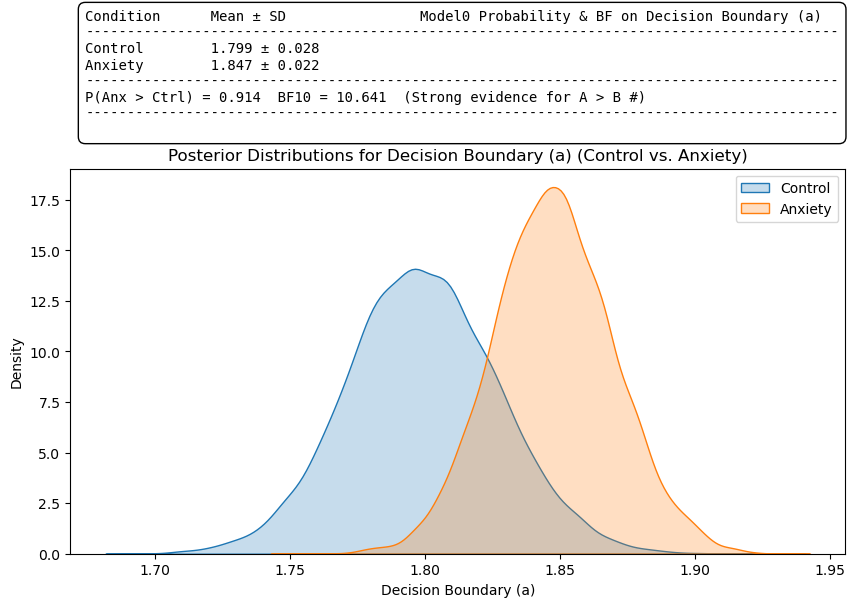

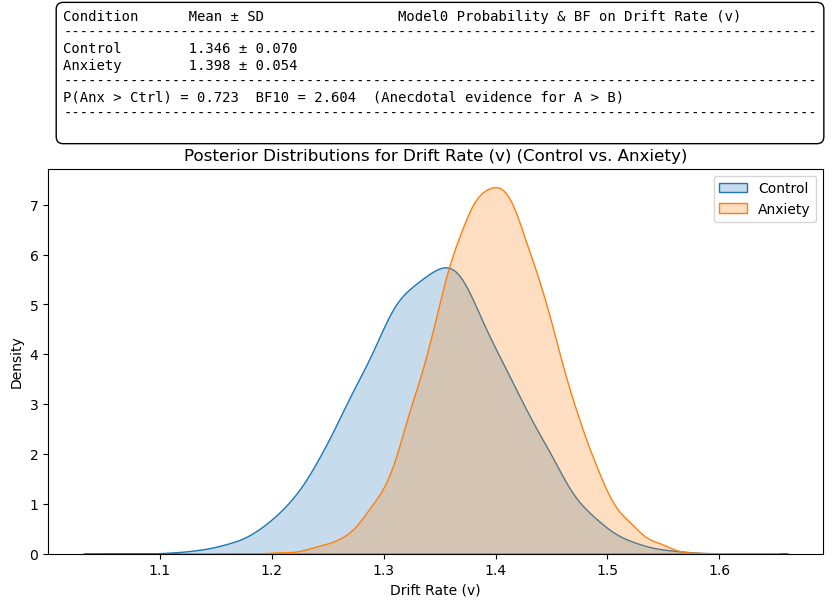

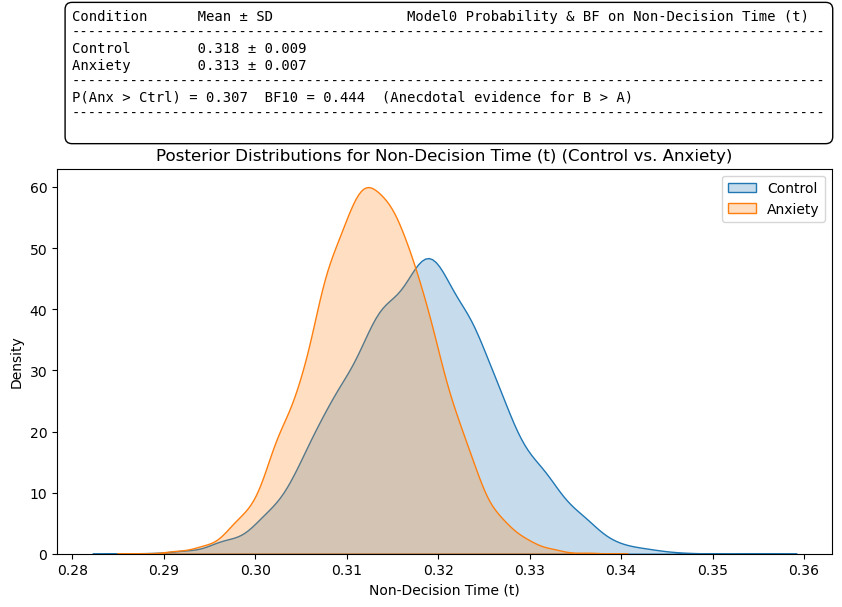

Probability results saved to 'model0_probability_results.csv'


In [13]:
# Ensure results list is initialized
results_for_csv = []

# Extract Model 0 Inference Data
infdata = loaded_models["model0"]["infdata"]

# Define parameters and their readable names
parameters = {
    'a': 'Decision Boundary (a)',
    'v': 'Drift Rate (v)',
    't': 'Non-Decision Time (t)'
}

# Initialize storage for traces
traces = {param: {"Control": None, "Anxiety": None} for param in parameters.keys()}
# Extract posterior samples for Control vs. Anxiety
for param, param_name in parameters.items():
    try:
        control_samples = get_param_samples(infdata, f"{param}(0)")
        anxiety_samples = get_param_samples(infdata, f"{param}(1)")

        # Store samples for comparisons
        traces[param]["Control"] = control_samples
        traces[param]["Anxiety"] = anxiety_samples

        if control_samples is None or anxiety_samples is None:
            continue

        # Compute Means & Standard Deviations
        mean_std = {
            "Control": (np.mean(control_samples), np.std(control_samples)),
            "Anxiety": (np.mean(anxiety_samples), np.std(anxiety_samples))
        }

        # Compute Probability Comparison (Anxiety vs. Control)
        probability = (anxiety_samples > control_samples).mean()

        # Compute Bayes Factor and Interpretation
        bf_10, bf_01, interpretation = compute_bayes_factor(probability)

        # Prepare tabular probability text
        probability_text = (
            f"{'Condition':<15}{'Mean ± SD':<25}{'Model0 Probability & BF on ' + param_name:<35}\n"
            f"{'-'*90}\n"
            f"{'Control':<15}"
            f"{mean_std['Control'][0]:.3f} ± {mean_std['Control'][1]:.3f} \n"
            f"{'Anxiety':<15}"
            f"{mean_std['Anxiety'][0]:.3f} ± {mean_std['Anxiety'][1]:.3f} \n"
            f"{'-'*90}\n"
            f"P(Anx > Ctrl) = {probability:.3f}  "
            f"BF10 = {bf_10:.3f}  "
            f"({interpretation})\n"
            f"{'-'*90}\n"
        )

        # Append the text content to the list for CSV
        results_for_csv.append({
            "Parameter": param_name,
            "Probability_Text": probability_text
        })

        # Plot posterior distributions
        plt.figure(figsize=(10, 5))
        sns.kdeplot(control_samples, label="Control", fill=True)
        sns.kdeplot(anxiety_samples, label="Anxiety", fill=True)

        plt.xlabel(param_name)
        plt.ylabel("Density")
        plt.title(f"Posterior Distributions for {param_name} (Control vs. Anxiety)")
        plt.legend()

        plt.gcf().text(0.14, 0.95, probability_text, fontsize=10, family="monospace",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        plt.savefig(f"model0_{param}_posterior.pdf", bbox_inches='tight')
        plt.show()

    except KeyError:
        print(f"Missing parameter for {param}, skipping.")

# Save the results to a CSV file
with open("model0_probability_results.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["Parameter", "Probability_Text"])
    writer.writeheader()
    writer.writerows(results_for_csv)

print("Probability results saved to 'model0_probability_results.csv'")


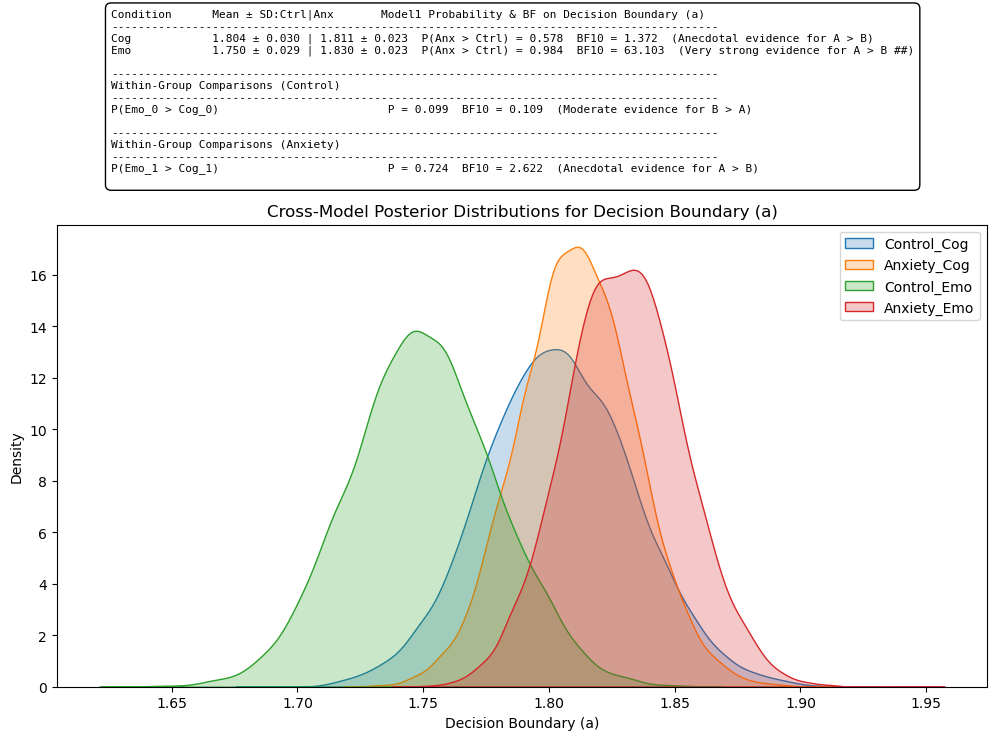

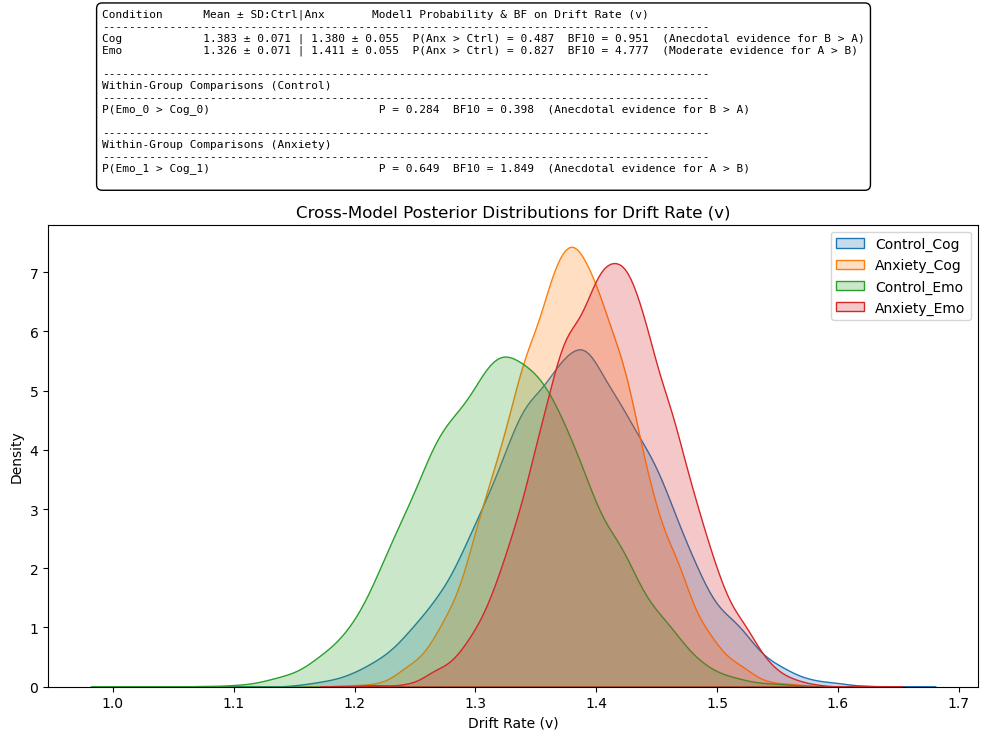

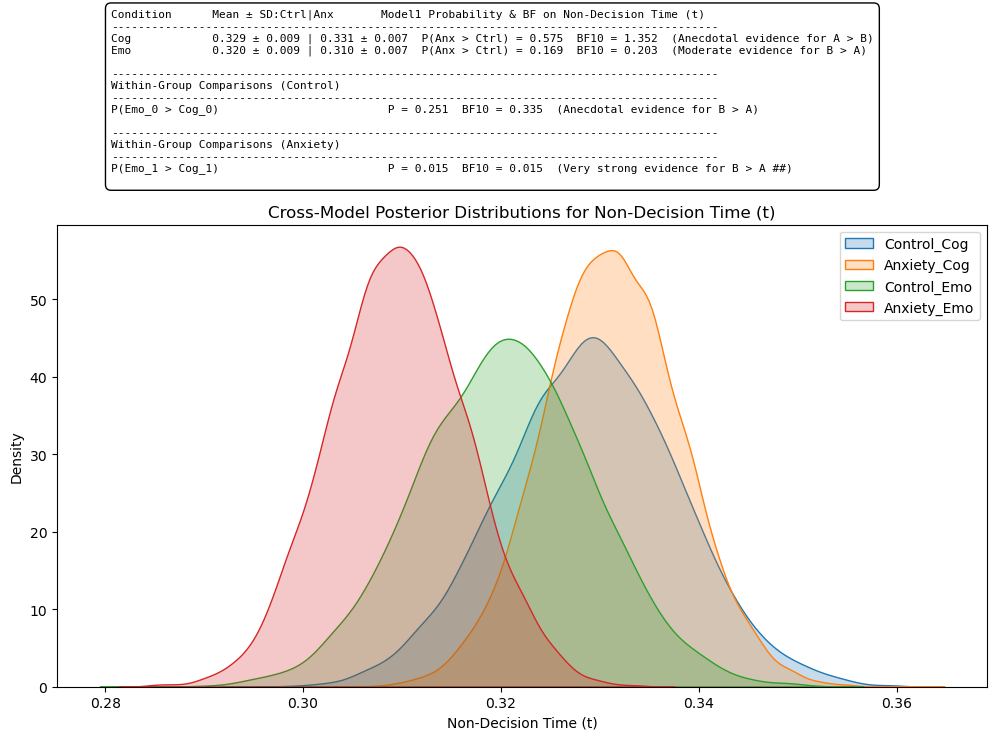

Probability results saved to 'model1_probability_results.csv'


In [14]:


# Extract Model 1 Inference Data
infdata = loaded_models["model1"]["infdata"]

# Define parameters and their readable names
parameters = {
    'a': 'Decision Boundary (a)',
    'v': 'Drift Rate (v)',
    't': 'Non-Decision Time (t)'
}

# Define condition names
conditions = ["Cog", "Emo"]

# Initialize storage for traces
traces = {
    param: {f"{cond}_0": None for cond in conditions} | {f"{cond}_1": None for cond in conditions}
    for param in parameters.keys()
}

# Extract posterior samples for all conditions
for param, param_name in parameters.items():
    try:
        samples = {f"{cond}_0": get_param_samples(infdata, f"{param}({cond}.0)") for cond in conditions}
        samples.update({f"{cond}_1": get_param_samples(infdata, f"{param}({cond}.1)") for cond in conditions})

        # Store samples for comparisons
        for key in samples.keys():
            traces[param][key] = samples[key]

        if any(samples[k] is None for k in samples.keys()):
            continue

        # Compute Means & Standard Deviations
        mean_std = {key: (np.mean(samples[key]), np.std(samples[key])) for key in samples.keys()}

        # Compute Probability Comparisons (Between Groups: Anxiety vs. Control)
        probabilities = {
            f"P(Anxiety_{cond} > Control_{cond})": (samples[f"{cond}_1"] > samples[f"{cond}_0"]).mean()
            for cond in conditions
        }

        # Compute Bayes Factors and Interpretations
        bayes_factors = {
            cond: compute_bayes_factor(probabilities[f"P(Anxiety_{cond} > Control_{cond})"])
            for cond in conditions
        }

        # Compute Within-Group Comparisons (Control & Anxiety separately)
        within_control_probs = {
            f"P(Emo_0 > Cog_0)": (samples["Emo_0"] > samples["Cog_0"]).mean()
        }

        within_anxiety_probs = {
            f"P(Emo_1 > Cog_1)": (samples["Emo_1"] > samples["Cog_1"]).mean()
        }

        # Prepare tabular probability text
        probability_text = (
            f"{'Condition':<15}{'Mean ± SD:Ctrl|Anx':<25}{'Model1 Probability & BF on ' + param_name:<35}\n"
            f"{'-'*90}\n")

        for cond in conditions:
            prob_val = probabilities[f"P(Anxiety_{cond} > Control_{cond})"]
            bf_10, bf_01, interpretation = bayes_factors[cond]
            probability_text += (
                f"{cond:<15}"
                f"{mean_std[f'{cond}_0'][0]:.3f} ± {mean_std[f'{cond}_0'][1]:.3f} | "
                f"{mean_std[f'{cond}_1'][0]:.3f} ± {mean_std[f'{cond}_1'][1]:.3f}  "
                f"P(Anx > Ctrl) = {prob_val:.3f}  "
                f"BF10 = {bf_10:.3f}  "
                f"({interpretation})\n"
            )

        probability_text += f"\n{'-'*90}\n"
        probability_text += "Within-Group Comparisons (Control)\n"
        probability_text += f"{'-'*90}\n"

        for key, value in within_control_probs.items():
            bf_10, bf_01, interpretation = compute_bayes_factor(value)

            # Handle None values to avoid formatting error
            bf_10_str = f"{bf_10:.3f}" if bf_10 is not None else "N/A"
            probability_text += (
                f"{key:<40} P = {value:.3f}  BF10 = {bf_10_str}  ({interpretation})\n"
            )
            
        probability_text += f"\n{'-'*90}\n"
        probability_text += "Within-Group Comparisons (Anxiety)\n"
        probability_text += f"{'-'*90}\n"

        for key, value in within_anxiety_probs.items():
            bf_10, bf_01, interpretation = compute_bayes_factor(value)
            bf_10_str = f"{bf_10:.3f}" if bf_10 is not None else "N/A"
            probability_text += (
                f"{key:<40} P = {value:.3f}  BF10 = {bf_10_str}  ({interpretation})\n"
            )
       
        # Append the text content to the list for CSV
        results_for_csv.append({
            "Parameter": param_name,
            "Probability_Text": probability_text
        })
        
        # Plot posterior distributions
        plt.figure(figsize=(12, 6))
        for idx, cond in enumerate(conditions):
            sns.kdeplot(samples[f"{cond}_0"], label=f"Control_{cond}", fill=True)
            sns.kdeplot(samples[f"{cond}_1"], label=f"Anxiety_{cond}", fill=True)

        plt.xlabel(param_name)
        plt.ylabel("Density")
        plt.title(f"Cross-Model Posterior Distributions for {param_name}")
        plt.legend()

        plt.gcf().text(0.17, 0.95, probability_text, fontsize=8, family="monospace",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        plt.savefig(f"cross_model_{param}_posterior.pdf", bbox_inches='tight')
        plt.show()

    except KeyError:
        print(f"Missing parameter for {param}, skipping.")
# Save the results to a CSV file
with open("model1_probability_results.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["Parameter", "Probability_Text"])
    writer.writeheader()
    writer.writerows(results_for_csv)

print("Probability results saved to 'model1_probability_results.csv'")

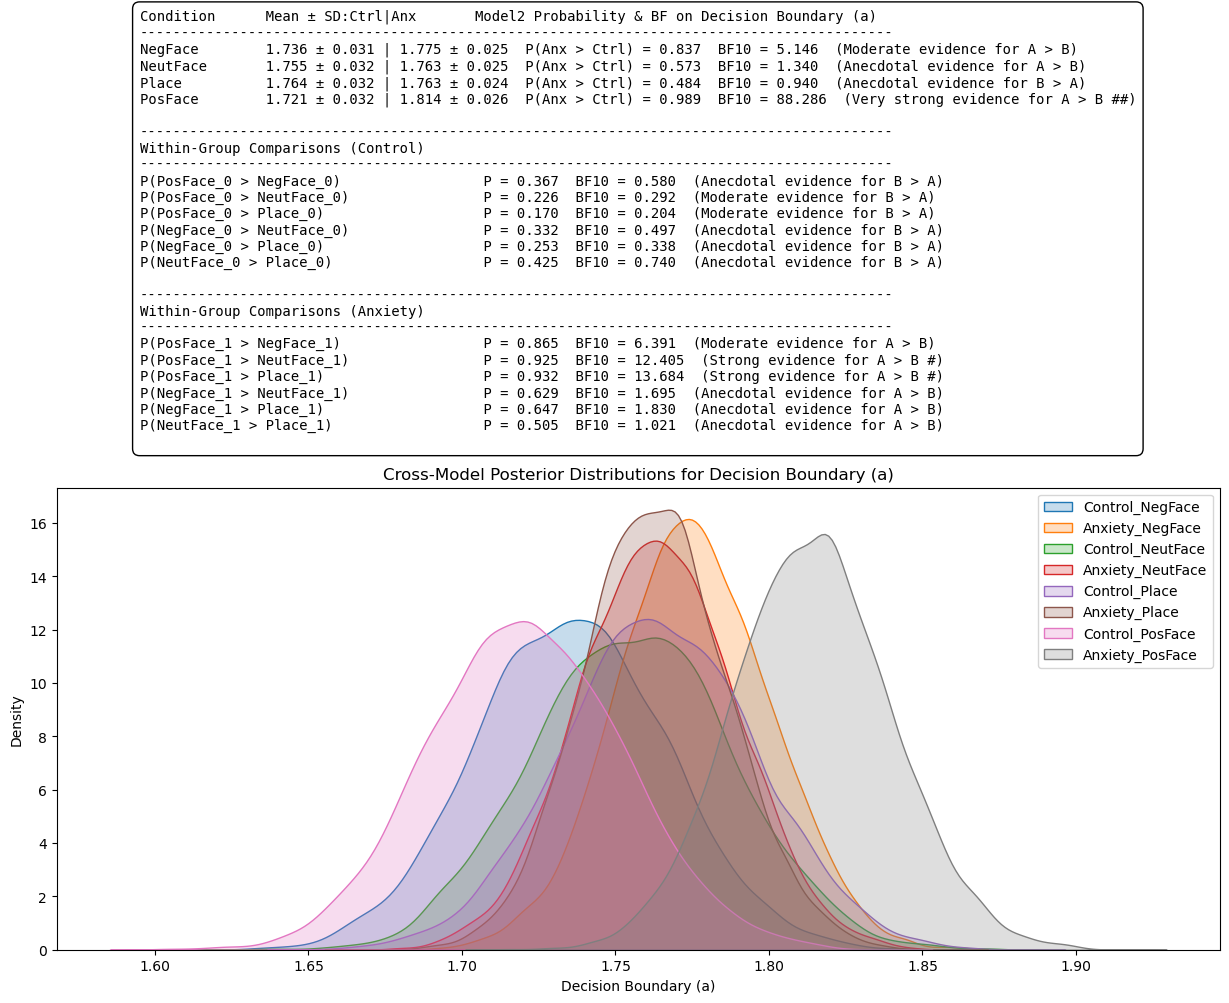

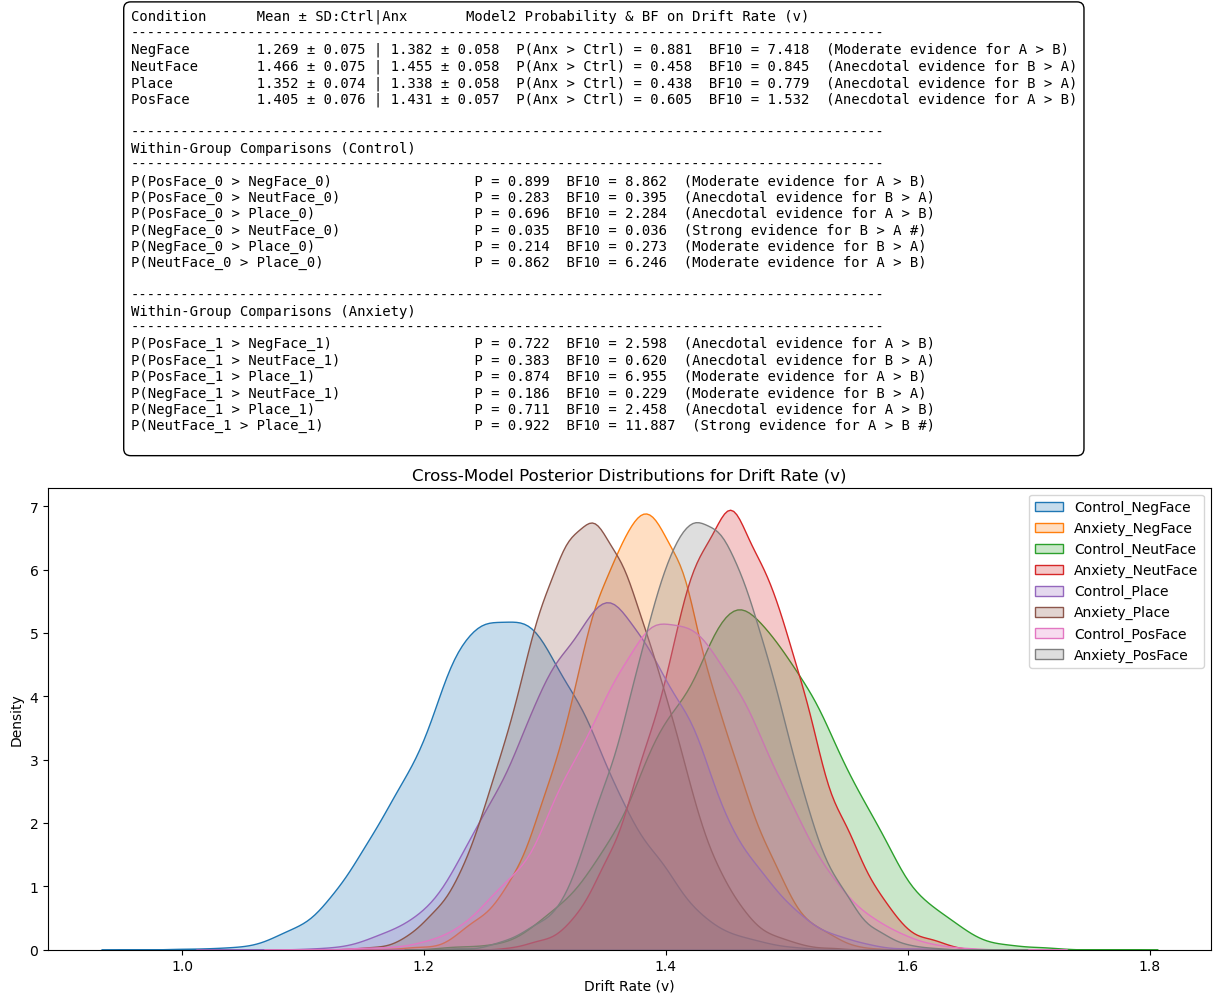

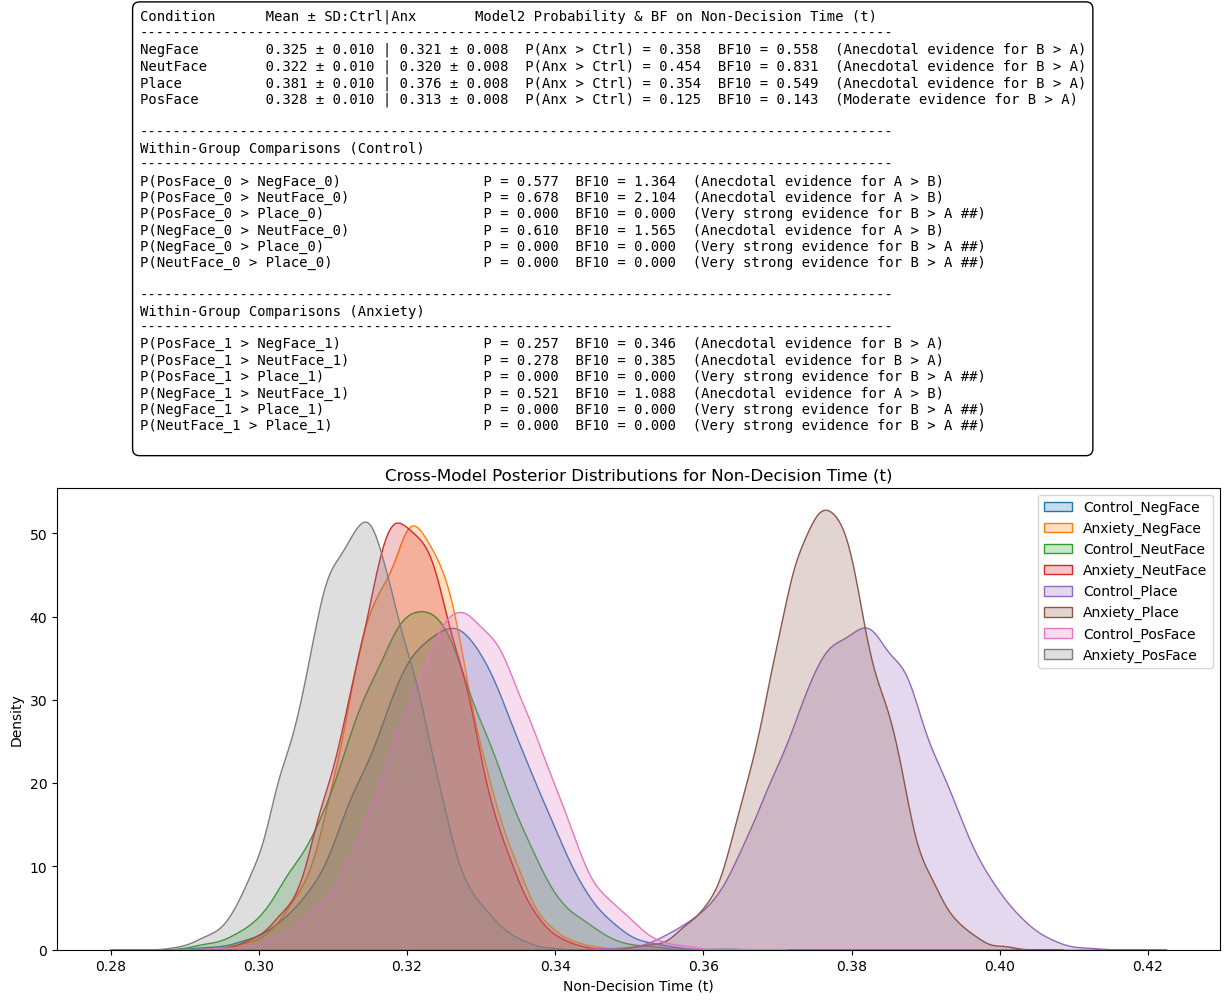

Probability results saved to 'model2_probability_results.csv'


In [15]:
# Extract Model 2 Inference Data
infdata = loaded_models["model2"]["infdata"]

# Define parameters and their readable names
parameters = {
    'a': 'Decision Boundary (a)',
    'v': 'Drift Rate (v)',
    't': 'Non-Decision Time (t)'
}

# Define condition names
conditions = ["NegFace", "NeutFace", "Place", "PosFace"]

# Initialize storage for traces
traces = {
    param: {f"{cond}_0": None for cond in conditions} | {f"{cond}_1": None for cond in conditions}
    for param in parameters.keys()
}

# Extract posterior samples for all conditions
for param, param_name in parameters.items():
    try:
        samples = {f"{cond}_0": get_param_samples(infdata, f"{param}({cond}.0)") for cond in conditions}
        samples.update({f"{cond}_1": get_param_samples(infdata, f"{param}({cond}.1)") for cond in conditions})

        # Store samples for comparisons
        for key in samples.keys():
            traces[param][key] = samples[key]

        if any(samples[k] is None for k in samples.keys()):
            continue

        # Compute Means & Standard Deviations
        mean_std = {key: (np.mean(samples[key]), np.std(samples[key])) for key in samples.keys()}

        # Compute Probability Comparisons (Between Groups: Anxiety vs. Control)
        probabilities = {
            f"P(Anxiety_{cond} > Control_{cond})": (samples[f"{cond}_1"] > samples[f"{cond}_0"]).mean()
            for cond in conditions
        }

        # Compute Bayes Factors and Interpretations
        bayes_factors = {
            cond: compute_bayes_factor(probabilities[f"P(Anxiety_{cond} > Control_{cond})"])
            for cond in conditions
        }

        # Compute Within-Group Comparisons (Control & Anxiety separately)
        within_control_probs = {
            f"P(PosFace_0 > NegFace_0)": (samples["PosFace_0"] > samples["NegFace_0"]).mean(),
            f"P(PosFace_0 > NeutFace_0)": (samples["PosFace_0"] > samples["NeutFace_0"]).mean(),
            f"P(PosFace_0 > Place_0)": (samples["PosFace_0"] > samples["Place_0"]).mean(),
            f"P(NegFace_0 > NeutFace_0)": (samples["NegFace_0"] > samples["NeutFace_0"]).mean(),
            f"P(NegFace_0 > Place_0)": (samples["NegFace_0"] > samples["Place_0"]).mean(),
            f"P(NeutFace_0 > Place_0)": (samples["NeutFace_0"] > samples["Place_0"]).mean()
        }

        within_anxiety_probs = {
            f"P(PosFace_1 > NegFace_1)": (samples["PosFace_1"] > samples["NegFace_1"]).mean(),
            f"P(PosFace_1 > NeutFace_1)": (samples["PosFace_1"] > samples["NeutFace_1"]).mean(),
            f"P(PosFace_1 > Place_1)": (samples["PosFace_1"] > samples["Place_1"]).mean(),
            f"P(NegFace_1 > NeutFace_1)": (samples["NegFace_1"] > samples["NeutFace_1"]).mean(),
            f"P(NegFace_1 > Place_1)": (samples["NegFace_1"] > samples["Place_1"]).mean(),
            f"P(NeutFace_1 > Place_1)": (samples["NeutFace_1"] > samples["Place_1"]).mean()
        }

        # Prepare tabular probability text
        probability_text = (
            f"{'Condition':<15}{'Mean ± SD:Ctrl|Anx':<25}{'Model2 Probability & BF on ' + param_name:<35}\n"
            f"{'-'*90}\n")

        for cond in conditions:
            prob_val = probabilities[f"P(Anxiety_{cond} > Control_{cond})"]
            bf_10, bf_01, interpretation = bayes_factors[cond]
            probability_text += (
                f"{cond:<15}"
                f"{mean_std[f'{cond}_0'][0]:.3f} ± {mean_std[f'{cond}_0'][1]:.3f} | "
                f"{mean_std[f'{cond}_1'][0]:.3f} ± {mean_std[f'{cond}_1'][1]:.3f}  "
                f"P(Anx > Ctrl) = {prob_val:.3f}  "
                f"BF10 = {bf_10:.3f}  "
                f"({interpretation})\n"
            )

        probability_text += f"\n{'-'*90}\n"
        probability_text += "Within-Group Comparisons (Control)\n"
        probability_text += f"{'-'*90}\n"

        for key, value in within_control_probs.items():
            bf_10, bf_01, interpretation = compute_bayes_factor(value)

            # Handle None values to avoid formatting error
            bf_10_str = f"{bf_10:.3f}" if bf_10 is not None else "N/A"
            probability_text += (
                f"{key:<40} P = {value:.3f}  BF10 = {bf_10_str}  ({interpretation})\n"
            )
            
        probability_text += f"\n{'-'*90}\n"
        probability_text += "Within-Group Comparisons (Anxiety)\n"
        probability_text += f"{'-'*90}\n"

        for key, value in within_anxiety_probs.items():
            bf_10, bf_01, interpretation = compute_bayes_factor(value)
            bf_10_str = f"{bf_10:.3f}" if bf_10 is not None else "N/A"
            probability_text += (
                f"{key:<40} P = {value:.3f}  BF10 = {bf_10_str}  ({interpretation})\n"
            )
        # Append the text content to the list for CSV
        results_for_csv.append({
            "Parameter": param_name,
            "Probability_Text": probability_text
        })
        # Plot posterior distributions
        plt.figure(figsize=(15, 6))
        for idx, cond in enumerate(conditions):
            sns.kdeplot(samples[f"{cond}_0"], label=f"Control_{cond}", fill=True)
            sns.kdeplot(samples[f"{cond}_1"], label=f"Anxiety_{cond}", fill=True)

        plt.xlabel(param_name)
        plt.ylabel("Density")
        plt.title(f"Cross-Model Posterior Distributions for {param_name}")
        plt.legend()

        plt.gcf().text(0.18, 0.95, probability_text, fontsize=10, family="monospace",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        plt.savefig(f"cross_model_{param}_posterior.pdf", bbox_inches='tight')
        plt.show()

    except KeyError:
        print(f"Missing parameter for {param}, skipping.")
# Save the results to a CSV file
with open("model2_probability_results.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["Parameter", "Probability_Text"])
    writer.writeheader()
    writer.writerows(results_for_csv)

print("Probability results saved to 'model2_probability_results.csv'")

# MODEL COMPARISION 

In [16]:
# Extract DIC values dynamically from loaded models
dic_dict = {model_name: loaded_models[model_name]["model"].dic for model_name in loaded_models}
comp_dic = pd.DataFrame.from_dict(dic_dict, orient='index', columns=['DIC'])
comp_dic['model'] = comp_dic.index
comp_dic = comp_dic[['model', 'DIC']]
comp_dic.sort_values(by=['DIC'], ascending = True)

model           DIC
model2  model2  36062.097647
model1  model1  36870.862587
model0  model0  37158.929355

# PPC

In [ ]:

# Define your fitted model (assume it's already loaded)
# Replace `model` with your specific HDDM model variable
model = loaded_models["model0"]["model"]  # Example for model2

# Generate PPC data
ppc_data = hddm.utils.post_pred_gen(model)

# Compute PPC statistics
ppc_stats = hddm.utils.post_pred_stats(data=model.data, ppc_data=ppc_data)

# Display PPC statistics
print(ppc_stats.head())  


Start generating posterior prediction...


In [ ]:

# Loop through each model and generate PPC statistics for RT and accuracy
validation_results = {}

for model_name in loaded_models:
    model = loaded_models[model_name]["model"]

    # Generate PPC data
    ppc_data = hddm.utils.post_pred_gen(model)

    # Compute PPC statistics
    ppc_stats = hddm.utils.post_pred_stats(data=model.data, ppc_data=ppc_data)

    # Extract RT and accuracy statistics
    observed_rt_mean = model.data['rt'].mean()
    observed_rt_std = model.data['rt'].std()
    observed_accuracy = model.data['response'].mean()  # Assuming 'response' is 1 for correct, 0 for incorrect

    predicted_rt_mean = ppc_stats['mean_rt'].mean()
    predicted_rt_std = ppc_stats['mean_rt'].std()
    predicted_accuracy = ppc_stats['response'].mean()

    # Store validation metrics
    validation_results[model_name] = {
        "Observed RT Mean": observed_rt_mean,
        "Observed RT Std": observed_rt_std,
        "Observed Accuracy": observed_accuracy,
        "Predicted RT Mean": predicted_rt_mean,
        "Predicted RT Std": predicted_rt_std,
        "Predicted Accuracy": predicted_accuracy,
    }

# Convert validation results to DataFrame for easier visualization
validation_df = pd.DataFrame.from_dict(validation_results, orient="index")
print(validation_df)

# Save validation results to CSV
validation_df.to_csv("validation_metrics.csv")


Start generating posterior prediction...


# RT and ACC

In [31]:
# Function to calculate predicted RT and accuracy
def calculate_rt_accuracy_by_condition(model, model_name, infdata):
    # Extract all model variable names
    all_vars = list(infdata.posterior.data_vars)

    # Filter out subject-level parameters (keeping only condition-level variables)
    filtered_vars = [var for var in all_vars if "subj" not in var and any(prefix in var for prefix in ["v(", "a(", "t("])]

    # Extract unique conditions based on variable names
    conditions = sorted(set(var.split("(")[1].split(")")[0] for var in filtered_vars))

    # Storage for results by condition
    condition_results = []

    # Loop through each condition
    for condition in conditions:
        try:
            # Extract parameter traces for the condition
            v_trace = model.nodes_db.loc[f"v({condition})", "node"].trace()
            a_trace = model.nodes_db.loc[f"a({condition})", "node"].trace()
            t_trace = model.nodes_db.loc[f"t({condition})", "node"].trace()

            # Ensure we handle division errors gracefully
            valid_v = v_trace != 0

            # Compute predicted accuracy for the condition
            predicted_accuracy = np.zeros_like(v_trace)
            predicted_accuracy[valid_v] = 1 / (1 + np.exp(-2 * v_trace[valid_v] * a_trace[valid_v]))

            # Compute predicted RT for the condition
            predicted_rt = np.zeros_like(v_trace)
            predicted_rt[valid_v] = (a_trace[valid_v] / (2 * v_trace[valid_v])  + t_trace[valid_v])

            # Summarize metrics for the condition
            metrics = {
                "Model": model_name,
                "Condition": condition,
                "RT Mean": np.mean(predicted_rt[valid_v]),
                "RT Std": np.std(predicted_rt[valid_v]),
                "Accuracy Mean": np.mean(predicted_accuracy[valid_v]),
                "Accuracy Std": np.std(predicted_accuracy[valid_v]),
            }

            condition_results.append(metrics)

        except KeyError:
            print(f"Skipping condition {condition} for model {model_name} (parameter not found)")
            continue

    return condition_results

# List of models to process
models = [
    ("model0", loaded_models["model0"]["model"], loaded_models["model0"]["infdata"]),
    ("model1", loaded_models["model1"]["model"], loaded_models["model1"]["infdata"]),
    ("model2", loaded_models["model2"]["model"], loaded_models["model2"]["infdata"])
]

# Process each model and collect results
all_results = []

for model_name, model, infdata in models:
    results = calculate_rt_accuracy_by_condition(model, model_name, infdata)
    all_results.extend(results)

# Create a DataFrame for results and sort by Condition in descending order
results_df = pd.DataFrame(all_results).sort_values(by=["Condition"], ascending=True)

results_df

Model   Condition   RT Mean    RT Std  Accuracy Mean  Accuracy Std
0   model0           0  0.988277  0.037002       0.991899      0.002174
1   model0           1  0.974396  0.027115       0.994194      0.001237
2   model1       Cog.0  0.982898  0.035767       0.992974      0.001959
3   model1       Cog.1  0.988199  0.027481       0.993157      0.001451
4   model1       Emo.0  0.982262  0.037272       0.990107      0.002612
5   model1       Emo.1  0.959240  0.026798       0.994173      0.001271
6   model2   NegFace.0  1.011345  0.042011       0.987487      0.003498
7   model2   NegFace.1  0.963814  0.028129       0.992485      0.001706
8   model2  NeutFace.0  0.921653  0.032567       0.993978      0.001760
9   model2  NeutFace.1  0.926804  0.025284       0.993990      0.001359
10  model2     Place.0  1.035323  0.037335       0.991249      0.002475
11  model2     Place.1  1.036449  0.029519       0.990928      0.001982
12  model2   PosFace.0  0.941928  0.034834       0.991809      0.002362
13  model2   PosFace.1  0.948504  0.026532       0.994320      0.001313

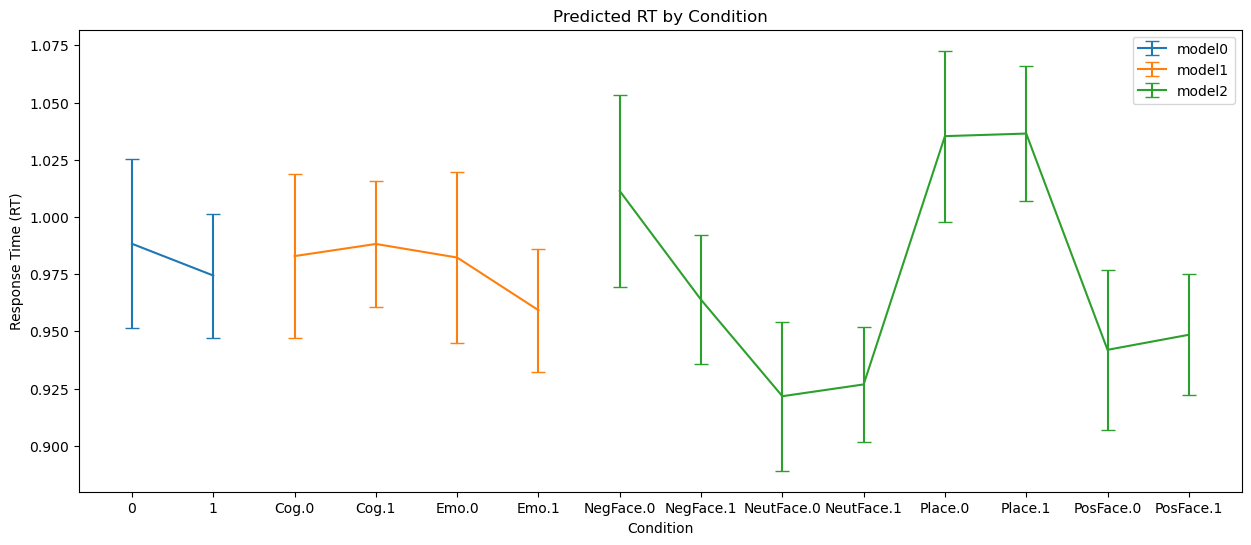

In [32]:

plt.figure(figsize=(15, 6))
for model in results_df["Model"].unique():
    model_data = results_df[results_df["Model"] == model]
    plt.errorbar(model_data["Condition"], model_data["RT Mean"], 
                 yerr=model_data["RT Std"], label=model, capsize=5)

plt.xlabel("Condition")
plt.ylabel("Response Time (RT)")
plt.title("Predicted RT by Condition")
plt.legend()
plt.show()

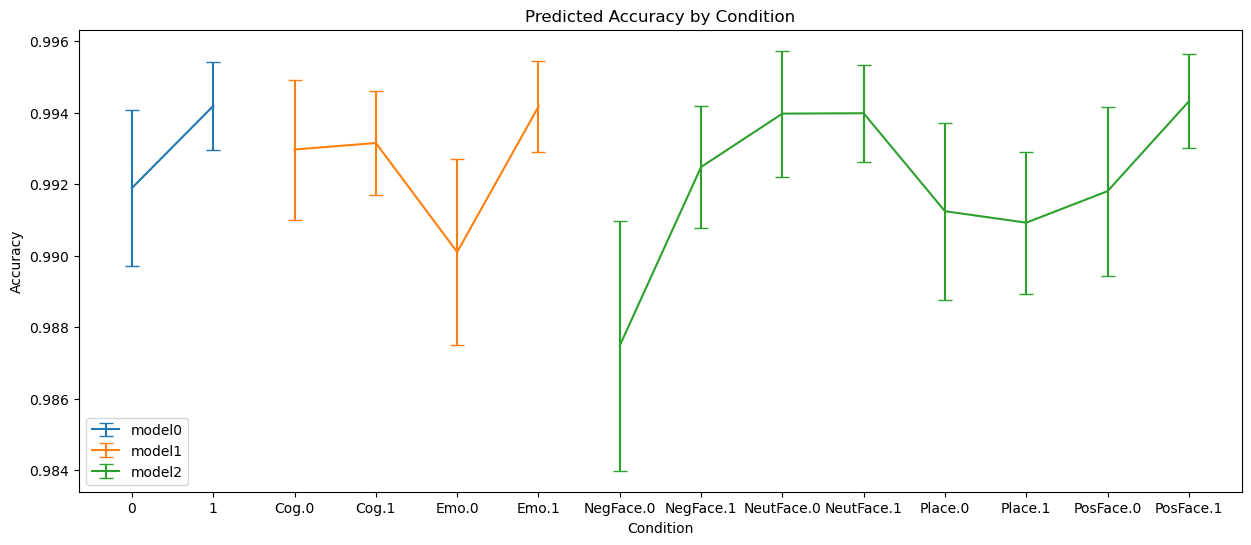

In [33]:
plt.figure(figsize=(15, 6))
for model in results_df["Model"].unique():
    model_data = results_df[results_df["Model"] == model]
    plt.errorbar(model_data["Condition"], model_data["Accuracy Mean"], 
                 yerr=model_data["Accuracy Std"], label=model, capsize=5)

plt.xlabel("Condition")
plt.ylabel("Accuracy")
plt.title("Predicted Accuracy by Condition")
plt.legend()
plt.show()

In [24]:
# Function to compute observed RT and accuracy based on model settings
def compute_observed_rt_accuracy(dataset, model_name, conditions):
    """
    Compute observed RT and accuracy for each condition in the dataset.
    """
    results = []

    for condition in dataset[conditions].drop_duplicates().to_dict(orient="records"):
        # Filter data for the specific condition
        condition_data = dataset.copy()
        for key, value in condition.items():
            condition_data = condition_data[condition_data[key] == value]

        # Compute observed RT and accuracy
        if not condition_data.empty:
            rt_mean = condition_data["rt"].mean()
            rt_std = condition_data["rt"].std()
            accuracy_mean = condition_data["response"].mean()  # Assumes binary responses (1 = correct, 0 = incorrect)
            accuracy_std = condition_data["response"].std()

            # Store results
            results.append({
                "Model": model_name,
                "Condition": "_".join(f"{key}={value}" for key, value in condition.items()),  # Convert to string
                "RT Mean": rt_mean,
                "RT Std": rt_std,
                "Accuracy Mean": accuracy_mean,
                "Accuracy Std": accuracy_std
            })

    return results

# Process observed data for each model
observed_results = []
dataset = dataset  # Ensure this is your dataset containing 'rt', 'response', and condition columns

model_conditions = {
    "model0": ["anxiety"],
    "model1": ["Stim_cog_emo", "anxiety"],
    "model2": ["StimType", "anxiety"]
}

for model_name, conditions in model_conditions.items():
    observed_results.extend(compute_observed_rt_accuracy(dataset, model_name, conditions))

# Convert results to DataFrame and sort by condition
observed_results_df = pd.DataFrame(observed_results).sort_values(by=["Condition"], ascending=False)
observed_results_df


Model                    Condition   RT Mean    RT Std  Accuracy Mean   
0   model0                    anxiety=1  0.852146  0.355695       0.872275  \
1   model0                    anxiety=0  0.845648  0.354447       0.866550   
2   model1   Stim_cog_emo=Emo_anxiety=1  0.840029  0.358305       0.873328   
4   model1   Stim_cog_emo=Emo_anxiety=0  0.829989  0.352045       0.858258   
3   model1   Stim_cog_emo=Cog_anxiety=1  0.864256  0.352668       0.871223   
5   model1   Stim_cog_emo=Cog_anxiety=0  0.861267  0.356169       0.874821   
8   model2   StimType=PosFace_anxiety=1  0.839476  0.361099       0.877074   
10  model2   StimType=PosFace_anxiety=0  0.817678  0.347892       0.862608   
9   model2     StimType=Place_anxiety=1  0.903922  0.353046       0.864946   
13  model2     StimType=Place_anxiety=0  0.901957  0.358400       0.868463   
7   model2  StimType=NeutFace_anxiety=1  0.824628  0.347834       0.877493   
11  model2  StimType=NeutFace_anxiety=0  0.821358  0.349450       0.881057   
6   model2   StimType=NegFace_anxiety=1  0.840581  0.355528       0.869590   
12  model2   StimType=NegFace_anxiety=0  0.842281  0.355774       0.853915   

    Accuracy Std  
0       0.333791  
1       0.340074  
2       0.332620  
4       0.348813  
3       0.334969  
5       0.330948  
8       0.328383  
10      0.344316  
9       0.341813  
13      0.338041  
7       0.327901  
11      0.323772  
6       0.336786  
12      0.353248

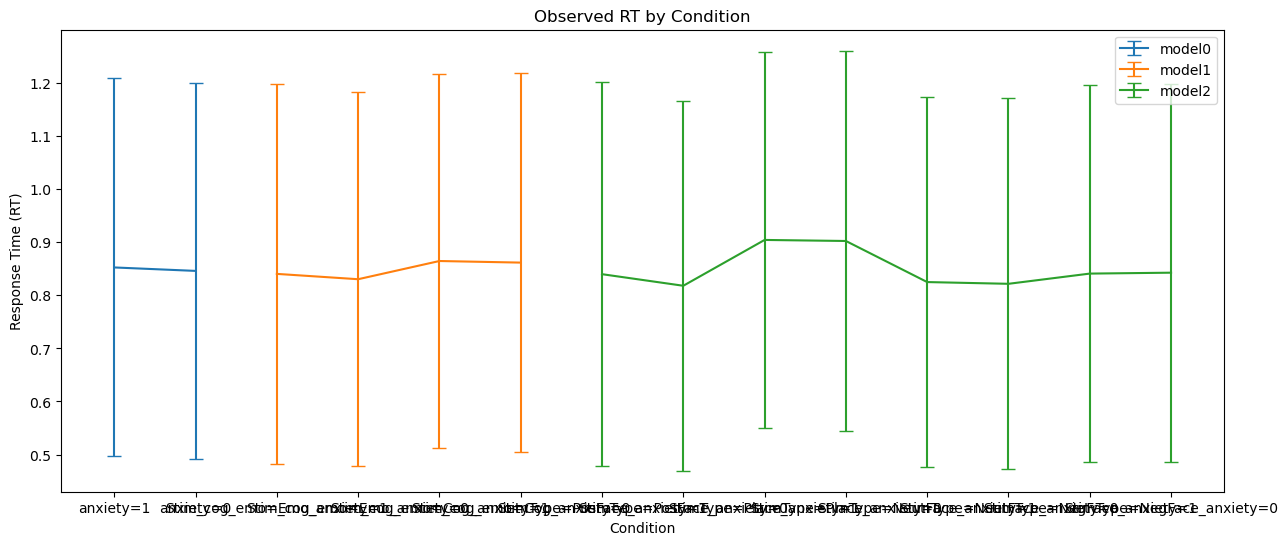

In [26]:
plt.figure(figsize=(15, 6))
for model in observed_results_df["Model"].unique():
    model_data = observed_results_df[observed_results_df["Model"] == model]
    plt.errorbar(model_data["Condition"], model_data["RT Mean"], 
                 yerr=model_data["RT Std"], label=model, capsize=5)

plt.xlabel("Condition")
plt.ylabel("Response Time (RT)")
plt.title("Observed RT by Condition")
plt.legend()
plt.show()